In [97]:
%matplotlib inline

import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from numpy import mean
from math import sqrt,acos,cos,sin,pi,exp,log,isnan,atan2
from numpy import asarray
from matplotlib import gridspec
from scipy import stats,signal
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from textwrap import wrap
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

import os

#from PlottingScripts import CV, Spline, Tune1, distVar, distplot_wratio, StackedHisto, SimpleHisto, mcplot, DrawMatrix
from PlottingScripts import distVar

from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [102]:
datafolder = '/home/nwkamp/Research/MicroBooNE/Data'
sysfolder = '/home/nwkamp/Research/MicroBooNE/Data/systematics'
auxfolder = '/home/nwkamp/Research/MicroBooNE/1L1PSelection/aux'
tag = '3March2021_vA_fullLowE_withPi0Sample_newShowerCalib'
leemode = True
savetag = '23Mar2021'
if leemode: savetag+='_LEE'
modelist = ['fracweight','medianscore','avgscore']
sigcutlist = [0.7,0.8,0.9,0.95]
basefolder = '/home/nwkamp/Research/MicroBooNE/1L1PSelection/1e1pBDT/CovMatrices/DetVar/'+tag+'/'
if not os.path.exists(basefolder):
    os.makedirs(basefolder)
basefolder = '/home/nwkamp/Research/MicroBooNE/1L1PSelection/1e1pBDT/CovMatrices/DetVar/'+tag+'/'+savetag+'/'
if not os.path.exists(basefolder):
    os.makedirs(basefolder)
plotfolder = basefolder+'PlotDumps/'
covfolder = basefolder+'covMatrix/'
histfolder = basefolder+'1Dhists/'
if not os.path.exists(plotfolder):
    os.makedirs(plotfolder)
if not os.path.exists(covfolder):
    os.makedirs(covfolder)
if not os.path.exists(histfolder):
    os.makedirs(histfolder)
covtag = 'frac_covar_run3_%s'%tag



RSE  = ['run','subrun','event']

def decode_df(df):
    cols = []
    for col in df:
        cols.append(col.decode("utf-8"))
        try: 
            df[col].apply(lambda x: x.decode("utf-8"))
        except:
            pass
    df.columns = cols
    return df

# RUN 3 

In [103]:
f_scaleslist = []
s_detsyslist = []
names = ['WireModX','WireModYZ','recomb2','LYDown','LYAtt','LYRayleigh','SCE','WireModThetaYZ','WireModThetaXZ']

for name in names:
    s_detsyslist.append(name)

#df_cv = pd.read_parquet('../../data/pickles/detsys_CV_run3_nodupesMay1.parquet')
#scaleCV = 9.65858292241e+19 

a_df_sys = {}

for sigcut in sigcutlist:
    for mode in modelist: 
        key = tuple((sigcut,mode))
        a_df_sys[key] = {}
        print('#'*10,key,'#'*10)
        
        for run in ['run1','run3']:

            a_df_sys[key][run] = []

            RSE = ['run','subrun','event']
            sRSE = ['sample'] + RSE

            for sys in s_detsyslist:

                try: df_sys = decode_df(pd.read_parquet('%s/pickles/%s/%s/BDTcut%s/%s_%s.parquet'%(sysfolder,tag,mode,str(sigcut),sys,run)))
                except: continue
                a_df_sys[key][run].append(df_sys)
                print(run,sys,"total %d, cv = %d dv = %d"%((sum(df_sys['bdtweight']>0),
                                                           (sum((df_sys.query("isCV==True"))['bdtweight']>0)),
                                                           (sum((df_sys.query("isCV==False"))['bdtweight']>0)))))


########## (0.7, 'fracweight') ##########
run1 LYDown total 3795, cv = 1722 dv = 2073
run1 LYAtt total 3820, cv = 1722 dv = 2098
run1 LYRayleigh total 3340, cv = 1722 dv = 1618
run3 WireModX total 3966, cv = 1871 dv = 2095


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 WireModYZ total 3601, cv = 1871 dv = 1730
run3 recomb2 total 4350, cv = 1871 dv = 2479
run3 LYDown total 3890, cv = 1871 dv = 2019
run3 LYAtt total 5615, cv = 1871 dv = 3744


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 LYRayleigh total 3977, cv = 1871 dv = 2106
run3 SCE total 3871, cv = 1871 dv = 2000
run3 WireModThetaYZ total 3207, cv = 1871 dv = 1336
run3 WireModThetaXZ total 3519, cv = 1871 dv = 1648
########## (0.7, 'medianscore') ##########


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run1 LYDown total 3341, cv = 1513 dv = 1828
run1 LYAtt total 3366, cv = 1513 dv = 1853
run1 LYRayleigh total 2923, cv = 1513 dv = 1410


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 WireModX total 3335, cv = 1591 dv = 1744
run3 WireModYZ total 3055, cv = 1591 dv = 1464
run3 recomb2 total 3674, cv = 1591 dv = 2083
run3 LYDown total 3298, cv = 1591 dv = 1707


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 LYAtt total 4757, cv = 1591 dv = 3166
run3 LYRayleigh total 3347, cv = 1591 dv = 1756
run3 SCE total 3309, cv = 1591 dv = 1718
run3 WireModThetaYZ total 2733, cv = 1591 dv = 1142
run3 WireModThetaXZ total 2977, cv = 1591 dv = 1386
########## (0.7, 'avgscore') ##########


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run1 LYDown total 3300, cv = 1490 dv = 1810
run1 LYAtt total 3313, cv = 1490 dv = 1823
run1 LYRayleigh total 2885, cv = 1490 dv = 1395
run3 WireModX total 3283, cv = 1568 dv = 1715
run3 WireModYZ total 3016, cv = 1568 dv = 1448


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 recomb2 total 3625, cv = 1568 dv = 2057
run3 LYDown total 3246, cv = 1568 dv = 1678
run3 LYAtt total 4683, cv = 1568 dv = 3115
run3 LYRayleigh total 3295, cv = 1568 dv = 1727


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 SCE total 3265, cv = 1568 dv = 1697
run3 WireModThetaYZ total 2687, cv = 1568 dv = 1119
run3 WireModThetaXZ total 2935, cv = 1568 dv = 1367
########## (0.8, 'fracweight') ##########
run1 LYDown total 3640, cv = 1647 dv = 1993


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run1 LYAtt total 3658, cv = 1647 dv = 2011
run1 LYRayleigh total 3190, cv = 1647 dv = 1543
run3 WireModX total 3751, cv = 1773 dv = 1978
run3 WireModYZ total 3416, cv = 1773 dv = 1643


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 recomb2 total 4120, cv = 1773 dv = 2347
run3 LYDown total 3677, cv = 1773 dv = 1904
run3 LYAtt total 5300, cv = 1773 dv = 3527
run3 LYRayleigh total 3753, cv = 1773 dv = 1980


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 SCE total 3667, cv = 1773 dv = 1894
run3 WireModThetaYZ total 3044, cv = 1773 dv = 1271
run3 WireModThetaXZ total 3334, cv = 1773 dv = 1561
########## (0.8, 'medianscore') ##########
run1 LYDown total 3181, cv = 1443 dv = 1738


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run1 LYAtt total 3174, cv = 1443 dv = 1731
run1 LYRayleigh total 2794, cv = 1443 dv = 1351
run3 WireModX total 3083, cv = 1467 dv = 1616
run3 WireModYZ total 2827, cv = 1467 dv = 1360


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 recomb2 total 3405, cv = 1467 dv = 1938
run3 LYDown total 3031, cv = 1467 dv = 1564
run3 LYAtt total 4387, cv = 1467 dv = 2920
run3 LYRayleigh total 3080, cv = 1467 dv = 1613


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 SCE total 3052, cv = 1467 dv = 1585
run3 WireModThetaYZ total 2511, cv = 1467 dv = 1044
run3 WireModThetaXZ total 2752, cv = 1467 dv = 1285
########## (0.8, 'avgscore') ##########
run1 LYDown total 3127, cv = 1414 dv = 1713


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run1 LYAtt total 3119, cv = 1414 dv = 1705
run1 LYRayleigh total 2742, cv = 1414 dv = 1328
run3 WireModX total 2998, cv = 1427 dv = 1571
run3 WireModYZ total 2755, cv = 1427 dv = 1328


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 recomb2 total 3323, cv = 1427 dv = 1896
run3 LYDown total 2949, cv = 1427 dv = 1522
run3 LYAtt total 4286, cv = 1427 dv = 2859
run3 LYRayleigh total 3002, cv = 1427 dv = 1575


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 SCE total 2976, cv = 1427 dv = 1549
run3 WireModThetaYZ total 2444, cv = 1427 dv = 1017
run3 WireModThetaXZ total 2668, cv = 1427 dv = 1241
########## (0.9, 'fracweight') ##########
run1 LYDown total 3365, cv = 1522 dv = 1843
run1 LYAtt total 3379, cv = 1522 dv = 1857


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run1 LYRayleigh total 2954, cv = 1522 dv = 1432
run3 WireModX total 3398, cv = 1622 dv = 1776
run3 WireModYZ total 3111, cv = 1622 dv = 1489


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 recomb2 total 3729, cv = 1622 dv = 2107
run3 LYDown total 3346, cv = 1622 dv = 1724
run3 LYAtt total 4838, cv = 1622 dv = 3216
run3 LYRayleigh total 3408, cv = 1622 dv = 1786


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 SCE total 3370, cv = 1622 dv = 1748
run3 WireModThetaYZ total 2766, cv = 1622 dv = 1144
run3 WireModThetaXZ total 3038, cv = 1622 dv = 1416
########## (0.9, 'medianscore') ##########
run1 LYDown total 2861, cv = 1286 dv = 1575


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run1 LYAtt total 2839, cv = 1286 dv = 1553
run1 LYRayleigh total 2499, cv = 1286 dv = 1213
run3 WireModX total 2694, cv = 1281 dv = 1413


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 WireModYZ total 2468, cv = 1281 dv = 1187
run3 recomb2 total 2959, cv = 1281 dv = 1678
run3 LYDown total 2653, cv = 1281 dv = 1372
run3 LYAtt total 3833, cv = 1281 dv = 2552


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 LYRayleigh total 2666, cv = 1281 dv = 1385
run3 SCE total 2685, cv = 1281 dv = 1404
run3 WireModThetaYZ total 2205, cv = 1281 dv = 924
run3 WireModThetaXZ total 2402, cv = 1281 dv = 1121
########## (0.9, 'avgscore') ##########


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run1 LYDown total 2771, cv = 1247 dv = 1524
run1 LYAtt total 2760, cv = 1247 dv = 1513
run1 LYRayleigh total 2419, cv = 1247 dv = 1172
run3 WireModX total 2589, cv = 1231 dv = 1358


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 WireModYZ total 2369, cv = 1231 dv = 1138
run3 recomb2 total 2857, cv = 1231 dv = 1626
run3 LYDown total 2559, cv = 1231 dv = 1328
run3 LYAtt total 3700, cv = 1231 dv = 2469
run3 LYRayleigh total 2570, cv = 1231 dv = 1339


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 SCE total 2572, cv = 1231 dv = 1341
run3 WireModThetaYZ total 2123, cv = 1231 dv = 892
run3 WireModThetaXZ total 2308, cv = 1231 dv = 1077
########## (0.95, 'fracweight') ##########
run1 LYDown total 3071, cv = 1380 dv = 1691


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run1 LYAtt total 3074, cv = 1380 dv = 1694
run1 LYRayleigh total 2692, cv = 1380 dv = 1312
run3 WireModX total 3000, cv = 1426 dv = 1574
run3 WireModYZ total 2756, cv = 1426 dv = 1330


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 recomb2 total 3306, cv = 1426 dv = 1880
run3 LYDown total 2943, cv = 1426 dv = 1517
run3 LYAtt total 4262, cv = 1426 dv = 2836
run3 LYRayleigh total 2997, cv = 1426 dv = 1571


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 SCE total 2977, cv = 1426 dv = 1551
run3 WireModThetaYZ total 2433, cv = 1426 dv = 1007
run3 WireModThetaXZ total 2672, cv = 1426 dv = 1246
########## (0.95, 'medianscore') ##########
run1 LYDown total 2472, cv = 1104 dv = 1368


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run1 LYAtt total 2474, cv = 1104 dv = 1370
run1 LYRayleigh total 2168, cv = 1104 dv = 1064
run3 WireModX total 2307, cv = 1101 dv = 1206
run3 WireModYZ total 2117, cv = 1101 dv = 1016


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 recomb2 total 2534, cv = 1101 dv = 1433
run3 LYDown total 2284, cv = 1101 dv = 1183
run3 LYAtt total 3275, cv = 1101 dv = 2174


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 LYRayleigh total 2293, cv = 1101 dv = 1192
run3 SCE total 2273, cv = 1101 dv = 1172
run3 WireModThetaYZ total 1903, cv = 1101 dv = 802
run3 WireModThetaXZ total 2062, cv = 1101 dv = 961
########## (0.95, 'avgscore') ##########
run1 LYDown total 2384, cv = 1073 dv = 1311


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run1 LYAtt total 2394, cv = 1073 dv = 1321
run1 LYRayleigh total 2097, cv = 1073 dv = 1024
run3 WireModX total 2180, cv = 1043 dv = 1137
run3 WireModYZ total 2019, cv = 1043 dv = 976


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 recomb2 total 2388, cv = 1043 dv = 1345
run3 LYDown total 2166, cv = 1043 dv = 1123
run3 LYAtt total 3120, cv = 1043 dv = 2077
run3 LYRayleigh total 2193, cv = 1043 dv = 1150


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instea

run3 SCE total 2162, cv = 1043 dv = 1119
run3 WireModThetaYZ total 1813, cv = 1043 dv = 770
run3 WireModThetaXZ total 1968, cv = 1043 dv = 925


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


In [104]:
# Make big list of variables with their accompanying ranges so we can just dump a buttload of plots
#varlistSel = {}
var_names = ['Enu_1e1p','Eta','PT_1e1p','AlphaT_1e1p',
              'SphB_1e1p','PzEnu_1e1p','ChargeNearTrunk',
              'Q0_1e1p','Q3_1e1p','Thetas','Phis','pTRat_1e1p',
              'Proton_ThetaReco','Proton_PhiReco',
              'MinShrFrac','MaxShrFrac',
              'BjXB_1e1p','BjYB_1e1p','Proton_Edep',
              'Electron_Edep',
              'Lepton_ThetaReco','Lepton_PhiReco',
              'OpenAng','Xreco','Yreco','Zreco',
              'sigprob','MuonPID_int_yScore',
              'ProtonPID_int_yScore','EminusPID_int_yScore','showerFraction',
              'showerConsistency',
              'EeCCQE','EpCCQE','Etrue']

var_labels = [r'$E_\nu^{Range}$ [MeV]',r'$\eta$',r'Event $p_T$ [MeV]',r'$\alpha_T$',
              'QE Consistency',r'$p_z - E_\nu$ [MeV]','Charge Near Trunk',
              r'$Q_0$ [MeV]',r'$Q_3$ [MeV]',r'$\theta_e + \theta_p$',r'$|\phi_e - \phi_p|$',r'Event $p_T/p$',
              r'$\theta_p$',r'$\phi_p$',
              'Minimum Shower Fraction','Maximum Shower Fraction',
              'Bjorken X (Nucleon Rest Frame)','Bjorken Y (Nucleon Rest Frame)',r'$E_p$ [MeV]',
              r'$E_e$ [MeV]',
              r'$\theta_e$',r'$\phi_e$',
              'Opening Angle',r'$X_{reco}$',r'$Y_{reco}$','$Z_{reco}',
              '1e1p BDT Score','Muon MPID Score (Y plane)',
              'Proton MPID Score (Y plane)','Electron MPID Score (Y plane)','Shower Fraction',
              'Shower Energy Consistency',
              r'$E_\nu^{Q-e}$',r'$E_\nu^{QE-p}$','EnuTrue']

ranges = [ (0,1200),(0,0.6),(0,800),(0,np.pi),(0,5000),(-800,300),
           (0,800),(100,700),(0,1400),(0,2*np.pi),(0,2*np.pi),
           (0,1),(0,np.pi),(-np.pi,np.pi),(-1,1),(-1,1),(0,3),
           (0,1),(60,500),(35,1200),(0,np.pi),
           (-np.pi,np.pi),(0,np.pi),(0,256),(-117,117),(0,1036),
           (0,1),(0,1),(0,1),(0,1),(0,3),(0,5),
           (0,1200),(0,1200),(0,1200)]

varListSel = {}

for name,label,rnge in zip(var_names,var_labels,ranges):   
    varListSel[name] = distVar(name,rnge,name,datafolder+'/'+covfolder+'/'+covtag+'__'+name+'.txt')

In [105]:
a_cv_sys = {}
a_overlap_sys = {}
for sigcut in sigcutlist:
    for mode in modelist: 
        key = tuple((sigcut,mode))
        a_cv_sys[key] = {}
        a_overlap_sys[key] = {}
        for run in ['run1','run3']:
            a_cv_sys[key][run] = []
            a_overlap_sys[key][run] = []
            for df in a_df_sys[key][run]:
                a_cv_sys[key][run].append(df.sort_values('sigprob',ascending=True).drop_duplicates(sRSE).sort_index().query('Enu_1e1p > 0'))
                a_overlap_sys[key][run].append(df.sort_values('sigprob',ascending=True).drop_duplicates(sRSE).sort_index().query('Enu_1e1p > 0'))


    

In [77]:
###################### Not Importnat ##################33

# Dump the detsys array for easier cov calculation
pickle.dump((a_overlap_sys,a_cv_sys,s_detsyslist),open("../../data/CovMatrices/detsyspack_jul2.pickle", "wb" ),protocol=2)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/CovMatrices/detsyspack_jul2.pickle'

# Build Covariance Matrices!

In [106]:
#just need CV cut
s_cuts = 'isCV ==False'
s_cuts_cv = 'isCV ==True' 

nbins = 10

In [107]:
#Bring in the required modules
from scipy import *
from scipy import signal
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.signal import lfilter
import scipy.signal
from scipy.optimize import leastsq
import pandas as pd
import scipy.stats as stats
import matplotlib.mlab as mlab
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
#from sklearn.utils.fixes import parse_version
from random import random




def smooth(cv_list,dv_list,cv_weights,dv_weights,xmin,xmax,run,nbin=20):
    extraBinUp=4
    extraBinDown=2
    #----------------------------------------------------------------
    # This section is the CV
    binSize = int((xmax-xmin)/nbin)
    nbin_in = nbin+extraBinDown+extraBinUp
    xmax_in=xmax+extraBinUp*binSize
    xmin_in=xmin-extraBinDown*binSize
    ext_bin=10
    cv = np.array(cv_list)
    dv = np.array(dv_list)
    cvw = np.array(cv_weights)
    dvw = np.array(dv_weights)
    #for x,y in zip(cv,cvw):
    #    print(x,y)
    # throw away the data points outside of the hist limits to fake the real data
    #    mask1 = np.logical_and(cv >= xmin, cv <= xmax)
    #    cv = cv[mask1]
    cv_hist, binedges = np.histogram(cv, weights=cvw, bins = nbin, range = (xmin, xmax))
    cv_hist= cv_hist+0.000001 # assure no zero bins    
    #-------------------------------------------------------------------------------
    # look for spikes at edges and remove them.  Smoothing cannot handle these.
    # flags for bin drops
    drop0=False
    dropn=False
    # throw away the first bin if needed
    # do this if the change is more than 80%
    #print('cv[0] =  %f    cv[1] = %f  rat = %f'%(cv[0],cv[1],cv[0]/(cv[0]+cv[1])))
    if ((cv_hist[0]/(cv_hist[0]+cv_hist[1]))>0.80):
        drop0=True
    if ((cv_hist[nbin-1]/(cv_hist[nbin-2]+cv_hist[nbin-1]))>0.80):
        dropn=True
    # throw away the firstand/or last bin if needed
    if (drop0):    
        mask1 = np.logical_and(cv >= binedges[1], cv <= xmax)
        cv = cv[mask1]
        #print('----------------------------drop0_cv')
    if (dropn):
        mask1 = np.logical_and(cv >= xmin, cv <=  binedges[nbin-1])
        cv = cv[mask1]
        #print('dropn_cv')
    #-------------------------------------------------------------------------------
    # CV smoothing, calculate the bandwidth for use throughout
    # calculate Sheather/Jones bandwidth
    bwid=0.55*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
    #print('bwid = %f'%bwid)
    # This smoothing library wants 2d so pad it out
    cv2d=cv [:, np.newaxis]
    myrange = (lambda edges: (edges[:-1] + edges[1:])/2.0)(np.linspace(xmin_in,xmax_in,(ext_bin*nbin_in)+1))
#    print(myrange)
    range2d=myrange [:, np.newaxis]
    #    #print(myrange)
    #----------------------------------------------------------------
    # This section is the detvar
    #
    # Create Fake data np.histograms,aiming for about 4000 events in the np.histogram
    #
    # This smoothing library wants 2d so pad it out
    dv_hist, binedges = np.histogram(dv, weights=dvw, bins = nbin, range = (xmin, xmax))
    dv_hist= dv_hist+0.000001 # assure no zero bins    
    # throw away the firstand/or last bin if needed
    if (drop0):    
        mask1 = np.logical_and(dv >= binedges[1], dv <= xmax)
        #print('dv length = %d and dv_w length =%d'%(dv.size,dv_w.size))
        dv = dv[mask1]
        #print('-----------------------------------drop0_dv')
    if (dropn):
        mask1 = np.logical_and(dv >= xmin, dv <=  binedges[nbin-1])
        dv = dv[mask1]
        #print('dropn_dv')
    dv2d=dv [:, np.newaxis]
    #----------------------------------------------------------------
    # Smooth both CV AND DV, Fix up the edge bins.
    #get the CV smoothed case and normalize it
    gkdeCV= KernelDensity(kernel='epanechnikov', bandwidth=bwid).fit(cv2d)
    mykdeCV = np.exp(gkdeCV.score_samples(range2d))
    yhatCV=np.zeros(ext_bin*nbin_in)
    #    yhatCV=(mykdeCV)*(cv.shape[0])/sum(mykdeCV)
    #yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
    yhatCV=mykdeCV
    #get the DV smoothed case and normalize it
    gkdeDV= KernelDensity(kernel='epanechnikov', bandwidth=bwid).fit(dv2d)
    mykdeDV = np.exp(gkdeDV.score_samples(range2d))
    yhatDV=np.zeros(ext_bin*nbin_in)
    yhatDV=mykdeDV
    #    yhatDV=(mykdeDV)*dv.shape[0]/sum(mykdeDV)
    #yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)
    # rebin the ratio into the bins we will use by summing the bin...
    smoothrat=np.zeros(nbin_in)
    smoothCV=np.zeros(nbin_in)
    smoothDV=np.zeros(nbin_in)
    k=0
    for j in range(nbin_in):
        ratvalCV=0.
        ratvalDV=0.
        for n in range(ext_bin):
            ratvalCV+=yhatCV[k]
            ratvalDV+=yhatDV[k]
            k+=1
        if ratvalCV==0:
            smoothrat[j]=1
        else:
            smoothrat[j]=ratvalDV/ratvalCV
        smoothCV[j]=ratvalCV
        smoothDV[j]=ratvalDV
    # cut back the extra bins added for boundery conditions
#    print(smoothrat)
    smoothrat = smoothrat[extraBinDown:nbin+extraBinDown]
    smoothCV = smoothCV[extraBinDown:nbin+extraBinDown]
    smoothDV = smoothDV[extraBinDown:nbin+extraBinDown]
    smoothDV = smoothDV*dv_hist.sum()/smoothDV.sum()
    smoothCV = smoothCV*cv_hist.sum()/smoothCV.sum()
    smoothrat = smoothDV/smoothCV
    return smoothCV,smoothDV,cv_hist,dv_hist


3
WireModX
[0.00526426 0.         0.         ... 0.         0.13217283 0.        ]
2690
23.461840669676146
[0.03035654 0.00445466 0.         ... 0.00423116 0.01338625 0.11038117]
3216
20.375567720127833


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


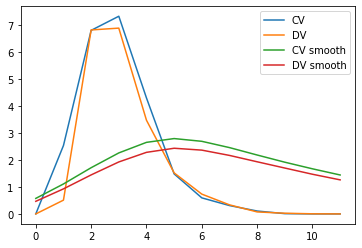

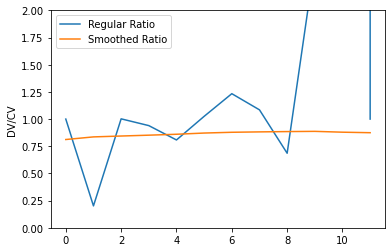

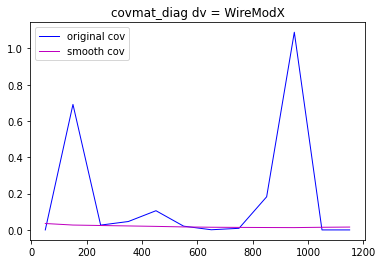

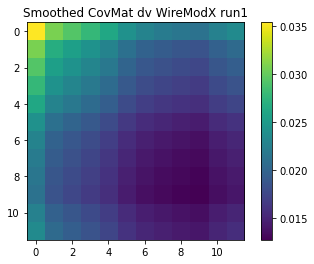

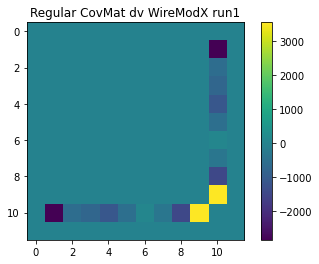

WireModYZ
[0.00526426 0.         0.         ... 0.         0.13217283 0.        ]
2690
23.461840669676146
[0.04359178 0.         0.0400224  ... 0.01317426 0.         0.10863308]
3254
20.671005860781356


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


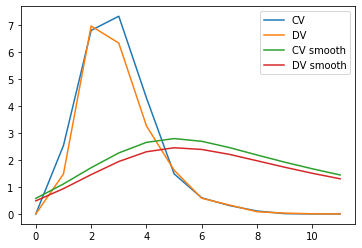

KeyboardInterrupt: 

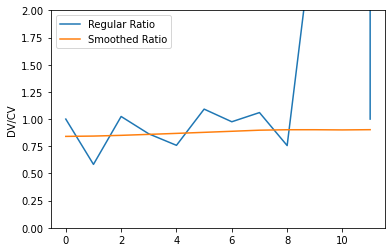

In [109]:
POT_SCALE = 7e20

    
for mode in modelist: 
    plotfolder = basefolder+'PlotDumps/'+mode
    covfolder = basefolder+'covMatrix/'+mode
    histfolder = basefolder+'1Dhists/'+mode
    if not os.path.exists(plotfolder):
        os.makedirs(plotfolder)
    if not os.path.exists(covfolder):
        os.makedirs(covfolder)
    if not os.path.exists(histfolder):
        os.makedirs(histfolder)
    for sigcut in sigcutlist:
        key = tuple((sigcut,mode))
        plotfolder = basefolder+'PlotDumps/'+mode+'/BDTcut'+str(sigcut)
        covfolder = basefolder+'covMatrix/'+mode+'/BDTcut'+str(sigcut)
        histfolder = basefolder+'1Dhists/'+mode+'/BDTcut'+str(sigcut)
        if not os.path.exists(plotfolder):
            os.makedirs(plotfolder)
        if not os.path.exists(covfolder):
            os.makedirs(covfolder)
        if not os.path.exists(histfolder):
            os.makedirs(histfolder)
    
        for run in ['run1','run3']:


            #for dist in varListSel: #[9:10]
            #for _,dist in varListSel.items(): # loop over all variables 
            for i in range(len(var_names)):
                varname = var_names[i]
                dist = varListSel[varname]
                if varname!='Enu_1e1p': continue
                if varname=='Eta': continue
                nbins = 12 if varname == 'Enu_1e1p' else 10
            #    dist = varListSel['MPID_muon']

                cov = np.zeros((nbins,nbins))
                cov_smooth = np.zeros((nbins,nbins))


                print(len(a_df_sys[key][run]))
                for sysi in range(len(a_df_sys[key][run])): # loop over all detvars
            #    for sysi in range(1):
            #        sysi = 3
            #        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0 and Enu_1m1p_cv > 0')
                    print(names[sysi])
                    myvardf = a_df_sys[key][run][sysi].query('Enu_1e1p > 0')
                    #print(a_df_sys[run][sysi].query("isCV==True")[['POT','Etrue']])
                    #print(a_df_sys[run][sysi].query("isCV==False")[['POT','Etrue']])

                    var_sys = myvardf.query(s_cuts)[dist.myname]
                    var_cv = myvardf.query(s_cuts_cv)[dist.myname]
                    #print('cv = %d  and dv = %d'%(var_cv.shape[0],var_sys.shape[0]))

                    pot_cv=myvardf.query("isCV==True").iloc[0]["POT"]
                    pot_dv=myvardf.query("isCV==False").iloc[0]["POT"]
                    #print("cv POT = %f dv POT = %f"%(pot_cv,pot_dv))


                    # get cv and detvar lists and apply weights
                    var_cv_list = np.array(var_cv.astype(float).values.tolist())
                    var_sys_list = np.array(var_sys.astype(float).values.tolist())
                    cv_weights = POT_SCALE * np.array(myvardf.query(s_cuts_cv)['xsec_corr_weight'].astype(float).values.tolist()) / np.array(myvardf.query(s_cuts_cv)['POT'].astype(float).values.tolist())
                    sys_weights = POT_SCALE * np.array(myvardf.query(s_cuts)['xsec_corr_weight'].astype(float).values.tolist()) / np.array(myvardf.query(s_cuts)['POT'].astype(float).values.tolist())
                    
                    if leemode:
                        cv_weights = POT_SCALE * np.array((myvardf.query(s_cuts_cv)['xsec_corr_weight']*myvardf.query(s_cuts_cv)['lee_weight']).astype(float).values.tolist()) / np.array(myvardf.query(s_cuts_cv)['POT'].astype(float).values.tolist())
                        sys_weights = POT_SCALE * np.array((myvardf.query(s_cuts)['xsec_corr_weight']*myvardf.query(s_cuts)['lee_weight']).astype(float).values.tolist()) / np.array(myvardf.query(s_cuts)['POT'].astype(float).values.tolist())
                    ratio = pot_cv / pot_dv
                    cv_weights = np.where(np.logical_or(np.isnan(cv_weights),np.isinf(cv_weights)),0.0,cv_weights)
                    sys_weights = np.where(np.logical_or(np.isnan(sys_weights),np.isinf(sys_weights)),0.0,sys_weights)

                    vcl = var_cv_list[np.logical_not(np.logical_or(np.isnan(var_cv_list),np.isinf(var_cv_list)))]
                    cw = cv_weights[np.logical_not(np.logical_or(np.isnan(var_cv_list),np.isinf(var_cv_list)))]

                    vsl = var_sys_list[np.logical_not(np.logical_or(np.isnan(var_sys_list),np.isinf(var_sys_list)))]
                    sw = sys_weights[np.logical_not(np.logical_or(np.isnan(var_sys_list),np.isinf(var_sys_list)))]

                    #var_cv_list = var_cv_list * cv_weights 

                    #var_sys_list = var_sys_list * sys_weights 
                    
                    print(cv_weights)
                    print(len(cv_weights))
                    print(sum(cv_weights))
                    print(sys_weights)
                    print(len(sys_weights))
                    print(sum(sys_weights))

                    

                    CV_smooth,DV_smooth,hCV,h0 = smooth(vcl,vsl,cw,sw,dist.myrange[0],dist.myrange[1],run,nbin=nbins)
                    np.save(histfolder+'/1Dhist_%s_%s_%s_CV_smooth.npy'%(dist.myname, run, names[sysi]),CV_smooth)
                    np.save(histfolder+'/1Dhist_%s_%s_%s_DV_smooth.npy'%(dist.myname, run, names[sysi]),DV_smooth)
                    np.save(histfolder+'/1Dhist_%s_%s_%s_CV_reg.npy'%(dist.myname, run, names[sysi]),hCV)
                    np.save(histfolder+'/1Dhist_%s_%s_%s_DV_reg.npy'%(dist.myname, run, names[sysi]),h0)
                    
                    plt.plot(hCV,label='CV')
                    plt.plot(h0,label='DV')
                    plt.plot(CV_smooth,label='CV smooth')
                    plt.plot(DV_smooth,label='DV smooth')
                    plt.legend()
                    plt.savefig(plotfolder+'/detsys_%s_%s_hists.png'%(dist.myname, run),dpi=120,bbox_inches='tight')
                    plt.show()
                    plt.plot(h0/hCV,label='Regular Ratio')
                    plt.plot(DV_smooth/CV_smooth,label='Smoothed Ratio')
                    plt.legend()
                    plt.ylim(0,2)
                    plt.ylabel('DV/CV')
                    plt.savefig(plotfolder+'/detsys_%s_%s_ratio.png'%(dist.myname, run),dpi=120,bbox_inches='tight')
                    plt.show()


            #        print(cv_weights)
                    hCVq,binedges = np.histogram(var_cv_list,bins=nbins,range=dist.myrange,weights= cw)#cv_scale)
                    h0q,_ = np.histogram(var_sys_list,bins=nbins,range=dist.myrange,weights=sw)#cv_scale)
                    bincenters = np.diff(binedges)/2 + binedges[:-1] 
                    h0 = h0 *ratio

            #        hCV_smooth,binedges = np.histogram(CV_smooth,bins=nbins,range=dist.myrange)#,weights= cv_weights)#cv_scale)
            #        hDV_smooth,_ = np.histogram(DV_smooth,bins=nbins,range=dist.myrange)#,weights=sys_weights)#cv_scale)
            #        bincenters = np.diff(binedges)/2 + binedges[:-1] 



            #        print(h0)
            #        print(hCV)
            #        print(bincenters)
                    # polyfit
                    #polyterms = 4
                    #polyCV = np.polyfit(bincenters, hCV, polyterms)
                    #fCV = np.poly1d(polyCV)    
                    #poly0 = np.polyfit(bincenters, h0, polyterms)
                    #f0 = np.poly1d(poly0)    
                    #hCV = fCV(bincenters)
                    #h0 = f0(bincenters)    

                    #for i in range(nbins):
                    #    for j in range(nbins):
                    #        if hCV[i] > 0 and hCV[j] > 0:
                    #            cov[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
                    #        elif h0[i] > 0 and h0[j] > 0:
                    #            cov[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(h0[i]*h0[j])
                    cov_tmp = np.zeros((nbins,nbins))
                    cov_smooth_tmp = np.zeros((nbins,nbins))            
                    for i in range(nbins):
                        for j in range(nbins):
                            if (hCV[i]*hCV[j])<1e-8:
                                cov_tmp[i][j]=0
                            else:
                #               print('%d,%d'%(h0[i],hCV[j]))
                                cov_tmp[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
                #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
                #    print(dist.myname,cov.diagonal())

                    for i in range(nbins):
                        for j in range(nbins):
                            if (CV_smooth[i]*CV_smooth[j])<1e-8:
                                cov_smooth_tmp[i][j]=0
                            else:
                #               print('%d,%d'%(h0[i],hCV[j]))
                                cov_smooth_tmp[i][j] += (DV_smooth[i]-CV_smooth[i])*(DV_smooth[j]-CV_smooth[j])/(CV_smooth[i]*CV_smooth[j])
                #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
                    #print(dist.myname,cov_smooth_tmp.diagonal())
                    #print(dist.myname,cov_tmp.diagonal())

                    offset = (dist.myrange[1] - dist.myrange[0] )/(2*nbins)
                    x= np.linspace(dist.myrange[0]+offset,dist.myrange[1]-offset,nbins)

                    plt.plot(x,cov_tmp.diagonal(),linewidth=1, linestyle="-", c="b",label='original cov')
                    plt.plot(x,cov_smooth_tmp.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth cov')
                    plt.legend()
                    plt.title('covmat_diag dv = %s'%names[sysi])
                    plt.savefig(plotfolder+'/detsys_%s_%s_%s_cov_diag.png'%(dist.myname, run,names[sysi]),dpi=120,bbox_inches='tight')

                    plt.show()

                    plt.imshow(cov_smooth_tmp, interpolation='none')
                    plt.colorbar(orientation='vertical')
                    plt.title('Smoothed CovMat dv %s %s'%(names[sysi],run))

                    plt.savefig(plotfolder+'/detsys_%s_%s_%s_cov.png'%(dist.myname, run,names[sysi]),dpi=120,bbox_inches='tight')
                    plt.show()
                    
                    plt.imshow(cov_tmp, interpolation='none')
                    plt.colorbar(orientation='vertical')
                    plt.title('Regular CovMat dv %s %s'%(names[sysi],run))

                    plt.savefig(plotfolder+'/detsys_%s_%s_%s_cov_reg.png'%(dist.myname, run,names[sysi]),dpi=120,bbox_inches='tight')
                    plt.show()

                    cov = cov+ cov_tmp
                    cov_smooth += cov_smooth_tmp
                #print(np.sqrt(np.diag(cov_smooth)))
                plt.imshow(cov_smooth, interpolation='none')
                plt.colorbar(orientation='vertical')
                plt.title('Smoothed CovMat Total')

                plt.savefig(plotfolder+'/detsys_%s_%s_cov_smooth.png'%(dist.myname, run),dpi=120,bbox_inches='tight')

                plt.show()
                
                plt.imshow(cov, interpolation='none')
                plt.colorbar(orientation='vertical')
                plt.title('Regular CovMat Total')

                plt.savefig(plotfolder+'/detsys_%s_%s_cov_reg.png'%(dist.myname, run),dpi=120,bbox_inches='tight')

                plt.show()
                
                np.savetxt(covfolder+'/detsys_%s_%s_cov_smooth.csv'%(dist.myname, run),cov_smooth, delimiter=',')
                np.savetxt(covfolder+'/detsys_%s_%s_cov_reg.csv'%(dist.myname, run),cov, delimiter=',')
    

# Run 1

In [10]:
run = 'run1'
f_scaleslist = []
s_detsyslist = []
names = ['LYDown','LYAtt','LYRayleigh']

for name in names:
    s_detsyslist.append(name)

#df_cv = pd.read_parquet('../../data/pickles/detsys_CV_run3_nodupesMay1.parquet')
#scaleCV = 9.65858292241e+19 

a_df_sys = []

i=0
for sys in s_detsyslist:
    df_sys = decode_df(pd.read_parquet('%s/pickles/%s_%s_%s.parquet'%(sysfolder,sys,run,tag)))
    i+=1
    a_df_sys.append(df_sys)
    print(sys)
    print("total %d, cv = %d dv = %d"%(df_sys.shape[0],df_sys.query("isCV==True").shape[0],df_sys.query("isCV==False").shape[0]))
#    print(df_sys.shape[0])

#df_numu_run3_presel = pd.read_parquet('../../data/pickles/numu_run1_nodupesMay1.parquet')
#print((list(a_df_sys[7])))


FileNotFoundError: /home/nwkamp/Research/MicroBooNE/Data/systematics/pickles/LYDown_run1_3March2021_vA_fullLowE_withPi0Sample_newShowerCalib.parquet

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[1.00000000e-06 5.06256801e-01 8.21324335e+01 3.21560546e+02
 5.06861681e+02 5.67135632e+02 5.47378942e+02 5.28980197e+02
 5.09453719e+02 3.84266207e+02 3.50314889e+02 2.10060506e+02]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  700.161600    cv[1] = 608.287100  rat = 0.535108
bwid = 165.074399
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 4.72770089e-01 7.48049190e+01 3.26724865e+02
 4.98314782e+02 5.44470284e+02 5.45524094e+02 4.90708759e+02
 5.47172476e+02 3.44961818e+02 3.62648671e+02 2.70182775e+02

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


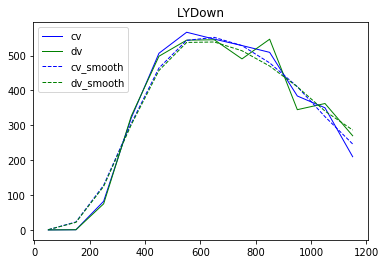

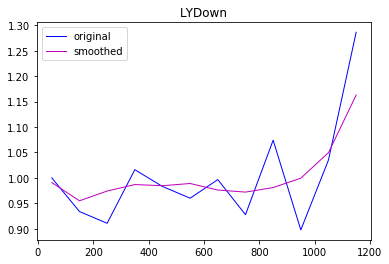

Enu_1e1p [8.62788916e-05 2.02711689e-03 6.68924472e-04 1.73064871e-04
 2.37183902e-04 1.22070006e-04 5.71783813e-04 7.82184746e-04
 3.63262042e-04 3.33923087e-07 2.45994976e-03 2.64810597e-02]
Enu_1e1p [0.         0.00572761 0.00656738 0.00114947 0.00030688 0.0001177
 0.00052943 0.00164871 0.02968972 0.00119432 0.05402155 0.0814424 ]


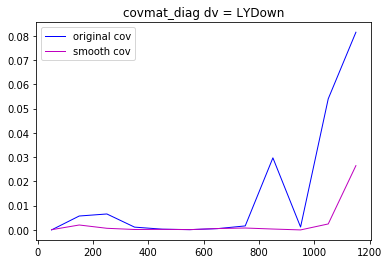

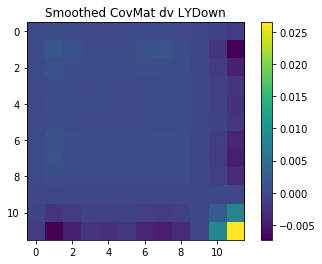

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[1.00000000e-06 5.06256801e-01 8.21324335e+01 3.21560546e+02
 5.06861681e+02 5.67135632e+02 5.47378942e+02 5.28980197e+02
 5.09453719e+02 3.84266207e+02 3.50314889e+02 2.10060506e+02]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  700.161600    cv[1] = 608.287100  rat = 0.535108
bwid = 165.074399
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 4.66482609e-01 7.58216550e+01 3.08039995e+02
 4.80483805e+02 5.62085926e+02 5.45509388e+02 4.99450298e+02
 4.64088572e+02 3.97096141e+02 3.36469397e+02 2.54646287e+02]
!

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


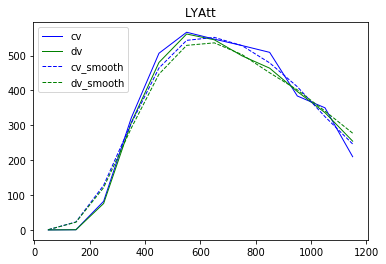

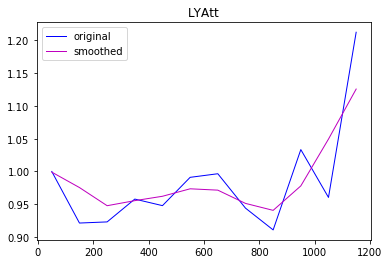

Enu_1e1p [9.55953516e-07 5.99042752e-04 2.71839880e-03 1.97403400e-03
 1.42617365e-03 6.95732756e-04 8.08008223e-04 2.36337517e-03
 3.50810158e-03 4.82064371e-04 2.44365822e-03 1.57853709e-02]
Enu_1e1p [ 0.          5.00903295  5.61447112  5.73802582  6.37283933  7.00609802
  6.98464427  6.61693835  7.03692326  9.79254022 10.07131945 10.2361216 ]


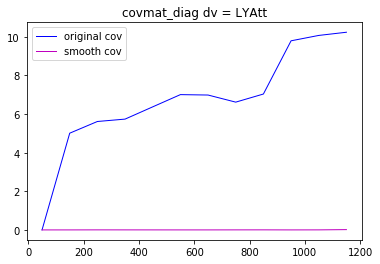

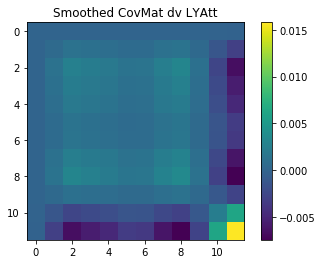

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[1.00000000e-06 5.06256801e-01 8.21324335e+01 3.21560546e+02
 5.06861681e+02 5.67135632e+02 5.47378942e+02 5.28980197e+02
 5.09453719e+02 3.84266207e+02 3.50314889e+02 2.10060506e+02]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  700.161600    cv[1] = 608.287100  rat = 0.535108
bwid = 165.074399
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 6.03446517e-01 7.52821072e+01 3.13794270e+02
 4.86604265e+02 5.53890749e+02 5.58525190e+02 4.52187167e+02
 5.68207078e+02 3.74594719e+02 3.11646987e+02 2.02971495e+02]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


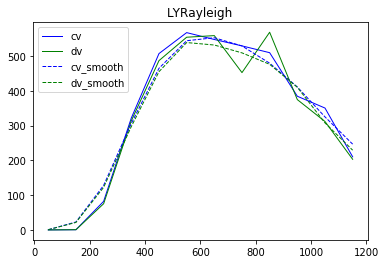

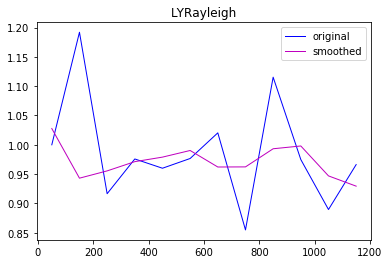

Enu_1e1p [7.70831698e-04 3.23971291e-03 1.98110096e-03 8.26286964e-04
 4.41741949e-04 9.41203505e-05 1.43433670e-03 1.41983710e-03
 4.56084281e-05 4.01187306e-06 2.81221151e-03 4.97552341e-03]
Enu_1e1p [0.         0.56439987 0.63816052 0.63824838 0.64528559 0.64658147
 0.64286673 0.65974288 0.62880782 0.6813338  0.65497225 0.69531105]


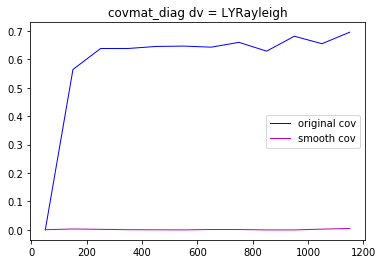

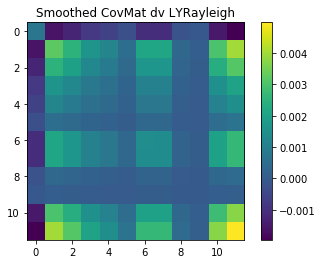

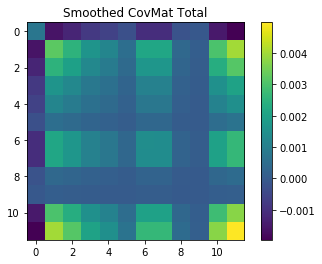

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[ 597.3099649  1288.24670639 1298.67377991  693.54028316  407.30279033
  240.95200143  167.75039265  114.10444961   86.12370138   42.65579291]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  217.403500    cv[1] = 291.882300  rat = 0.426879
bwid = 106.824086
!!!!!!!!!!!!!!!!!!!!
[ 583.6689969  1314.71362502 1258.16457047  709.6876342   444.28487546
  208.14962636  164.19984004  105.42552034   99.68060977   39.43789675]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


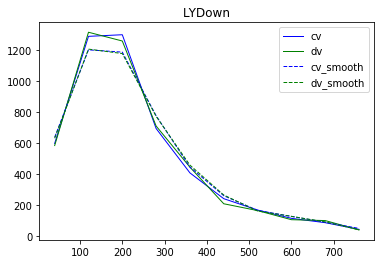

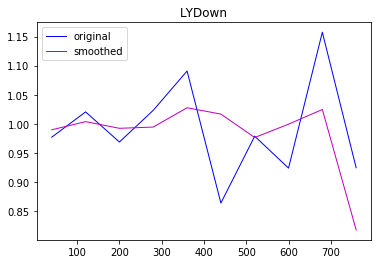

PT_1e1p [1.03689318e-04 1.46367840e-05 5.84407849e-05 3.01079185e-05
 7.65987087e-04 2.81652286e-04 5.50495234e-04 3.37066868e-07
 6.11117061e-04 3.32074394e-02]
PT_1e1p [7.72217311e-04 1.33712728e-04 9.57207440e-05 1.65805168e-04
 5.71101054e-03 3.39201340e-03 9.23456100e-04 5.05002951e-02
 1.08049342e-01 1.48441488e+00]


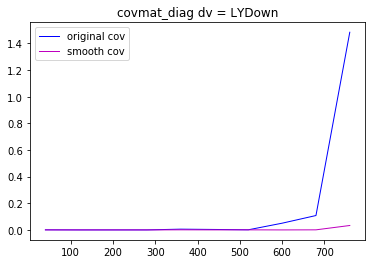

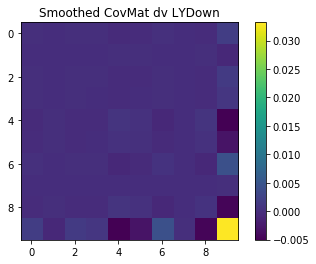

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[ 597.3099649  1288.24670639 1298.67377991  693.54028316  407.30279033
  240.95200143  167.75039265  114.10444961   86.12370138   42.65579291]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  217.403500    cv[1] = 291.882300  rat = 0.426879
bwid = 106.824086
!!!!!!!!!!!!!!!!!!!!
[ 593.18118518 1304.44446189 1194.18484349  736.17121955  437.08677154
  206.24975854  188.35986101  103.93320189   62.19045095   40.03499586]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


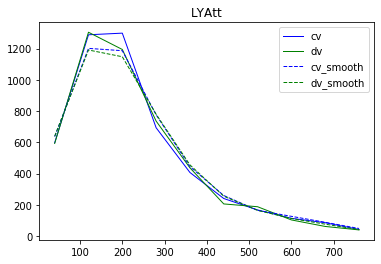

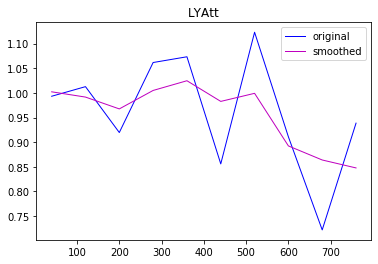

PT_1e1p [4.35783547e-06 7.35887953e-05 1.06108143e-03 2.36363285e-05
 6.02439421e-04 3.01061802e-04 9.62436630e-07 1.15759164e-02
 1.85271484e-02 2.31762298e-02]
PT_1e1p [ 6.25468478  6.63971452  5.98470588  7.91474638  8.24255887  5.71605299
  9.86276886 11.36645467  8.09532344 23.31495701]


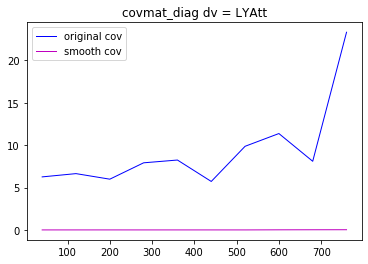

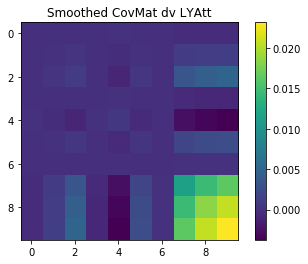

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[ 597.3099649  1288.24670639 1298.67377991  693.54028316  407.30279033
  240.95200143  167.75039265  114.10444961   86.12370138   42.65579291]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  217.403500    cv[1] = 291.882300  rat = 0.426879
bwid = 106.824086
!!!!!!!!!!!!!!!!!!!!
[ 558.97067645 1289.69737233 1277.31042844  707.50690719  392.14726877
  233.2227363   136.48922463   94.43429136   49.59514395   36.50288629]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


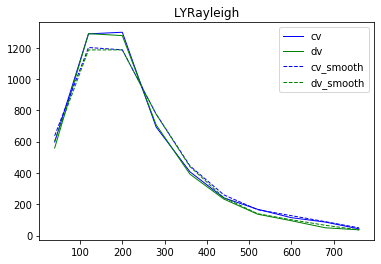

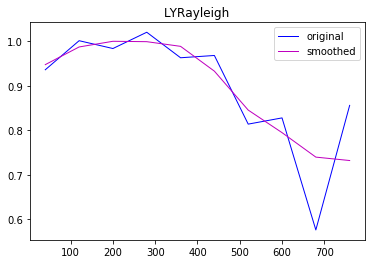

PT_1e1p [2.77328787e-03 1.67530602e-04 3.28731641e-08 1.13302787e-06
 1.33432786e-04 4.53271758e-03 2.39627316e-02 4.22191275e-02
 6.78686265e-02 7.19230562e-02]
PT_1e1p [0.65751271 0.6409603  0.64713931 0.64963921 0.65070917 0.67320185
 0.65673344 0.6391328  0.64286673 0.66169949]


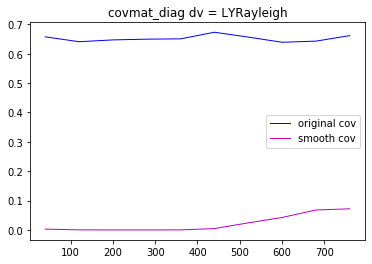

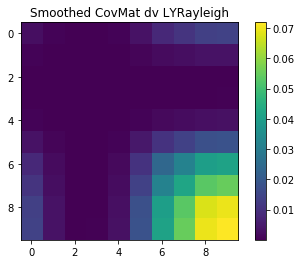

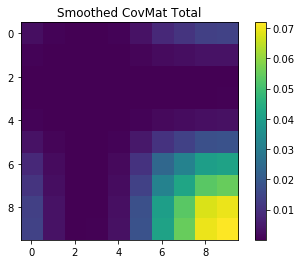

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[415.69549392 438.69734531 420.96365971 390.08644892 496.8642064
 482.13305017 484.06826314 591.95940097 649.12258843 613.46569793]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  1.812800    cv[1] = 1.976900  rat = 0.478349
bwid = 0.418937
!!!!!!!!!!!!!!!!!!!!
[418.58126336 496.46223926 442.29666944 363.34597603 423.10206554
 498.04125127 511.84881433 551.37104199 612.13282816 649.18609774]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


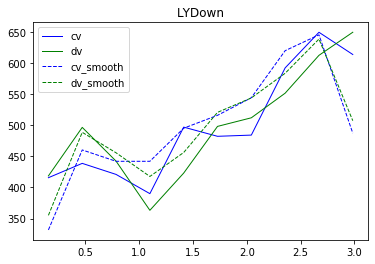

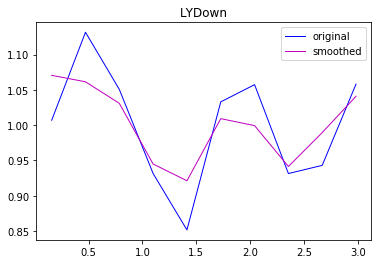

AlphaT_1e1p [4.98249975e-03 3.77747239e-03 9.57239880e-04 3.03491928e-03
 6.20847531e-03 8.49297971e-05 3.85973531e-07 3.42940604e-03
 1.10909578e-04 1.67670509e-03]
AlphaT_1e1p [1.61848614e-03 8.63143434e-03 2.84182369e-07 3.79913481e-04
 4.36295291e-03 6.22058233e-04 9.02617044e-05 1.80328174e-03
 2.81511110e-04 2.54750373e-03]


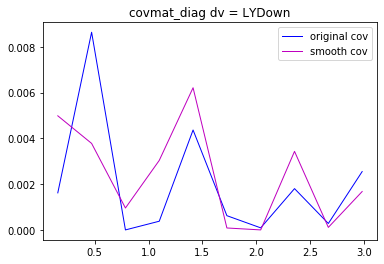

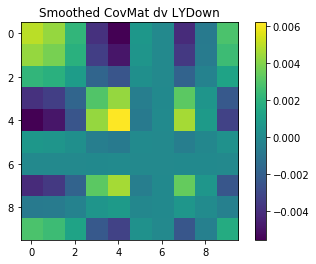

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[415.69549392 438.69734531 420.96365971 390.08644892 496.8642064
 482.13305017 484.06826314 591.95940097 649.12258843 613.46569793]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  1.812800    cv[1] = 1.976900  rat = 0.478349
bwid = 0.418937
!!!!!!!!!!!!!!!!!!!!
[421.78006239 445.78623846 399.24991933 417.83862577 457.50245126
 467.30997679 467.09571238 597.93221632 587.37595319 638.75974534]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


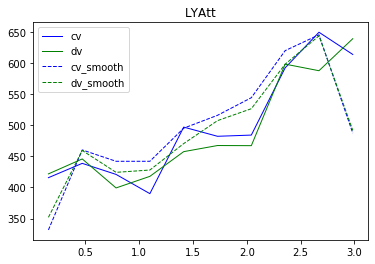

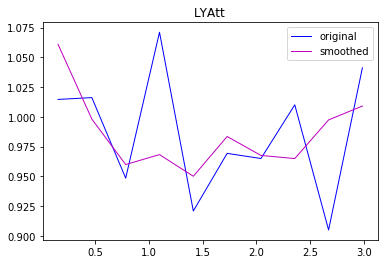

AlphaT_1e1p [3.71554853e-03 3.77696820e-06 1.61020827e-03 1.00965862e-03
 2.49927745e-03 2.74352454e-04 1.05412963e-03 1.23379281e-03
 6.70776182e-06 8.22619076e-05]
AlphaT_1e1p [8.25533598 6.78426814 6.03915623 8.11283498 6.12165276 5.76979934
 6.21562349 7.60369197 5.93652778 7.27396189]


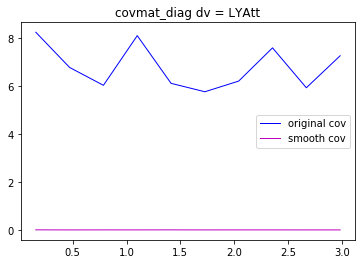

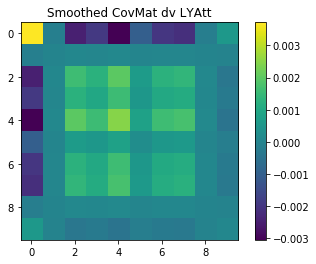

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[415.69549392 438.69734531 420.96365971 390.08644892 496.8642064
 482.13305017 484.06826314 591.95940097 649.12258843 613.46569793]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  1.812800    cv[1] = 1.976900  rat = 0.478349
bwid = 0.418937
!!!!!!!!!!!!!!!!!!!!
[396.023108   443.9981578  424.39398119 312.78415726 494.45652496
 524.64684365 506.43856284 475.30412839 617.48686199 626.51867049]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


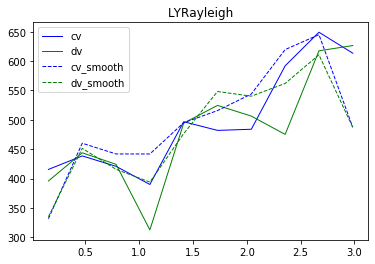

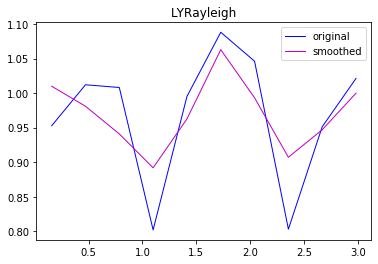

AlphaT_1e1p [1.00106359e-04 3.62100193e-04 3.49439039e-03 1.17064657e-02
 1.39884885e-03 3.96713333e-03 4.67229254e-05 8.63827767e-03
 2.81791891e-03 5.48191475e-09]
AlphaT_1e1p [0.63848557 0.62407411 0.66005553 0.651591   0.66090936 0.63809491
 0.65447589 0.64732606 0.6557619  0.64586367]


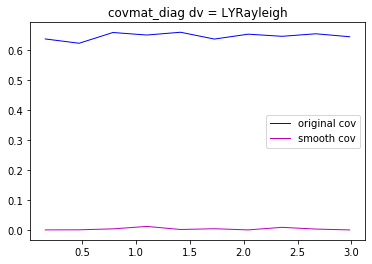

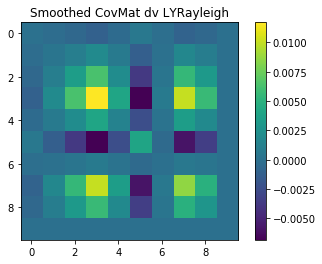

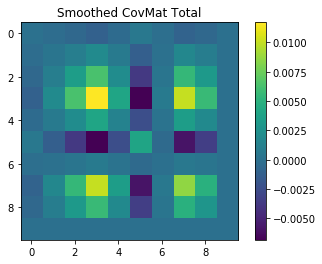

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[2421.16220249  886.36113822  313.47957906  176.05292905  144.51358854
  159.39440626  113.8232136   120.18474788   71.92175104   68.67026441]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  201.397800    cv[1] = 2616.430700  rat = 0.071473
bwid = 677.068858
!!!!!!!!!!!!!!!!!!!!
[2308.43903841  924.52892221  337.64273665  169.82140362  177.0359586
  170.28814364  129.08242564  116.07655207   81.21698028   65.21130949]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


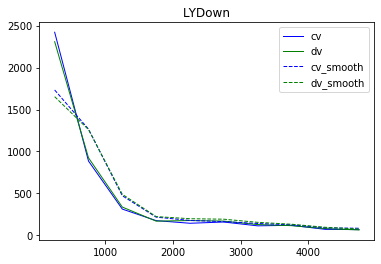

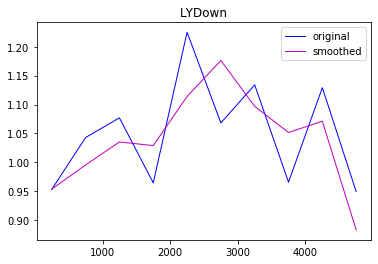

SphB_1e1p [2.11708071e-03 1.93137706e-05 1.25234453e-03 8.44976005e-04
 1.29857640e-02 3.10333534e-02 9.38881282e-03 2.67871887e-03
 5.06890673e-03 1.36148316e-02]
SphB_1e1p [5.50645579e-04 9.48650329e-03 1.83367772e-03 3.47257883e-03
 2.46450888e-03 2.65210885e-02 2.88623462e-03 6.47683145e-05
 2.04757448e-01 4.84444995e-02]


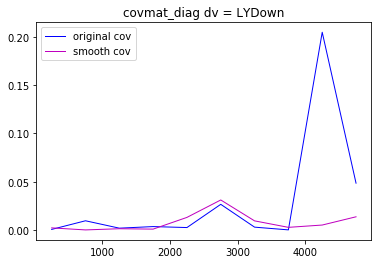

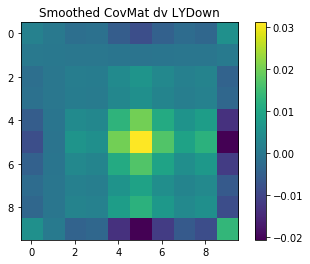

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[2421.16220249  886.36113822  313.47957906  176.05292905  144.51358854
  159.39440626  113.8232136   120.18474788   71.92175104   68.67026441]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  201.397800    cv[1] = 2616.430700  rat = 0.071473
bwid = 677.068858
!!!!!!!!!!!!!!!!!!!!
[2278.74024537  876.87114829  398.64572327  162.1532238   158.76146471
  126.12143788  153.29478222  115.88924091   93.46814216   45.43280155]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


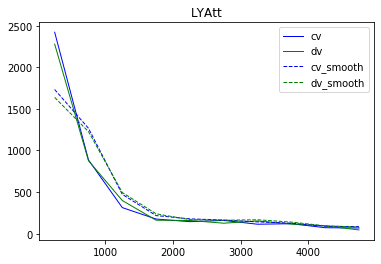

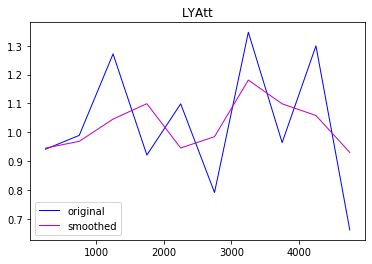

SphB_1e1p [0.00300787 0.00097928 0.00209621 0.00982437 0.00296395 0.00023144
 0.03276889 0.00974367 0.00337514 0.00486523]
SphB_1e1p [ 6.19247206  6.5897759  11.14362037  6.67654955  7.01480976  9.12943212
 13.41643444  5.36878847 17.99979797  6.23567745]


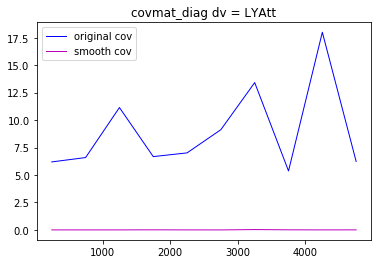

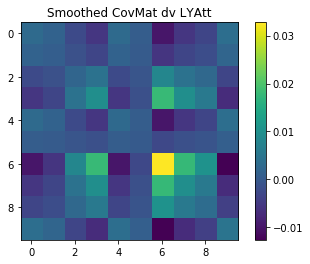

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[2421.16220249  886.36113822  313.47957906  176.05292905  144.51358854
  159.39440626  113.8232136   120.18474788   71.92175104   68.67026441]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  201.397800    cv[1] = 2616.430700  rat = 0.071473
bwid = 677.068858
!!!!!!!!!!!!!!!!!!!!
[2180.62597453  916.22407608  374.16032402  157.76104096  177.76508855
  133.41644849  125.01132049  168.79638538   74.13941197   78.13563941]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


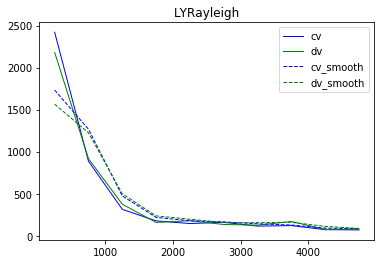

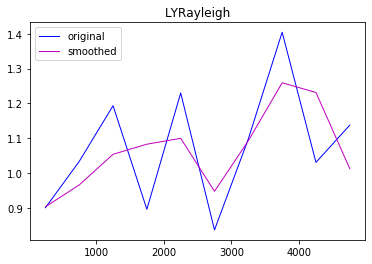

SphB_1e1p [0.00935227 0.00114134 0.00292519 0.00690984 0.00998565 0.00270702
 0.0086393  0.06723836 0.0536373  0.00016069]
SphB_1e1p [0.64935499 0.6574742  0.61395555 0.62968387 0.62794422 0.64226375
 0.63764228 0.64697746 0.57782633 0.61403052]


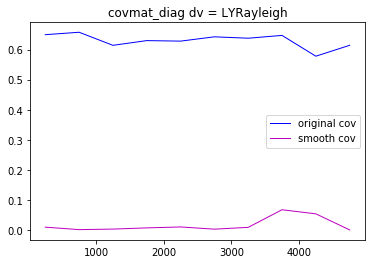

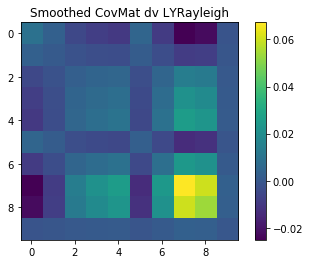

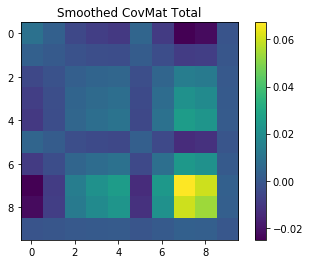

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[  13.61779228   41.16453171   47.08960848  112.83707022  250.54639506
  600.26216527 1284.17864507 1506.28982308  846.3122851   217.81461841]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  -141.872400    cv[1] = -346.338900  rat = 0.290596
bwid = 146.953586
!!!!!!!!!!!!!!!!!!!!
[  13.25235548   22.54360114   33.9694695   133.29010904  312.55292099
  653.70193398 1218.58007925 1550.73865602  800.69746619  177.99606594]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


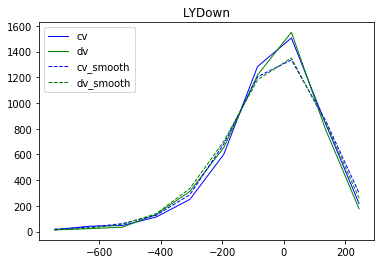

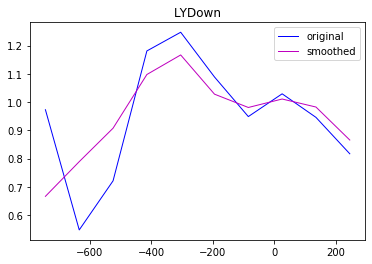

PzEnu_1e1p [0.11120565 0.0443702  0.0085101  0.00957635 0.02792068 0.00079784
 0.0003568  0.00012261 0.00029871 0.01798119]
PzEnu_1e1p [6.14220095e-03 4.74733950e-02 2.33195992e-02 6.47361319e-02
 1.63894546e-04 7.50622321e-03 6.36656163e-05 4.39957241e-04
 7.18891127e-04 1.26591132e-03]


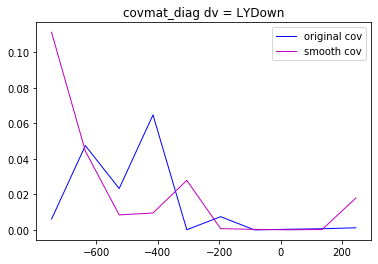

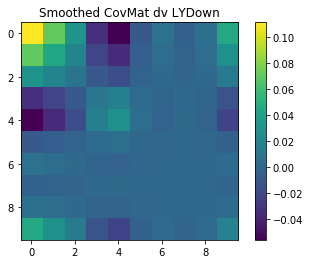

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[  13.61779228   41.16453171   47.08960848  112.83707022  250.54639506
  600.26216527 1284.17864507 1506.28982308  846.3122851   217.81461841]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  -141.872400    cv[1] = -346.338900  rat = 0.290596
bwid = 146.953586
!!!!!!!!!!!!!!!!!!!!
[  11.74719689   24.93765153   24.11452646  127.21000685  271.24388972
  616.88412171 1310.27696055 1430.44407047  796.12915843  225.77297878]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


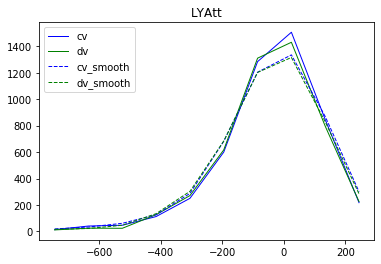

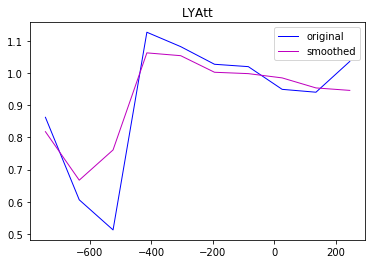

PzEnu_1e1p [3.31614912e-02 1.10929612e-01 5.70964132e-02 3.98970547e-03
 2.96246945e-03 7.96490656e-06 2.07233265e-06 2.17144864e-04
 2.11063464e-03 2.87433125e-03]
PzEnu_1e1p [14.87745448  3.95613408  5.63116309 10.75118875  6.04355806  7.65760438
  6.83097156  6.57488043  5.75761034  8.57130711]


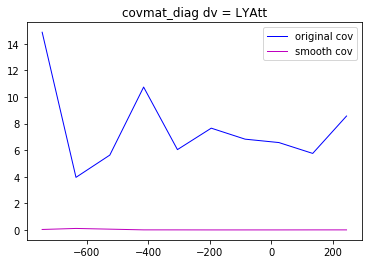

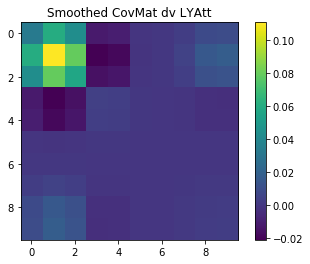

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[  13.61779228   41.16453171   47.08960848  112.83707022  250.54639506
  600.26216527 1284.17864507 1506.28982308  846.3122851   217.81461841]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  -141.872400    cv[1] = -346.338900  rat = 0.290596
bwid = 146.953586
!!!!!!!!!!!!!!!!!!!!
[   5.36090541   13.93298483   31.55011483  120.08066533  313.00267225
  613.42940563 1291.57621805 1458.6746795   756.58789797  194.32856345]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


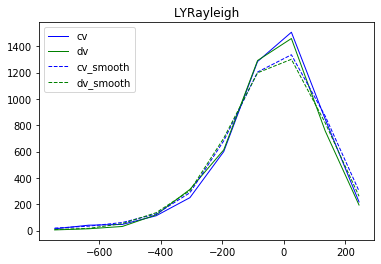

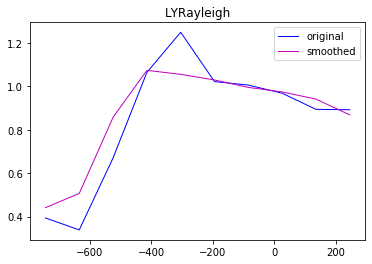

PzEnu_1e1p [3.12601217e-01 2.43487018e-01 2.03885384e-02 5.43937335e-03
 3.05002872e-03 8.66141016e-04 2.34763513e-05 6.56424832e-04
 3.45576363e-03 1.73082574e-02]
PzEnu_1e1p [0.71324941 0.78357809 0.62430585 0.64554048 0.64528559 0.63169757
 0.64026361 0.65046335 0.66629201 0.62840699]


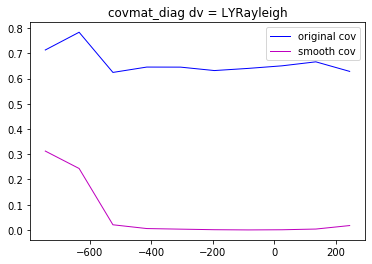

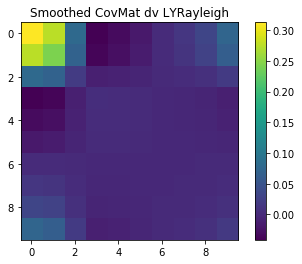

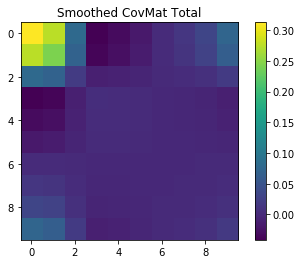

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[  89.83294116   25.5589438   151.19353526  809.09994833 1583.24991785
 1239.29282054  602.32457492  200.67024629  103.1376076    72.20739093]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  360.203500    cv[1] = 473.387100  rat = 0.432111
bwid = 107.011150
!!!!!!!!!!!!!!!!!!!!
[  97.06221647   34.11916096  157.77373746  852.56416446 1483.64774256
 1201.74765412  579.79316949  277.35243938  105.36291564   99.60957334]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


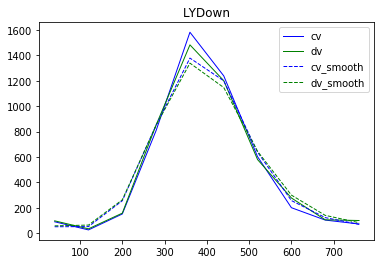

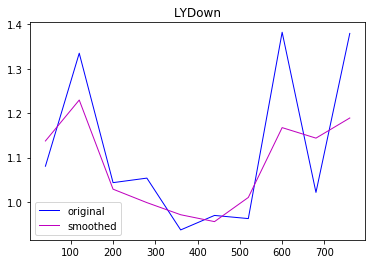

ChargeNearTrunk [1.88596451e-02 5.26734897e-02 8.30816560e-04 2.09678468e-06
 8.26578927e-04 1.95659540e-03 1.04330638e-04 2.80213698e-02
 2.06599933e-02 3.57513532e-02]
ChargeNearTrunk [1.82597456e-02 1.25976668e-03 3.19403936e-02 1.37722447e-05
 1.69443382e-05 1.11977247e-05 1.47120684e-04 4.30548570e-03
 5.31008004e-03 2.50054476e-03]


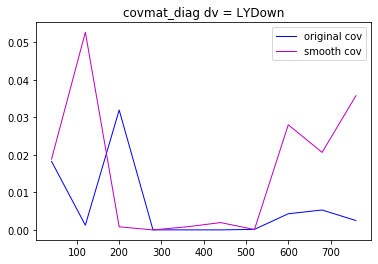

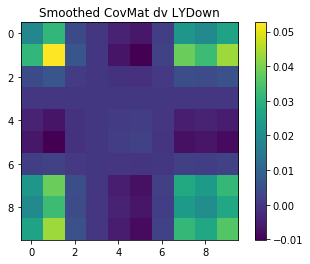

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[  89.83294116   25.5589438   151.19353526  809.09994833 1583.24991785
 1239.29282054  602.32457492  200.67024629  103.1376076    72.20739093]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  360.203500    cv[1] = 473.387100  rat = 0.432111
bwid = 107.011150
!!!!!!!!!!!!!!!!!!!!
[ 113.2296499    32.8124139   132.27069635  833.80332923 1610.09866243
 1083.46389894  557.06362895  274.90672899  117.54140362   58.65356356]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


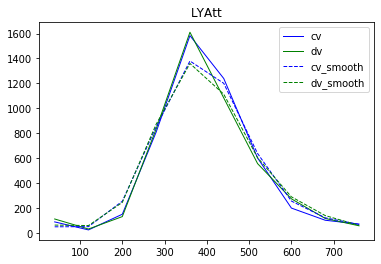

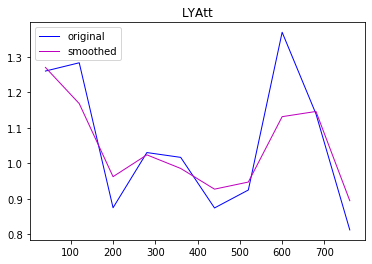

ChargeNearTrunk [0.07328494 0.02843534 0.00140571 0.00058031 0.00020347 0.00528539
 0.00277624 0.01736672 0.02144266 0.01109626]
ChargeNearTrunk [7.24985367 6.34868484 7.3625526  6.70336438 7.00689438 6.18467624
 6.81453737 8.04405799 7.29362243 6.74895102]


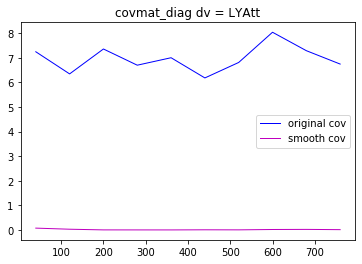

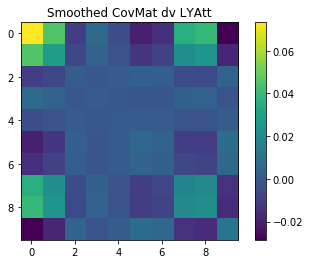

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[  89.83294116   25.5589438   151.19353526  809.09994833 1583.24991785
 1239.29282054  602.32457492  200.67024629  103.1376076    72.20739093]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  360.203500    cv[1] = 473.387100  rat = 0.432111
bwid = 107.011150
!!!!!!!!!!!!!!!!!!!!
[  99.92520367   33.76689248  112.67762766  788.98764986 1501.2573884
 1154.34512165  566.96742397  239.41586672  118.0334526   103.89414305]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


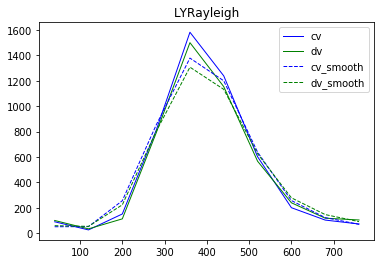

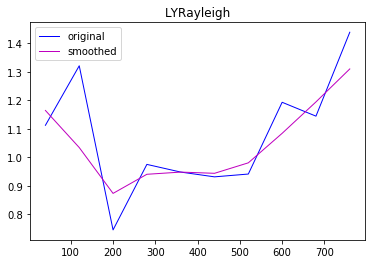

ChargeNearTrunk [0.02702633 0.00117522 0.01603125 0.00354752 0.00269112 0.00314951
 0.00037489 0.00708494 0.03778908 0.09614708]
ChargeNearTrunk [0.65109324 0.62270471 0.6756947  0.64512374 0.64338993 0.64830105
 0.66473796 0.62924454 0.66713022 0.66169949]


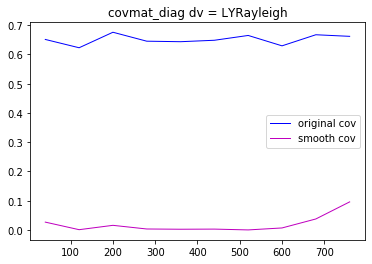

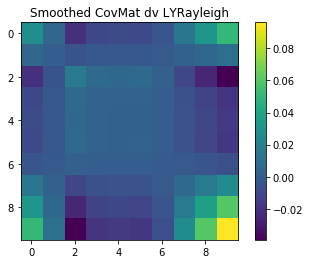

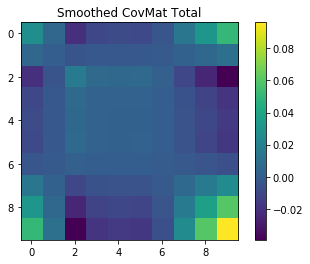

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[1.87383686e+03 1.11490744e+03 7.39960789e+02 4.35662658e+02
 2.46083364e+02 1.31235456e+02 6.80026565e+01 4.53812829e+01
 3.49858540e+00 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  252.889900    cv[1] = 140.164700  rat = 0.643396
bwid = 80.784434
!!!!!!!!!!!!!!!!!!!!
[1.87773763e+03 1.08424803e+03 7.39408249e+02 4.39638122e+02
 2.76436810e+02 1.29808382e+02 5.65109896e+01 2.29330210e+01
 5.78919466e+00 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


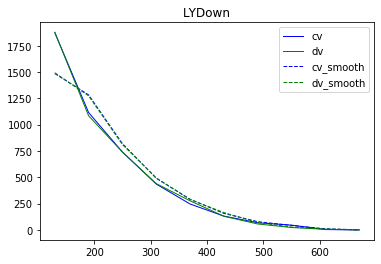

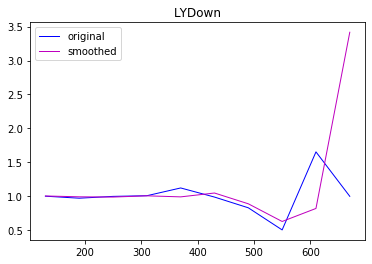

Q0_1e1p [2.78701552e-05 5.04862692e-05 1.13947678e-04 5.80055152e-05
 6.33968668e-05 2.38091943e-03 1.21098500e-02 1.37159164e-01
 3.18584395e-02 5.84117968e+00]
Q0_1e1p [2.73476328e-04 9.85787942e-04 1.58873209e-03 5.91000135e-03
 2.13614565e-02 4.42516998e-03 2.80593545e-04 7.30141903e-04
 7.20186537e-01 0.00000000e+00]


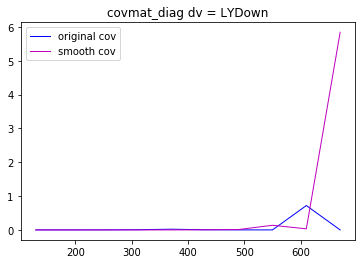

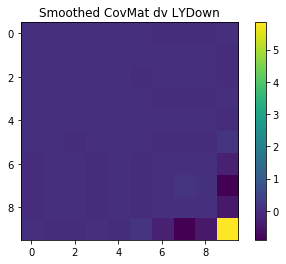

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[1.87383686e+03 1.11490744e+03 7.39960789e+02 4.35662658e+02
 2.46083364e+02 1.31235456e+02 6.80026565e+01 4.53812829e+01
 3.49858540e+00 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  252.889900    cv[1] = 140.164700  rat = 0.643396
bwid = 80.784434
!!!!!!!!!!!!!!!!!!!!
[1.82904002e+03 1.15973309e+03 6.84262293e+02 3.97185160e+02
 2.57481353e+02 1.24621273e+02 4.36896140e+01 6.24392117e+01
 5.27034297e+00 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


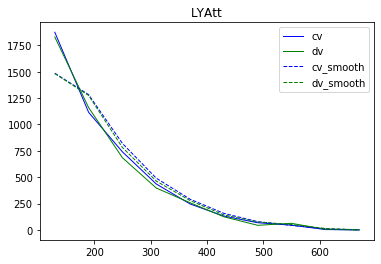

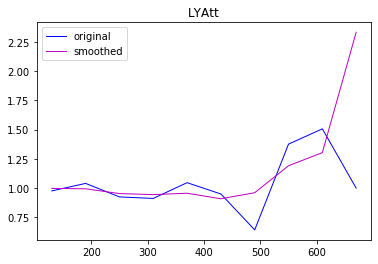

Q0_1e1p [5.50610767e-06 3.53596424e-05 2.17771707e-03 3.10586311e-03
 1.92736532e-03 8.34688253e-03 1.55131846e-03 3.65018388e-02
 9.18417217e-02 1.77535773e+00]
Q0_1e1p [ 6.0694046   8.12448561  6.94014365  7.77432295  7.77607617  7.83174224
  3.07081415  3.52800887 29.98847938  0.        ]


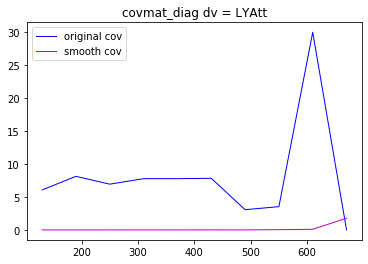

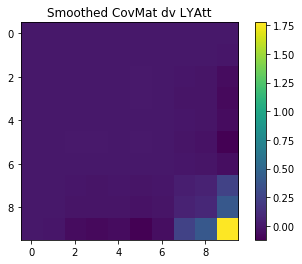

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[1.87383686e+03 1.11490744e+03 7.39960789e+02 4.35662658e+02
 2.46083364e+02 1.31235456e+02 6.80026565e+01 4.53812829e+01
 3.49858540e+00 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  252.889900    cv[1] = 140.164700  rat = 0.643396
bwid = 80.784434
!!!!!!!!!!!!!!!!!!!!
[1.87281561e+03 1.15079495e+03 6.42213816e+02 3.70539130e+02
 2.56098429e+02 1.24287277e+02 4.26774630e+01 4.12143148e+01
 3.57456380e+00 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


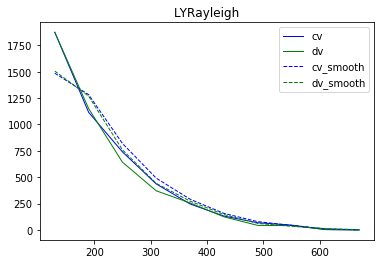

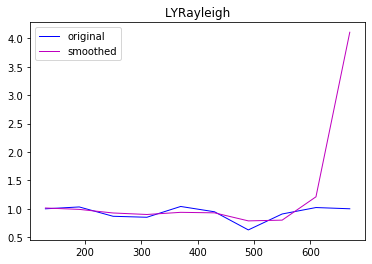

Q0_1e1p [1.84668178e-04 1.11601587e-04 5.48108486e-03 1.01315109e-02
 3.92734476e-03 5.11714917e-03 4.54846917e-02 4.00467683e-02
 4.43772642e-02 9.66898530e+00]
Q0_1e1p [0.64649261 0.63410851 0.6656572  0.6676058  0.63764228 0.69120387
 0.75588139 0.69585128 0.66169949 0.        ]


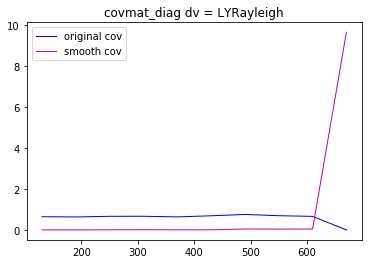

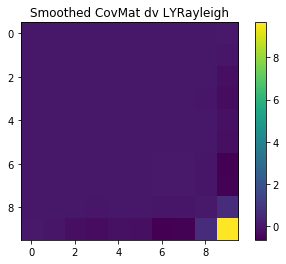

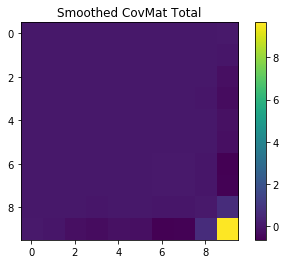

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[   9.27433685  223.76436285 1050.66443725 1403.49562867 1125.5372382
  612.00860122  319.38961383   96.75063522   40.15588535   42.63864594]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  685.747600    cv[1] = 492.283400  rat = 0.582113
bwid = 187.012477
!!!!!!!!!!!!!!!!!!!!
[   6.15948864  220.56366804 1060.28644472 1429.0069916  1109.76447886
  582.45582996  330.92789905  112.68296727   36.04515058   39.1331905 ]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


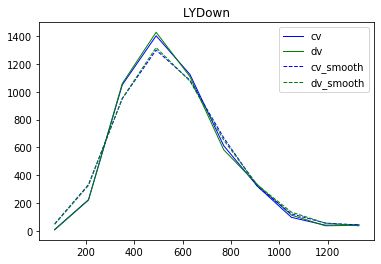

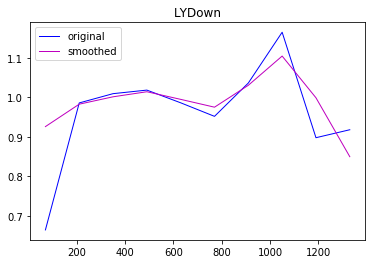

Q3_1e1p [5.51237328e-03 3.04268638e-04 1.46482807e-06 1.96217889e-04
 2.78385894e-05 6.28697418e-04 9.21703809e-04 1.08899223e-02
 1.64444973e-06 2.26280400e-02]
Q3_1e1p [1.64669511e-01 2.51356060e-05 5.73747662e-04 1.82278956e-04
 3.33904197e-03 1.12122683e-04 3.43651408e-03 8.98942078e-02
 6.14220095e-03 2.80593545e-04]


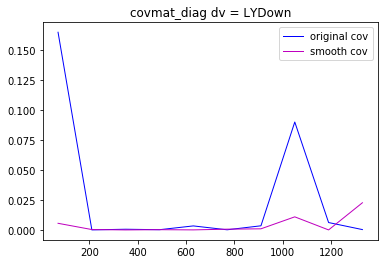

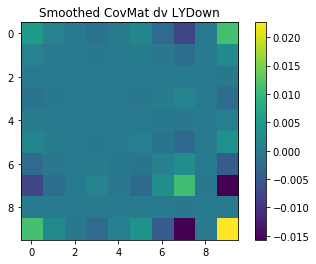

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[   9.27433685  223.76436285 1050.66443725 1403.49562867 1125.5372382
  612.00860122  319.38961383   96.75063522   40.15588535   42.63864594]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  685.747600    cv[1] = 492.283400  rat = 0.582113
bwid = 187.012477
!!!!!!!!!!!!!!!!!!!!
[   7.75782186  243.67373517 1046.65611332 1327.80444452 1159.02417926
  606.83896355  294.81551723   78.85521663   69.71476506   18.94853636]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


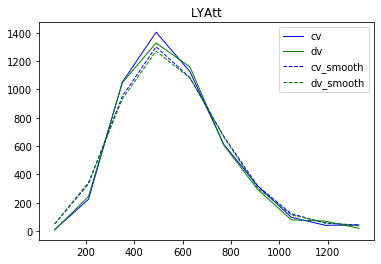

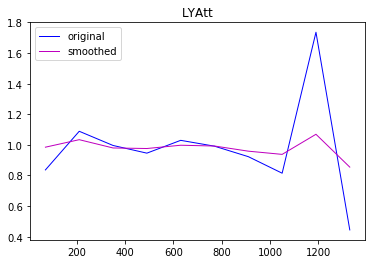

Q3_1e1p [2.23617127e-04 1.15832155e-03 4.03743203e-04 5.60635327e-04
 5.02522452e-06 5.49008963e-05 1.68283359e-03 3.84152247e-03
 4.81416304e-03 2.10813978e-02]
Q3_1e1p [ 4.02722607  7.22438273  6.14402989  6.57280866  7.59214625  7.30195339
  8.26352001  4.56632742 12.86864788  1.60442965]


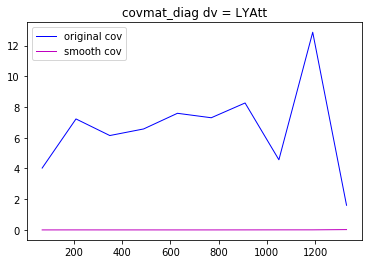

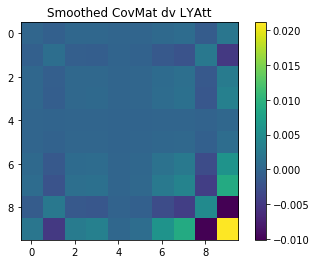

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[   9.27433685  223.76436285 1050.66443725 1403.49562867 1125.5372382
  612.00860122  319.38961383   96.75063522   40.15588535   42.63864594]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  685.747600    cv[1] = 492.283400  rat = 0.582113
bwid = 187.012477
!!!!!!!!!!!!!!!!!!!!
[   9.49604157  214.43602198 1116.59818461 1288.97056771 1092.17811814
  595.80457618  289.93835249   88.36257073   55.43873125   23.61126142]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


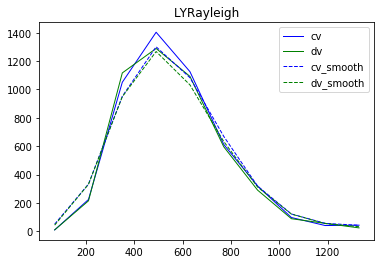

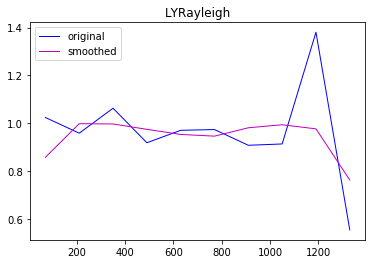

Q3_1e1p [2.03100737e-02 3.50334386e-06 9.35570051e-06 6.53194713e-04
 2.19279913e-03 2.91768552e-03 3.61490995e-04 3.98886992e-05
 5.51693539e-04 5.64399278e-02]
Q3_1e1p [0.64019853 0.63546876 0.63988556 0.65082551 0.65102022 0.66372437
 0.65394034 0.68080414 0.54128334 0.75588139]


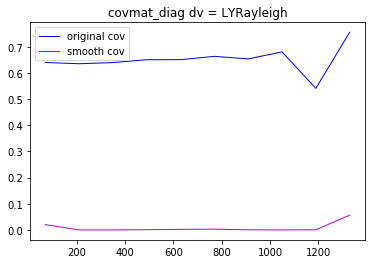

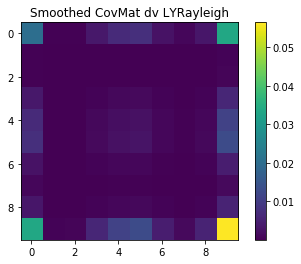

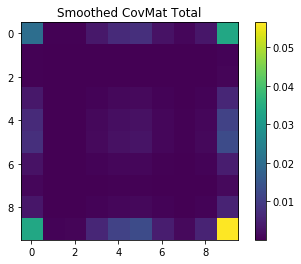

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[1.00000000e-06 4.77556064e+02 2.69897136e+03 1.34378979e+03
 3.70045222e+02 7.41680981e+01 1.85256235e+01 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  2.196200    cv[1] = 2.572800  rat = 0.460516
bwid = 0.837874
!!!!!!!!!!!!!!!!!!!!
[2.43338754e+00 4.10975306e+02 2.72349110e+03 1.33856135e+03
 3.97591923e+02 8.14099385e+01 1.19052298e+01 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


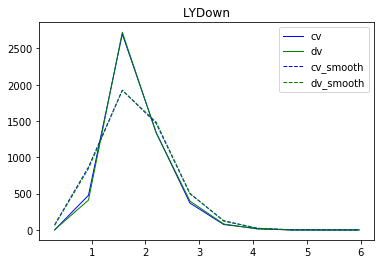

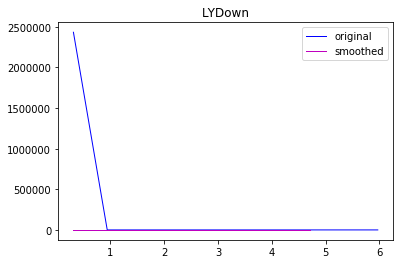

Thetas [1.58646068e-02 5.61638159e-04 3.32797696e-06 1.34786939e-04
 1.60548760e-04 2.32470494e-03 1.39434403e-04 7.92014335e-02
 0.00000000e+00 0.00000000e+00]
Thetas [0.00000000e+00 6.87738176e-03 2.12019293e-03 1.86927749e-04
 1.38266617e-05 6.51481184e-04 1.19214152e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


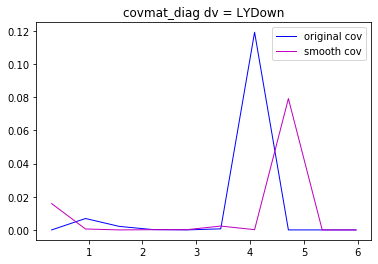

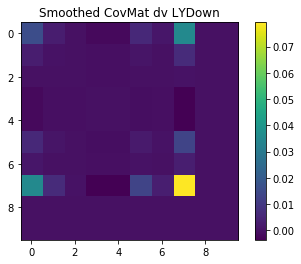

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[1.00000000e-06 4.77556064e+02 2.69897136e+03 1.34378979e+03
 3.70045222e+02 7.41680981e+01 1.85256235e+01 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  2.196200    cv[1] = 2.572800  rat = 0.460516
bwid = 0.837874
!!!!!!!!!!!!!!!!!!!!
[1.81223154e+01 4.28236696e+02 2.69246555e+03 1.31419946e+03
 3.25756999e+02 1.07953142e+02 1.38967375e+01 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


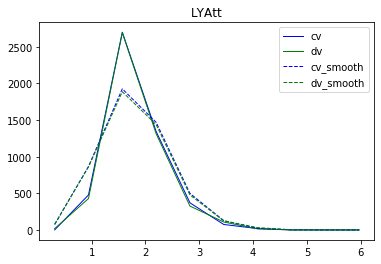

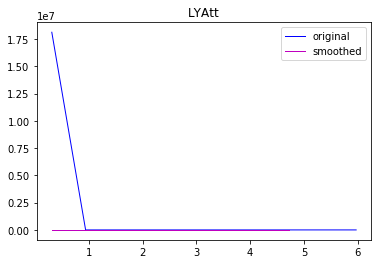

Thetas [1.12695527e-02 4.98602296e-05 4.10155540e-04 4.28099051e-04
 1.77020133e-03 3.97138445e-04 1.69067376e-01 1.58999610e-02
 0.00000000e+00 0.00000000e+00]
Thetas [0.         7.07354131 7.08719101 6.59697519 5.89791628 8.50204134
 3.36108434 0.         0.         0.        ]


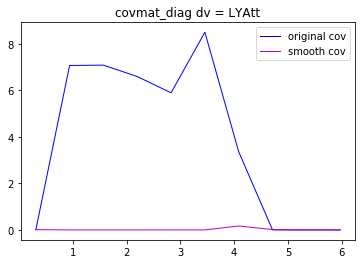

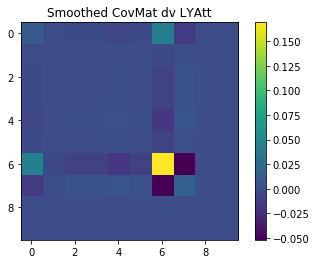

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[1.00000000e-06 4.77556064e+02 2.69897136e+03 1.34378979e+03
 3.70045222e+02 7.41680981e+01 1.85256235e+01 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  2.196200    cv[1] = 2.572800  rat = 0.460516
bwid = 0.837874
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 4.11073138e+02 2.64364006e+03 1.36448699e+03
 3.19232031e+02 7.22638525e+01 1.13549224e+01 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


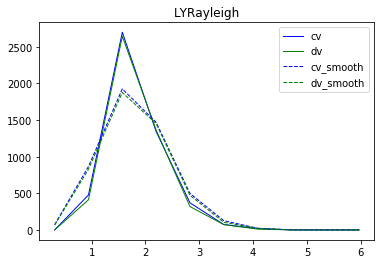

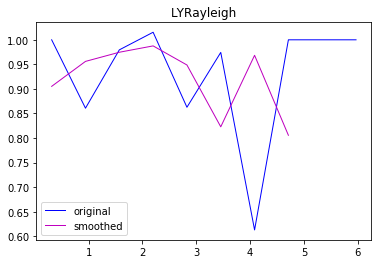

Thetas [0.00897991 0.00193111 0.00064218 0.00015363 0.00262785 0.03138078
 0.0009971  0.03778004 0.         0.        ]
Thetas [0.         0.67070922 0.65709574 0.63836701 0.64189667 0.64765853
 0.72643898 0.         0.         0.        ]


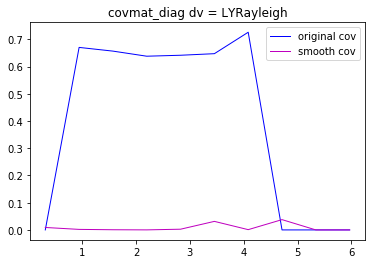

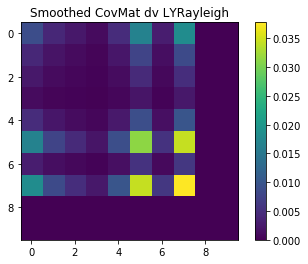

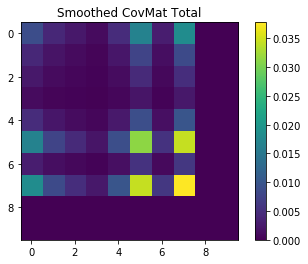

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[4.36395685e+01 5.72784974e+01 2.25671263e+02 5.18383728e+02
 2.37379969e+03 1.47484909e+03 2.49092199e+02 2.77104869e+01
 1.15617334e+01 1.06990359e+00]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  2.647300    cv[1] = 3.804700  rat = 0.410307
bwid = 0.837874
!!!!!!!!!!!!!!!!!!!!
[4.96517577e+01 6.76710942e+01 2.01139026e+02 5.78777383e+02
 2.34391618e+03 1.47649896e+03 2.08600637e+02 2.64968294e+01
 1.26165992e+01 9.99787624e-01]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


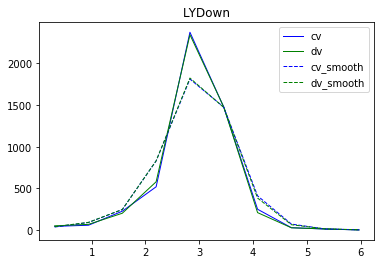

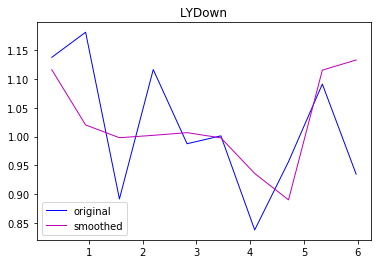

Phis [1.35010956e-02 4.06030753e-04 4.51046297e-06 4.22363398e-06
 4.48165026e-05 5.52121259e-06 4.13474713e-03 1.21519677e-02
 1.33357243e-02 1.77427417e-02]
Phis [0.01013295 0.0260254  0.00041421 0.0017839  0.00021509 0.0001943
 0.0104743  0.00119717 0.00073014 0.14936566]


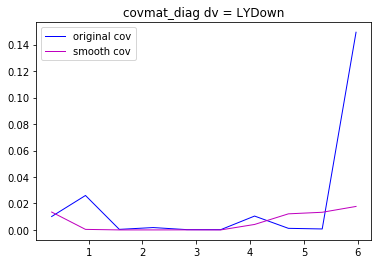

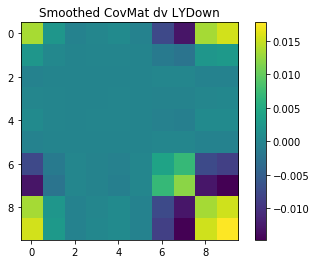

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[4.36395685e+01 5.72784974e+01 2.25671263e+02 5.18383728e+02
 2.37379969e+03 1.47484909e+03 2.49092199e+02 2.77104869e+01
 1.15617334e+01 1.06990359e+00]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  2.647300    cv[1] = 3.804700  rat = 0.410307
bwid = 0.837874
!!!!!!!!!!!!!!!!!!!!
[  48.67985398   71.03893044  180.86927052  546.07328864 2337.93959208
 1439.10607856  242.01687529   24.24808001    6.3377404     4.32119129]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


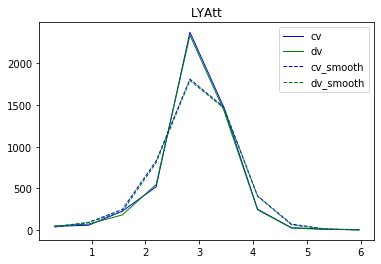

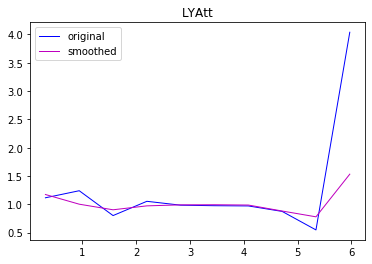

Phis [3.01167453e-02 5.95038715e-06 9.28315112e-03 7.30526044e-04
 8.86363923e-05 5.34831521e-05 1.56631724e-04 1.39483049e-02
 4.86970295e-02 2.83749182e-01]
Phis [ 5.82314147  6.39424498  7.40763606  7.93968365  6.41241155  6.96026129
  5.43586076  7.12800192  2.30587878 75.93833928]


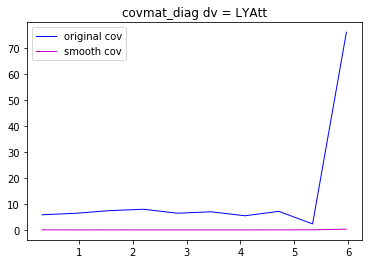

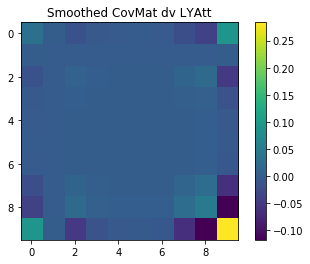

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[4.36395685e+01 5.72784974e+01 2.25671263e+02 5.18383728e+02
 2.37379969e+03 1.47484909e+03 2.49092199e+02 2.77104869e+01
 1.15617334e+01 1.06990359e+00]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  2.647300    cv[1] = 3.804700  rat = 0.410307
bwid = 0.837874
!!!!!!!!!!!!!!!!!!!!
[3.25675740e+01 6.29818906e+01 1.67171662e+02 5.30726830e+02
 2.28407635e+03 1.44734769e+03 2.58733676e+02 2.56777606e+01
 1.16254029e+01 1.14216452e+00]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


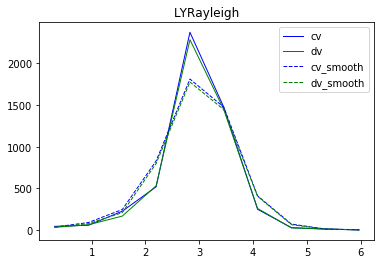

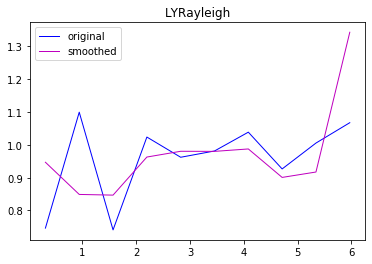

Phis [0.00281074 0.0228236  0.02345901 0.00137863 0.00038238 0.00039456
 0.00015514 0.00984098 0.00685051 0.11781525]
Phis [0.70334843 0.63474266 0.61905268 0.62597506 0.65487135 0.64849515
 0.65442394 0.66169949 0.64494583 0.51865016]


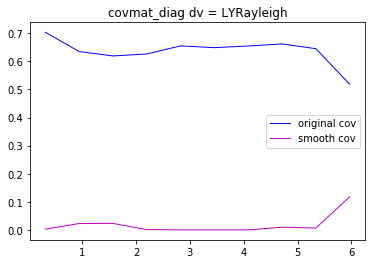

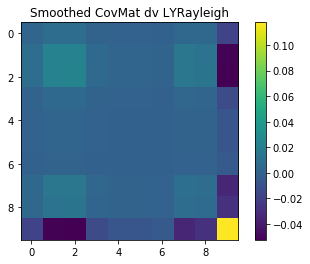

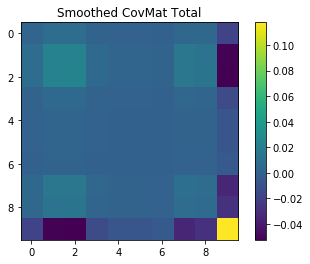

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[ 760.32390271 1264.40073443  883.73551228  638.62860828  404.16848439
  352.26414057  257.30752269  187.15747746  140.94693197   94.12284011]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.362900    cv[1] = 0.744200  rat = 0.327793
bwid = 0.133352
!!!!!!!!!!!!!!!!!!!!
[ 722.47080182 1248.7133884   937.54222694  671.61947687  414.90298951
  286.80328702  285.33115987  155.79583021  140.29840671  102.89067976]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


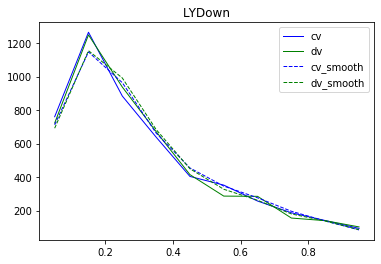

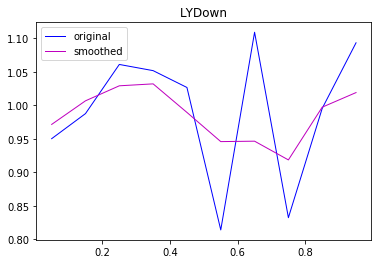

pTRat_1e1p [8.13273039e-04 4.43580599e-05 8.43747821e-04 1.01982358e-03
 1.13360819e-04 2.93234513e-03 2.86444579e-03 6.63330571e-03
 7.91040622e-06 3.59285003e-04]
pTRat_1e1p [2.88823579e-04 4.89203287e-04 4.88821051e-04 3.23338762e-03
 1.47664171e-05 1.31839816e-02 5.62184344e-03 1.79810814e-02
 3.12191946e-03 1.19182626e-02]


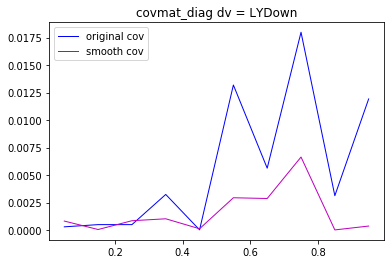

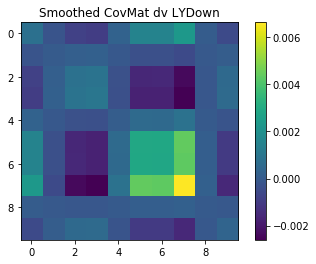

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[ 760.32390271 1264.40073443  883.73551228  638.62860828  404.16848439
  352.26414057  257.30752269  187.15747746  140.94693197   94.12284011]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.362900    cv[1] = 0.744200  rat = 0.327793
bwid = 0.133352
!!!!!!!!!!!!!!!!!!!!
[ 757.84825951 1237.73252176  943.21696682  594.70823206  390.96337674
  276.75660053  265.73605226  221.27288493  107.27279631  105.12321031]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


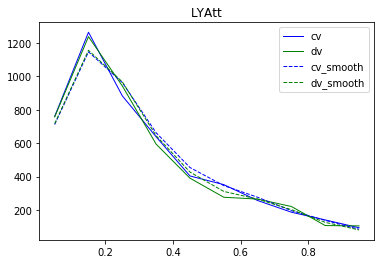

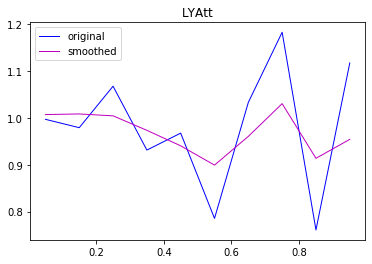

pTRat_1e1p [4.70297258e-05 6.67993933e-05 1.72291530e-05 7.12387401e-04
 3.57044805e-03 1.01699159e-02 1.56786334e-03 9.12118823e-04
 7.45242282e-03 2.11001704e-03]
pTRat_1e1p [ 6.74401956  6.74653915  6.92894421  6.81613236  6.71026331  5.15167172
  7.72920897 12.5819237   3.40362143  6.34868484]


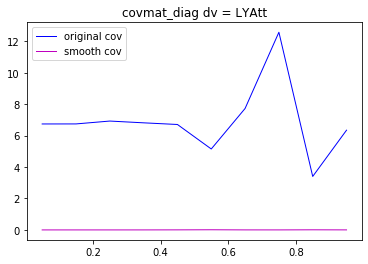

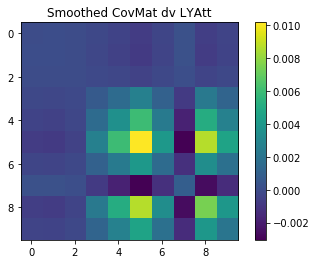

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[ 760.32390271 1264.40073443  883.73551228  638.62860828  404.16848439
  352.26414057  257.30752269  187.15747746  140.94693197   94.12284011]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.362900    cv[1] = 0.744200  rat = 0.327793
bwid = 0.133352
!!!!!!!!!!!!!!!!!!!!
[ 652.33997733 1318.98065641  869.91871869  662.71980672  453.48991254
  303.83174306  215.57599829  137.76183676  112.42171893   95.01062783]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


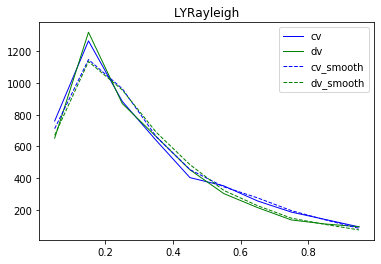

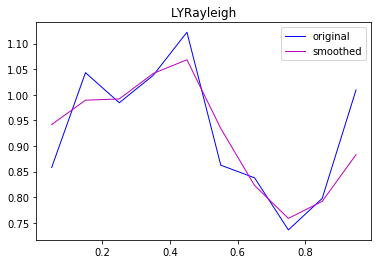

pTRat_1e1p [3.38921684e-03 1.12898270e-04 6.75581094e-05 1.71636736e-03
 4.67096521e-03 4.33182659e-03 3.13835246e-02 5.82911365e-02
 4.33328899e-02 1.36887820e-02]
pTRat_1e1p [0.681058   0.64806405 0.64813426 0.63674318 0.63832168 0.65775101
 0.61831393 0.60898161 0.70129611 0.64856966]


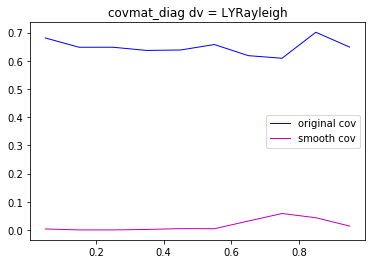

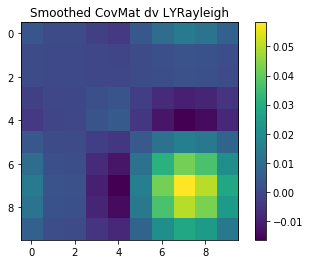

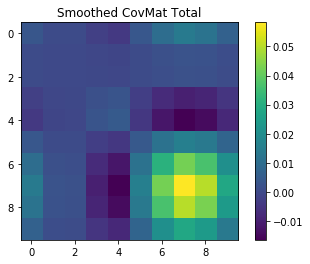

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[2.34450337e+02 1.15235799e+03 1.65210576e+03 1.34556856e+03
 5.98573494e+02 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.705000    cv[1] = 1.180600  rat = 0.373886
bwid = 0.418937
!!!!!!!!!!!!!!!!!!!!
[2.34409895e+02 1.11375168e+03 1.70029681e+03 1.28005368e+03
 6.37856180e+02 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


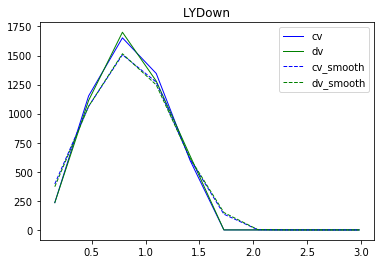

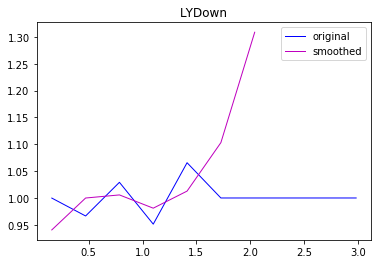

Proton_ThetaReco [3.53374738e-03 4.41875235e-09 3.24279402e-05 3.60237559e-04
 1.63952384e-04 1.06150321e-02 9.51695536e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Proton_ThetaReco [2.11153268e-03 2.27509232e-05 2.20415357e-03 1.61781662e-05
 6.10743510e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


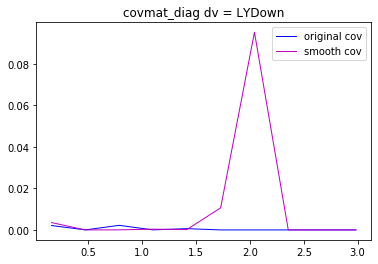

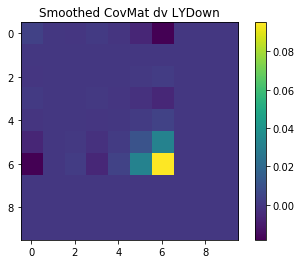

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[2.34450337e+02 1.15235799e+03 1.65210576e+03 1.34556856e+03
 5.98573494e+02 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.705000    cv[1] = 1.180600  rat = 0.373886
bwid = 0.418937
!!!!!!!!!!!!!!!!!!!!
[2.25930216e+02 1.09406040e+03 1.66280065e+03 1.29621723e+03
 6.21622388e+02 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


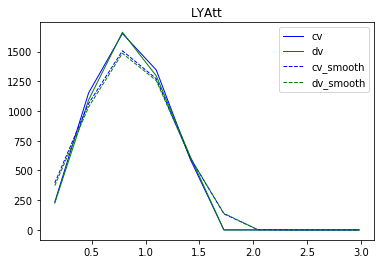

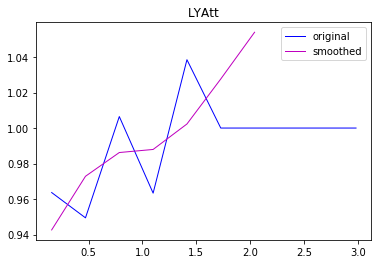

Proton_ThetaReco [3.29428946e-03 7.38389206e-04 1.90254333e-04 1.45498077e-04
 5.22659395e-06 7.64176842e-04 2.91375108e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Proton_ThetaReco [6.89733928 6.11108588 6.98819271 7.11465659 6.89678051 0.
 0.         0.         0.         0.        ]


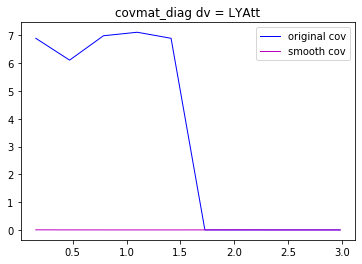

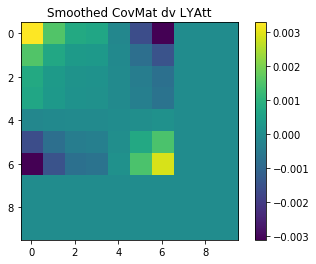

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[2.34450337e+02 1.15235799e+03 1.65210576e+03 1.34556856e+03
 5.98573494e+02 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.705000    cv[1] = 1.180600  rat = 0.373886
bwid = 0.418937
!!!!!!!!!!!!!!!!!!!!
[2.31368767e+02 1.05989990e+03 1.60140998e+03 1.27768056e+03
 6.51691785e+02 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


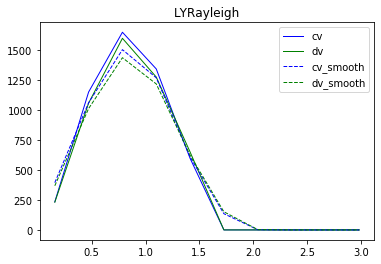

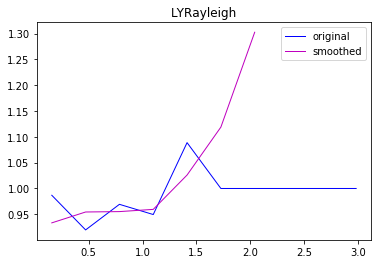

Proton_ThetaReco [0.00443354 0.00207301 0.00200393 0.00163772 0.00067713 0.01412313
 0.09150079 0.         0.         0.        ]
Proton_ThetaReco [0.63100411 0.64849973 0.64668616 0.66326283 0.63247526 0.
 0.         0.         0.         0.        ]


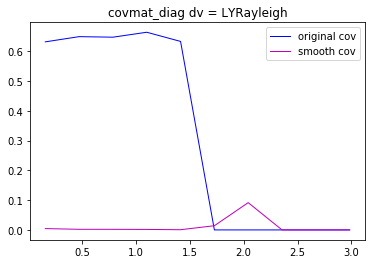

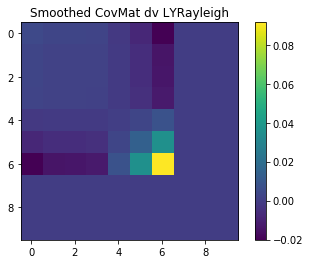

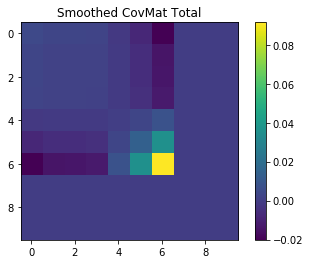

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[586.90551641 468.68661594 205.6030593  567.63253697 713.99077723
 633.82588538 520.4374296  201.81242376 503.12447559 581.03743473]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  -2.396500    cv[1] = 1.433400  rat = 2.488319
bwid = 0.837874
!!!!!!!!!!!!!!!!!!!!
[527.94790973 553.40768384 230.01628313 541.40635968 644.10506939
 652.12961155 485.56049692 254.19599909 530.72957954 546.86925425]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


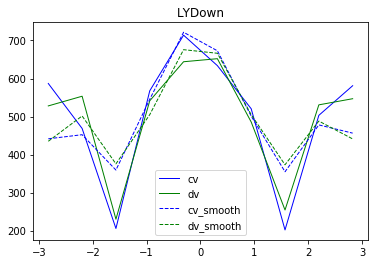

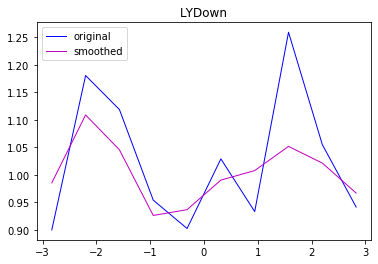

Proton_PhiReco [2.18109104e-04 1.18705847e-02 2.06157097e-03 5.49778657e-03
 4.03723802e-03 9.40365187e-05 5.79588587e-05 2.67221572e-03
 4.50068537e-04 1.11305620e-03]
Proton_PhiReco [6.70462982e-04 1.87196792e-03 2.99391459e-04 5.34213965e-04
 6.85798943e-06 1.52507866e-04 6.47683145e-05 4.23518078e-03
 7.61478114e-04 5.73292868e-03]


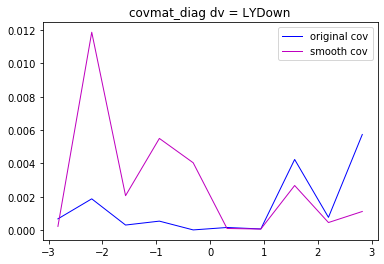

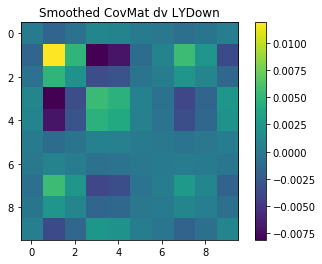

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[586.90551641 468.68661594 205.6030593  567.63253697 713.99077723
 633.82588538 520.4374296  201.81242376 503.12447559 581.03743473]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  -2.396500    cv[1] = 1.433400  rat = 2.488319
bwid = 0.837874
!!!!!!!!!!!!!!!!!!!!
[496.00911741 490.34306742 233.86139576 564.06533817 668.87511678
 688.70939033 491.76413881 203.15510365 541.77496001 522.07327288]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


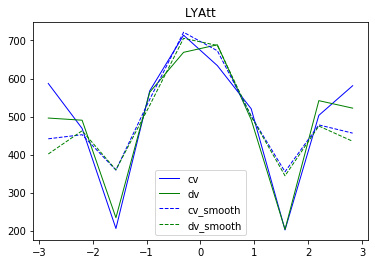

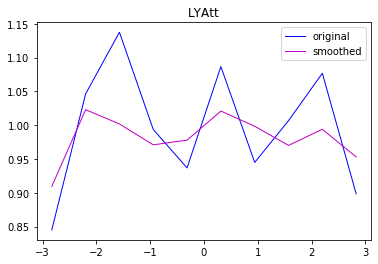

Proton_PhiReco [8.19464450e-03 5.25696809e-04 3.36398480e-06 8.44824154e-04
 4.88583107e-04 4.35961464e-04 2.58953952e-06 8.95036269e-04
 3.69415237e-05 2.20128679e-03]
Proton_PhiReco [6.34370127 6.19931139 7.84275242 6.67385492 6.48129599 6.71561078
 6.56330899 7.0172626  7.14088691 7.25776756]


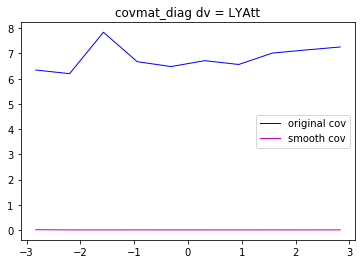

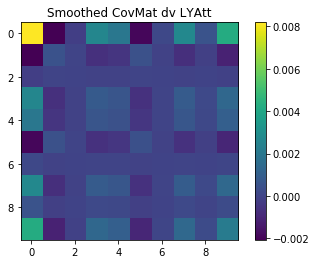

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[586.90551641 468.68661594 205.6030593  567.63253697 713.99077723
 633.82588538 520.4374296  201.81242376 503.12447559 581.03743473]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  -2.396500    cv[1] = 1.433400  rat = 2.488319
bwid = 0.837874
!!!!!!!!!!!!!!!!!!!!
[542.65605141 534.76044093 218.36046515 530.25321489 679.76240268
 543.63645116 502.84586894 249.96534627 498.36958264 521.44117251]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


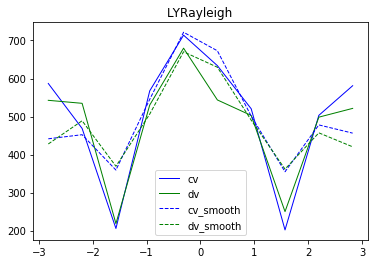

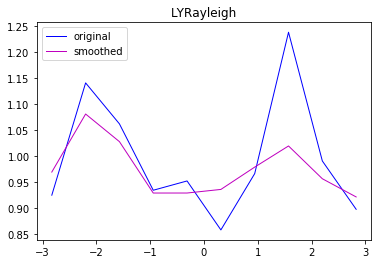

Proton_PhiReco [0.00094936 0.00656775 0.00077325 0.00507209 0.00506956 0.004131
 0.00045189 0.00037906 0.00190839 0.00620339]
Proton_PhiReco [0.6539041  0.64472271 0.64266993 0.64739381 0.64487705 0.65689081
 0.65358188 0.62075686 0.65156543 0.64695642]


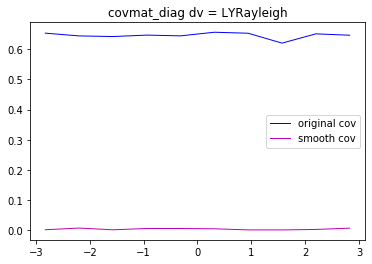

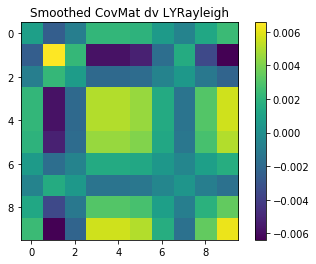

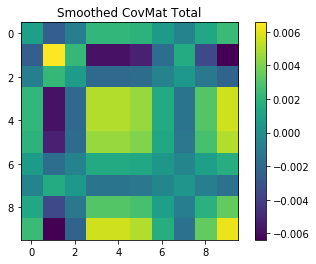

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[1.68114228e+02 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 4.74714780e+03 1.69493171e+01 4.70901310e+00
 1.55302843e+01 3.06055133e+01]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.000000    cv[1] = 0.000000  rat = nan
bwid = 0.266704
!!!!!!!!!!!!!!!!!!!!
[1.98817843e+02 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 4.70886991e+03 1.35374103e+01 7.05088722e+00
 9.93775367e+00 2.81544355e+01]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


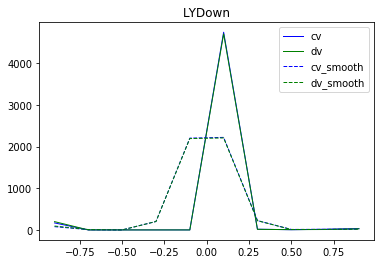

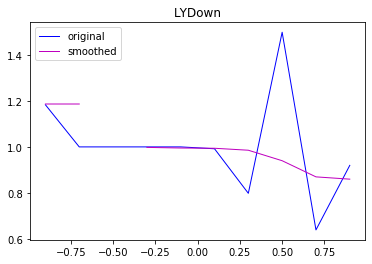

MinShrFrac [3.46160715e-02 3.46160715e-02 0.00000000e+00 4.65198949e-06
 2.32085858e-05 3.52965390e-05 2.08564077e-04 3.59346012e-03
 1.69041849e-02 1.95826488e-02]
MinShrFrac [0.00052271 0.         0.         0.         0.         0.00022965
 0.00572761 0.02414878 0.09410215 0.01385223]


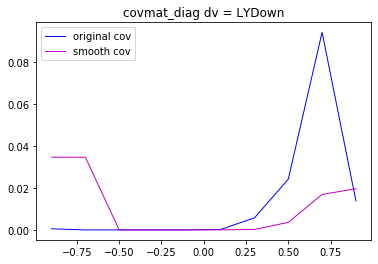

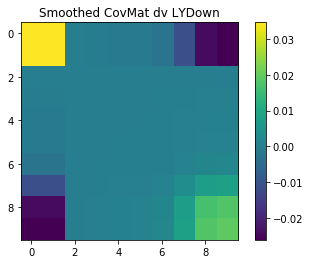

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[1.68114228e+02 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 4.74714780e+03 1.69493171e+01 4.70901310e+00
 1.55302843e+01 3.06055133e+01]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.000000    cv[1] = 0.000000  rat = nan
bwid = 0.266704
!!!!!!!!!!!!!!!!!!!!
[1.82673010e+02 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 4.66478384e+03 6.74337289e+00 6.10463547e+00
 1.28127149e+01 2.75133229e+01]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


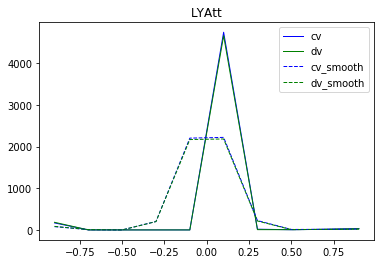

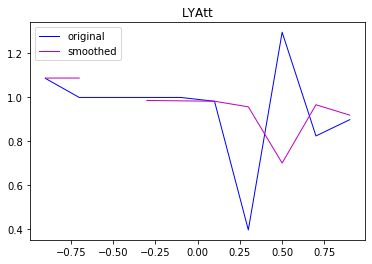

MinShrFrac [0.00777194 0.00777194 0.         0.00018615 0.00024033 0.00029468
 0.00182482 0.08890175 0.00109976 0.00648515]
MinShrFrac [5.54005836 0.         0.         0.         0.         6.80943928
 0.38321479 5.00903295 3.36108434 7.18049303]


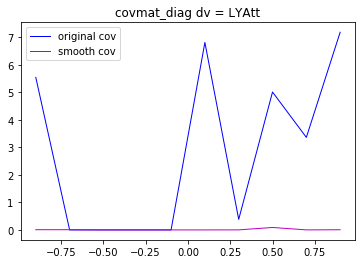

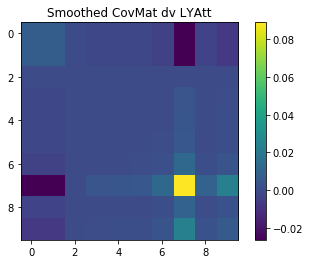

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[1.68114228e+02 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 4.74714780e+03 1.69493171e+01 4.70901310e+00
 1.55302843e+01 3.06055133e+01]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.000000    cv[1] = 0.000000  rat = nan
bwid = 0.266704
!!!!!!!!!!!!!!!!!!!!
[1.92640070e+02 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 4.57738485e+03 5.72366930e+00 5.31730550e+00
 1.15042932e+01 2.94807997e+01]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


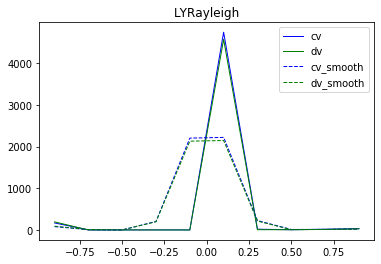

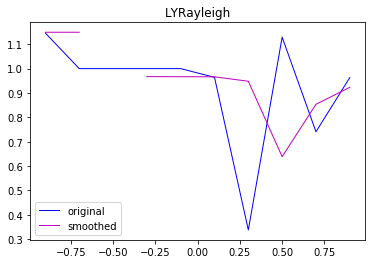

MinShrFrac [0.02231589 0.02231589 0.         0.00107903 0.00110537 0.00113367
 0.00268399 0.13075617 0.02146009 0.00589228]
MinShrFrac [0.65305649 0.         0.         0.         0.         0.64767831
 0.73974939 0.58799975 0.70018067 0.66169949]


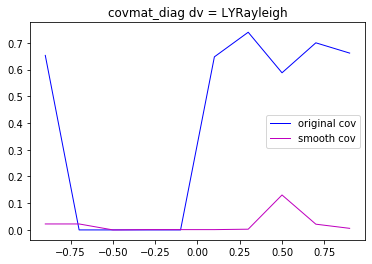

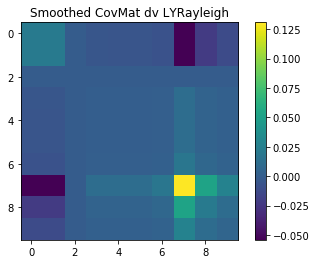

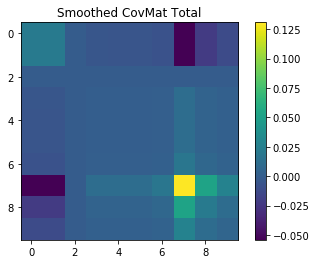

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 7.35107802e-01 6.06365275e+01 1.41142075e+02
 4.88265848e+02 4.29227659e+03]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.951200    cv[1] = 0.945900  rat = 0.501397
bwid = 0.266704
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 7.57797319e+01 1.66262489e+02
 5.25230122e+02 4.19909590e+03]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


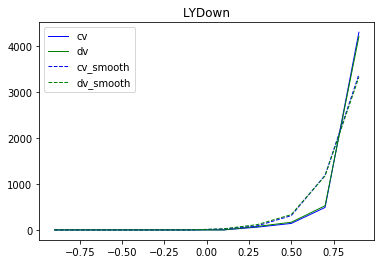

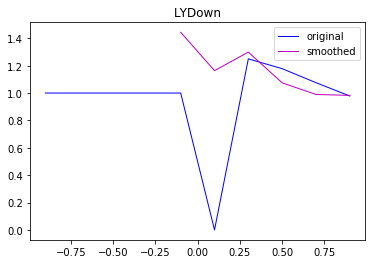

MaxShrFrac [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.97295211e-01 2.67472555e-02 8.94916382e-02 5.57208286e-03
 1.07239676e-04 2.93008819e-04]
MaxShrFrac [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 1.78108703e-01 4.21630489e-03
 5.11588104e-03 4.19996710e-05]


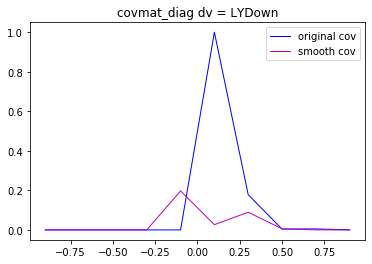

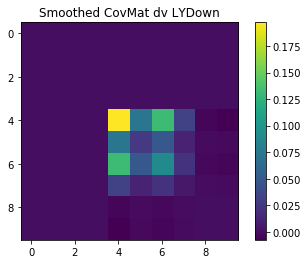

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 7.35107802e-01 6.06365275e+01 1.41142075e+02
 4.88265848e+02 4.29227659e+03]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.951200    cv[1] = 0.945900  rat = 0.501397
bwid = 0.266704
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 6.53485480e-01 5.63083727e+01 1.35639679e+02
 4.07829995e+02 4.30019936e+03]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


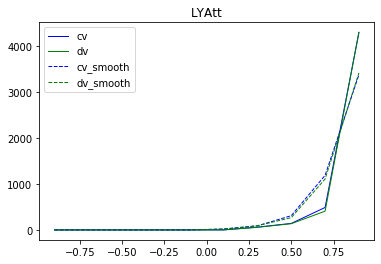

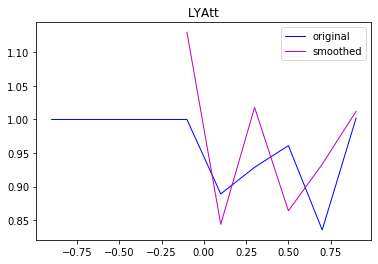

MaxShrFrac [0.         0.         0.         0.         0.01692621 0.02444848
 0.00032233 0.01857456 0.00446008 0.00014516]
MaxShrFrac [ 0.          0.          0.          0.          0.          5.00903295
 12.13480661  5.17898831  5.56023964  6.83511404]


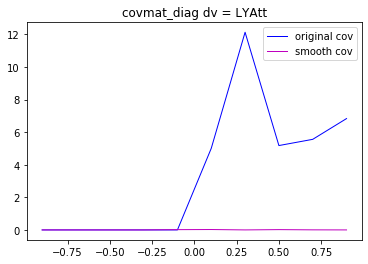

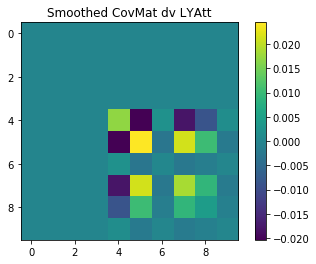

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 7.35107802e-01 6.06365275e+01 1.41142075e+02
 4.88265848e+02 4.29227659e+03]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.951200    cv[1] = 0.945900  rat = 0.501397
bwid = 0.266704
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 6.80677141e-01 4.47839734e+01 1.83945358e+02
 5.11440239e+02 4.08120074e+03]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


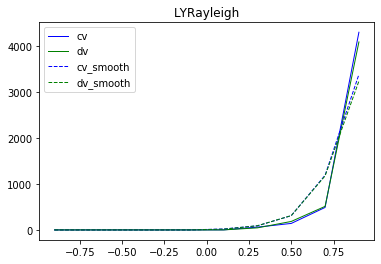

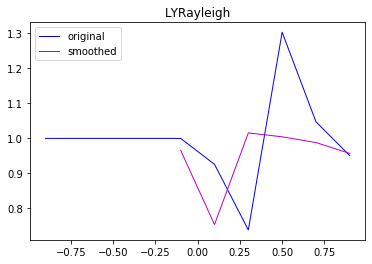

MaxShrFrac [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.17825438e-03 6.05917650e-02 2.47905286e-04 2.08613072e-05
 1.40968933e-04 1.83560510e-03]
MaxShrFrac [0.         0.         0.         0.         0.         0.66169949
 0.69718197 0.65115465 0.65385438 0.64728742]


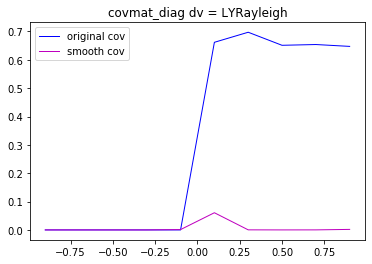

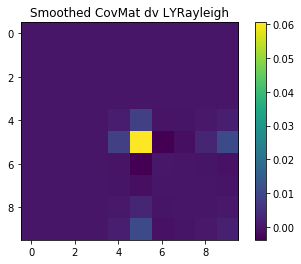

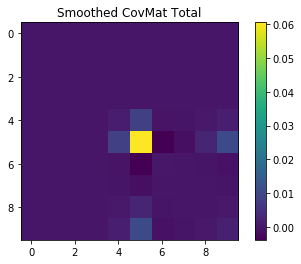

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[ 164.80863445  652.99428598 1097.25409332 1090.17840187  719.18690406
  438.88580555  194.22075476  168.12199419   95.4014566    45.52069617]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  1.623500    cv[1] = 2.109300  rat = 0.434928
bwid = 0.403823
!!!!!!!!!!!!!!!!!!!!
[ 126.66183677  586.52221352 1153.75241419 1118.85168865  750.48703195
  413.43926238  224.67305587  129.87128866   83.47337602   57.75720031]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


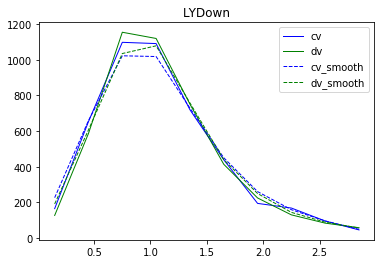

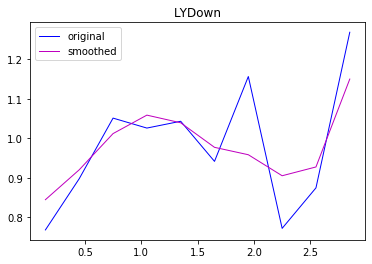

BjXB_1e1p [0.02401032 0.00628357 0.00015209 0.00348708 0.00157424 0.0005044
 0.00169773 0.00890644 0.00520055 0.02259278]
BjXB_1e1p [2.01168094e-04 4.37050924e-05 1.79490013e-04 9.71549900e-07
 5.91818116e-04 4.38595967e-05 3.17696804e-03 3.46628627e-03
 9.92432535e-03 5.87839677e-04]


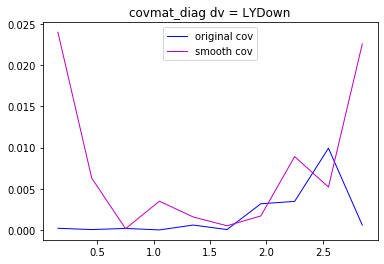

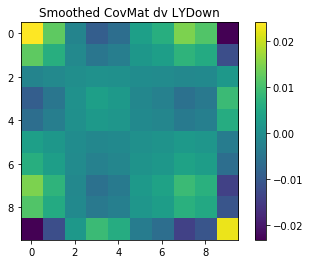

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[ 164.80863445  652.99428598 1097.25409332 1090.17840187  719.18690406
  438.88580555  194.22075476  168.12199419   95.4014566    45.52069617]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  1.623500    cv[1] = 2.109300  rat = 0.434928
bwid = 0.403823
!!!!!!!!!!!!!!!!!!!!
[ 159.33808453  658.01022534 1052.3877435  1024.65626936  795.98738108
  444.42433979  200.18952749  129.71156452   88.45334649   45.79666171]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


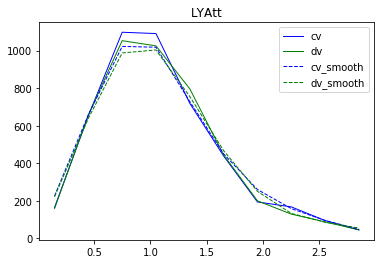

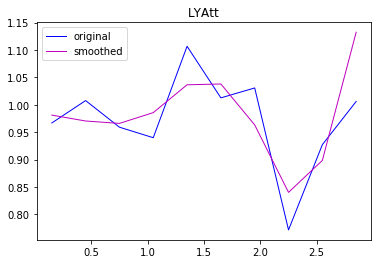

BjXB_1e1p [0.0003547  0.00087685 0.0011536  0.0002052  0.00133167 0.00144168
 0.00134936 0.02557589 0.01032535 0.01754206]
BjXB_1e1p [9.56406372 7.17875949 6.13414898 6.18891237 7.37577289 6.66861544
 6.88313754 4.87813368 7.81972846 5.40842818]


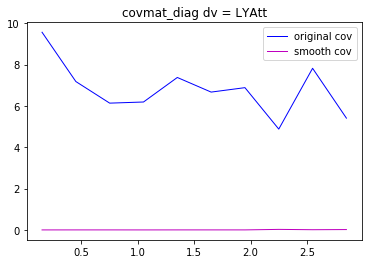

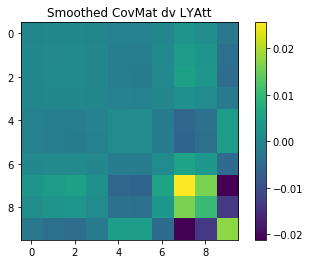

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[ 164.80863445  652.99428598 1097.25409332 1090.17840187  719.18690406
  438.88580555  194.22075476  168.12199419   95.4014566    45.52069617]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  1.623500    cv[1] = 2.109300  rat = 0.434928
bwid = 0.403823
!!!!!!!!!!!!!!!!!!!!
[ 106.49241152  617.02859816 1091.92421154 1103.27720349  711.94106712
  404.05101561  214.98519035  134.46255076  123.26654615   60.24831411]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


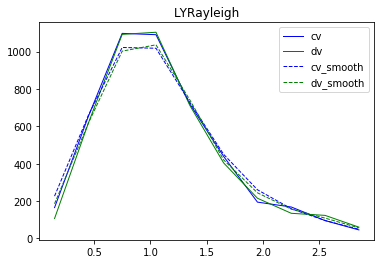

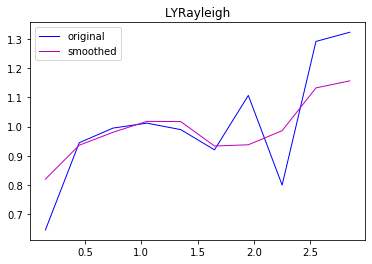

BjXB_1e1p [0.03234372 0.00404542 0.00036902 0.00032728 0.00030589 0.00440488
 0.0038585  0.00018856 0.01763747 0.02461369]
BjXB_1e1p [0.65749094 0.64249695 0.65278304 0.65251316 0.64243769 0.64609436
 0.62782029 0.66169949 0.64093403 0.64539581]


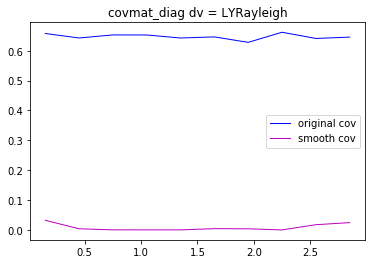

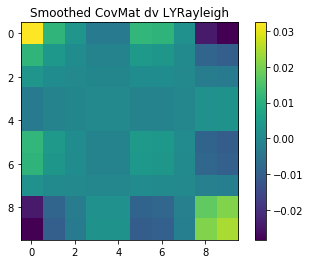

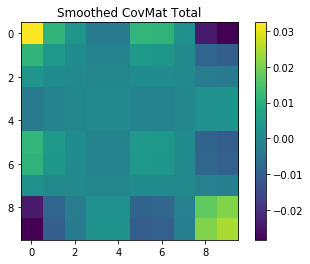

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[3.54083204e+02 1.35685334e+03 1.63383788e+03 9.78957061e+02
 3.94663251e+02 1.17763125e+02 1.85446928e+01 1.72451015e+00
 8.54306816e-01 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.359900    cv[1] = 0.258800  rat = 0.581704
bwid = 0.133840
!!!!!!!!!!!!!!!!!!!!
[3.94670362e+02 1.31115480e+03 1.64223066e+03 9.72915565e+02
 3.87236296e+02 1.25019875e+02 1.70450648e+01 8.12999496e-01
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


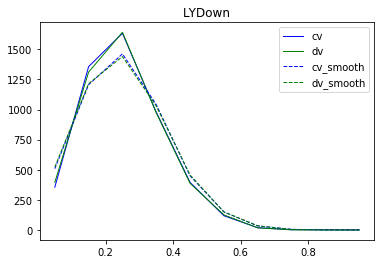

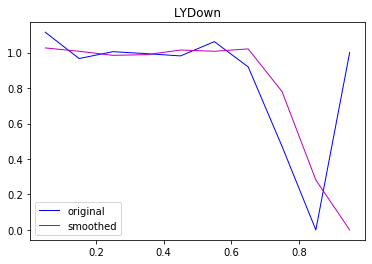

BjYB_1e1p [6.87407897e-04 5.39609620e-05 2.44184728e-04 1.37097496e-04
 2.08261988e-04 5.40279886e-05 4.30118437e-04 4.82125333e-02
 5.16027248e-01 1.00000000e+00]
BjYB_1e1p [2.48001331e-02 1.44850390e-03 3.93203477e-04 3.22582251e-06
 1.78870006e-03 6.68229430e-05 1.61043649e-03 2.89272390e-01
 1.00000000e+00 0.00000000e+00]


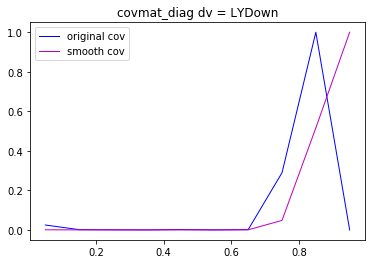

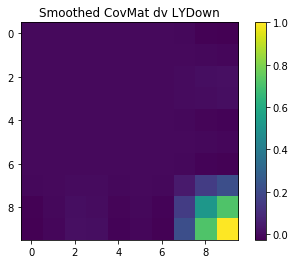

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[3.54083204e+02 1.35685334e+03 1.63383788e+03 9.78957061e+02
 3.94663251e+02 1.17763125e+02 1.85446928e+01 1.72451015e+00
 8.54306816e-01 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.359900    cv[1] = 0.258800  rat = 0.581704
bwid = 0.133840
!!!!!!!!!!!!!!!!!!!!
[4.14269359e+02 1.28913973e+03 1.59386708e+03 9.43662485e+02
 4.35459727e+02 1.03964321e+02 1.46339614e+01 9.34550613e-01
 7.59449273e-01 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


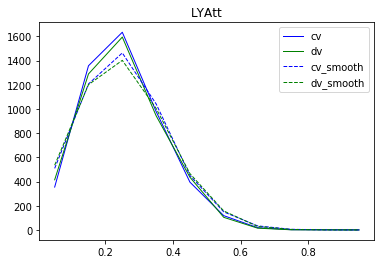

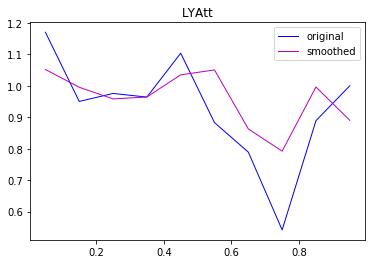

BjYB_1e1p [2.66296988e-03 2.30177077e-05 1.75303272e-03 1.27633834e-03
 1.19726939e-03 2.52384639e-03 1.88514746e-02 4.31927835e-02
 1.58532475e-05 1.20834101e-02]
BjYB_1e1p [10.8127672   6.97798093  6.19872074  6.94716061  6.92781698  5.76869315
  5.00903295  5.00903295  5.00903295  0.        ]


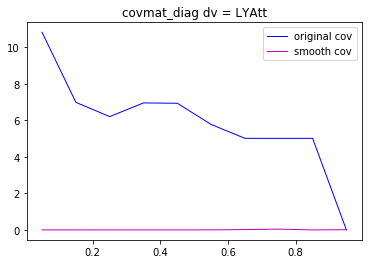

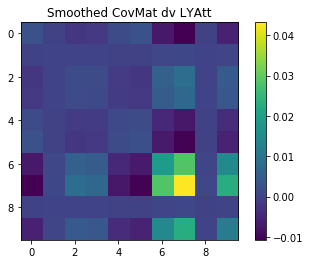

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[3.54083204e+02 1.35685334e+03 1.63383788e+03 9.78957061e+02
 3.94663251e+02 1.17763125e+02 1.85446928e+01 1.72451015e+00
 8.54306816e-01 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.359900    cv[1] = 0.258800  rat = 0.581704
bwid = 0.133840
!!!!!!!!!!!!!!!!!!!!
[3.56160512e+02 1.34089810e+03 1.49128163e+03 1.00179521e+03
 3.69235140e+02 1.19570788e+02 1.49516738e+01 2.55293803e+00
 7.91050116e-01 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


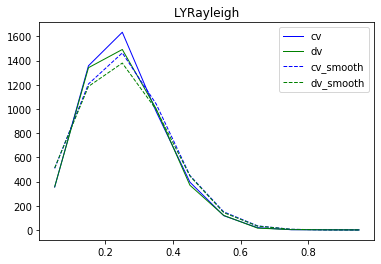

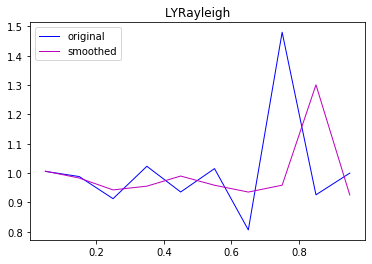

BjYB_1e1p [4.31166645e-05 2.83448865e-04 3.28444303e-03 1.98373879e-03
 1.00194376e-04 1.71559800e-03 4.17866051e-03 1.70410874e-03
 9.06703733e-02 5.55328713e-03]
BjYB_1e1p [0.6426983  0.6640653  0.65291672 0.63505471 0.64678265 0.64812937
 0.65007792 0.39300143 0.66169949 0.        ]


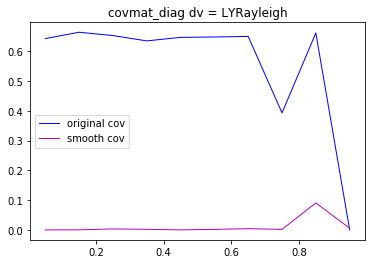

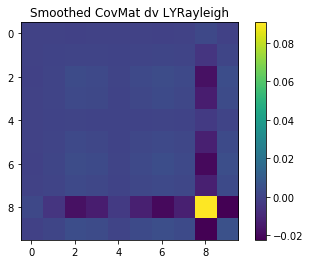

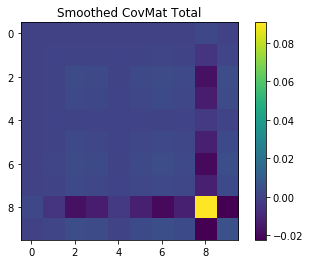

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[1492.97915225 1083.0908884   745.95478878  597.75770944  367.83671556
  264.7104594   172.96430247  124.54195941   43.48744703   44.65805503]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  224.282300    cv[1] = 111.557100  rat = 0.667826
bwid = 58.751001
!!!!!!!!!!!!!!!!!!!!
[1482.23482745 1100.0125364   716.36071493  604.78360913  409.35751356
  214.02649768  201.59757836  116.81146178   66.99871608   31.40077117]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


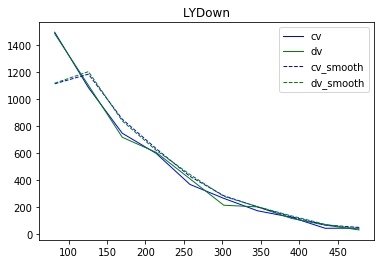

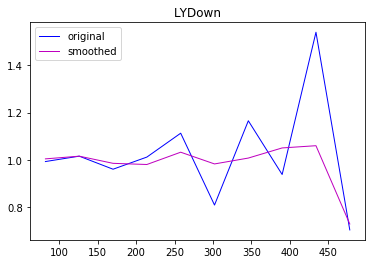

Proton_Edep [1.70986765e-05 2.43748453e-04 2.17698414e-04 3.87973907e-04
 1.04960982e-03 3.00211985e-04 5.77122412e-05 2.54721313e-03
 3.59238307e-03 7.38301623e-02]
Proton_Edep [4.46602246e-04 2.20834468e-04 3.07219053e-04 3.80908661e-03
 1.05630414e-02 6.84548886e-04 1.43036078e-02 3.84196169e-03
 4.56068220e-01 2.15450844e-02]


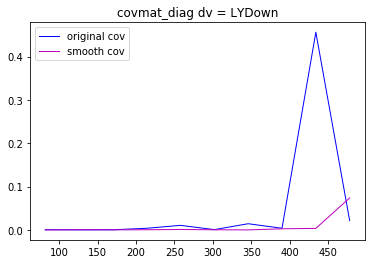

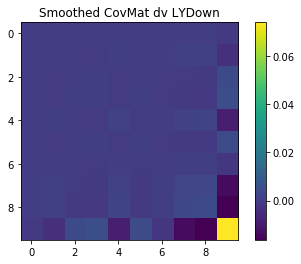

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[1492.97915225 1083.0908884   745.95478878  597.75770944  367.83671556
  264.7104594   172.96430247  124.54195941   43.48744703   44.65805503]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  224.282300    cv[1] = 111.557100  rat = 0.667826
bwid = 58.751001
!!!!!!!!!!!!!!!!!!!!
[1488.10170512 1072.03712302  766.20232714  546.54583695  348.60117719
  255.74560671  175.93370346  105.89513126   42.19449246   36.76485694]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


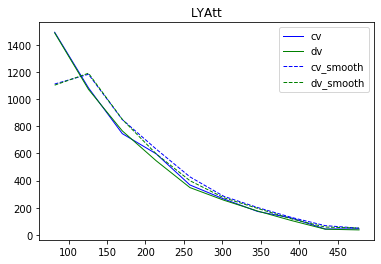

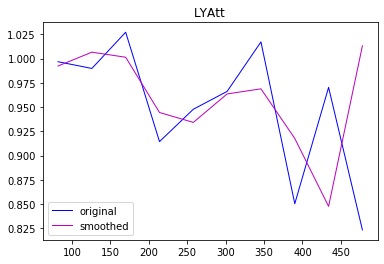

Proton_Edep [5.88709620e-05 4.34147338e-05 1.84561359e-06 3.09429650e-03
 4.33676248e-03 1.33083924e-03 9.73994879e-04 6.78861086e-03
 2.32358475e-02 1.71328375e-04]
Proton_Edep [6.17959062 6.78118516 7.55309607 6.92694116 8.01570375 7.76962779
 7.50629762 6.31853063 8.09532344 6.18601711]


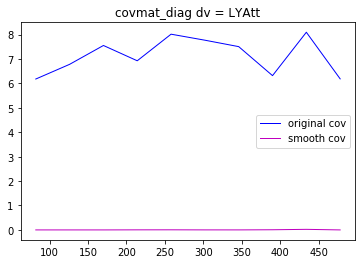

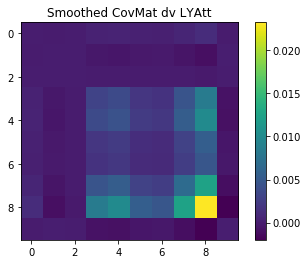

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[1492.97915225 1083.0908884   745.95478878  597.75770944  367.83671556
  264.7104594   172.96430247  124.54195941   43.48744703   44.65805503]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  224.282300    cv[1] = 111.557100  rat = 0.667826
bwid = 58.751001
!!!!!!!!!!!!!!!!!!!!
[1505.40638369 1104.11517918  730.91979461  517.39048637  335.25344187
  225.59959626  173.06272391  107.26362677   51.01531612   23.65571572]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


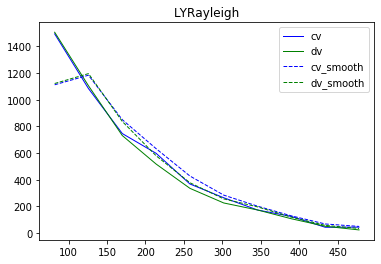

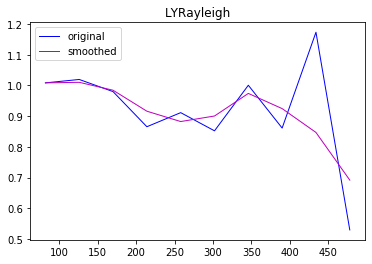

Proton_Edep [7.13768692e-05 1.02475405e-04 2.44296097e-04 7.03907105e-03
 1.38158254e-02 9.90900391e-03 6.77073724e-04 5.69766660e-03
 2.34164448e-02 9.49608139e-02]
Proton_Edep [0.6439099  0.64417557 0.64208139 0.65965041 0.67074502 0.65629096
 0.65743176 0.70767347 0.60601686 0.80918936]


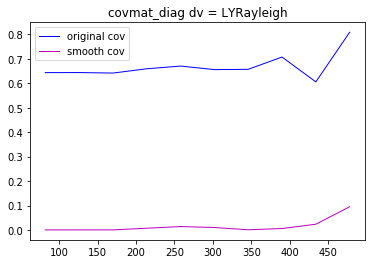

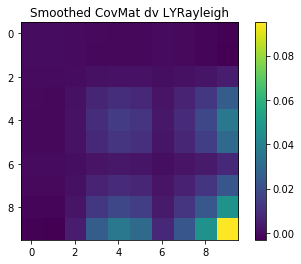

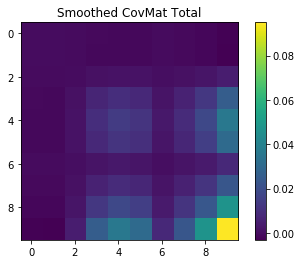

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[ 67.14140242 523.37341537 701.60245858 757.85481534 639.96292512
 578.84614756 415.86397413 347.31411223 207.58919736 255.4314229 ]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  444.575000    cv[1] = 465.425700  rat = 0.488544
bwid = 157.659516
!!!!!!!!!!!!!!!!!!!!
[ 61.05352871 524.50107876 741.7769365  658.09599747 635.4898598
 571.50853203 392.26888875 373.09797476 306.31570941 234.74137645]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


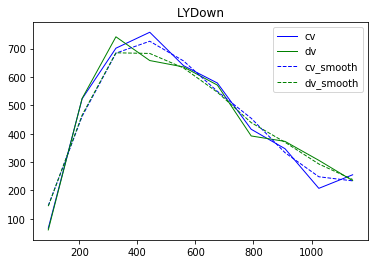

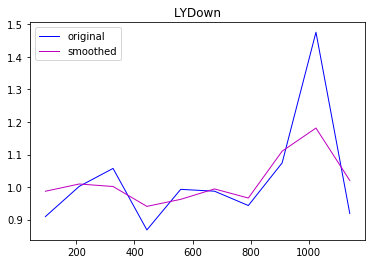

Electron_Edep [1.65561322e-04 8.93171066e-05 2.89608292e-06 3.51832602e-03
 1.42145326e-03 3.27427595e-05 1.13728780e-03 1.21569848e-02
 3.28648160e-02 4.11948350e-04]
Electron_Edep [6.29394871e-03 1.46400943e-03 2.33946391e-04 1.58417365e-03
 6.86564380e-03 1.07741175e-02 3.46231927e-02 1.31377444e-02
 1.32313611e-01 3.45342540e-05]


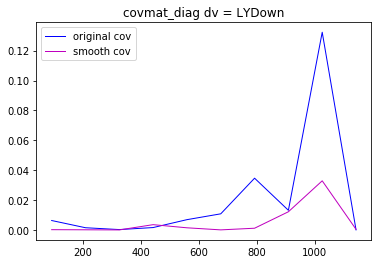

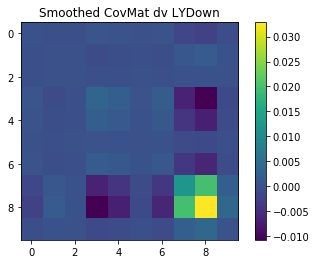

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[ 67.14140242 523.37341537 701.60245858 757.85481534 639.96292512
 578.84614756 415.86397413 347.31411223 207.58919736 255.4314229 ]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  444.575000    cv[1] = 465.425700  rat = 0.488544
bwid = 157.659516
!!!!!!!!!!!!!!!!!!!!
[ 64.91046874 514.06910929 703.8953238  695.38781282 603.43015169
 572.79219693 389.23844335 361.167569   256.70303687 241.30837744]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


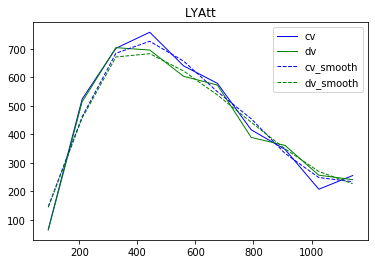

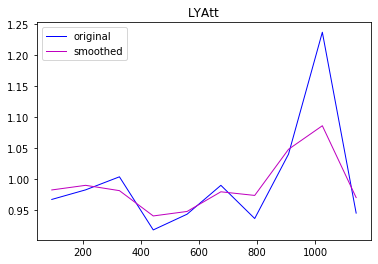

Electron_Edep [0.00032106 0.00010964 0.00036257 0.00358605 0.00276921 0.00043679
 0.00071617 0.00227304 0.00734498 0.00091558]
Electron_Edep [ 6.09331757  5.8803982   6.73423964  6.04936506  7.17283672  8.4000233
  9.07087342  8.43758327 11.60030135  6.61219757]


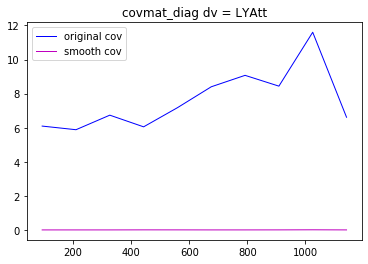

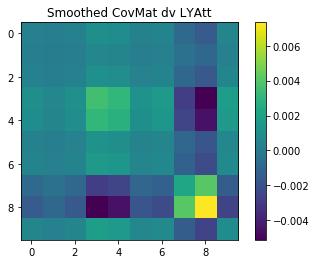

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[ 67.14140242 523.37341537 701.60245858 757.85481534 639.96292512
 578.84614756 415.86397413 347.31411223 207.58919736 255.4314229 ]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  444.575000    cv[1] = 465.425700  rat = 0.488544
bwid = 157.659516
!!!!!!!!!!!!!!!!!!!!
[ 59.15815874 505.79089593 715.49915188 681.97948134 598.96477503
 630.03763335 354.03371083 331.6989358  240.37764435 224.67176189]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


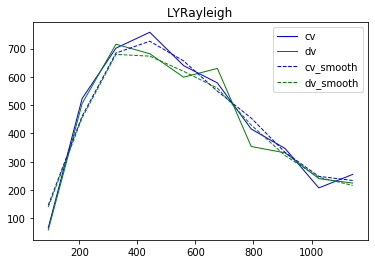

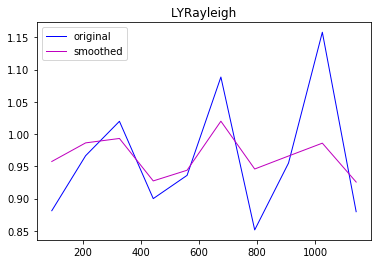

Electron_Edep [1.80881876e-03 1.87133712e-04 4.65332841e-05 5.28222005e-03
 3.14834370e-03 3.98721202e-04 2.93667124e-03 1.15795715e-03
 1.99093468e-04 5.54069038e-03]
Electron_Edep [0.63910333 0.642754   0.63489271 0.66113861 0.64413801 0.63256158
 0.68336059 0.70094607 0.64194754 0.72565978]


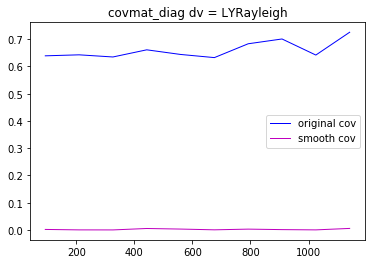

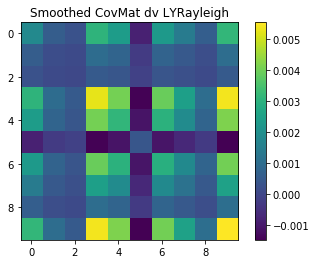

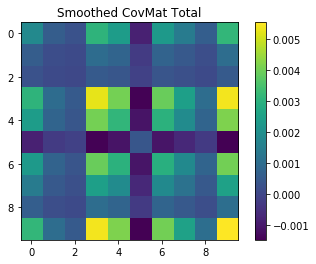

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[ 311.49696545 1324.91540218 1328.27831192  749.77702636  486.61831638
  334.64516104  172.5159859   146.50964231  101.13101165   27.16833171]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  1.491200    cv[1] = 1.392200  rat = 0.517167
bwid = 0.418937
!!!!!!!!!!!!!!!!!!!!
[ 285.69422747 1312.3861024  1348.00025028  753.51737583  469.09701301
  334.72612719  201.09719746  138.01945898   95.72488915   28.10560535]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


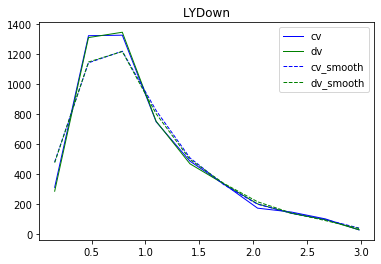

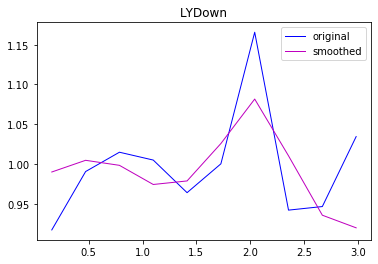

Lepton_ThetaReco [1.00409912e-04 2.19241819e-05 2.69755997e-06 6.61344026e-04
 4.52048292e-04 6.63967215e-04 6.67082200e-03 1.06219144e-04
 4.14076749e-03 6.43467597e-03]
Lepton_ThetaReco [7.44994779e-03 8.95647953e-03 2.29707488e-03 4.50402540e-04
 8.87655567e-05 1.28106762e-08 1.42384091e-05 2.28407905e-03
 5.72761009e-03 1.61043649e-03]


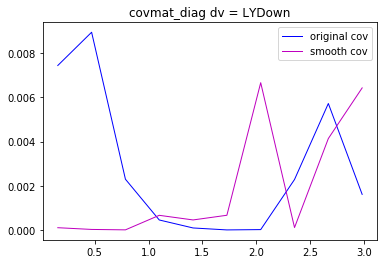

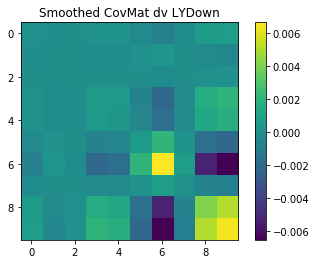

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[ 311.49696545 1324.91540218 1328.27831192  749.77702636  486.61831638
  334.64516104  172.5159859   146.50964231  101.13101165   27.16833171]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  1.491200    cv[1] = 1.392200  rat = 0.517167
bwid = 0.418937
!!!!!!!!!!!!!!!!!!!!
[ 315.4663833  1336.00337894 1297.43334531  762.13309767  404.35218556
  330.15871043  185.08007726  148.19835296   89.7933063    32.0120635 ]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


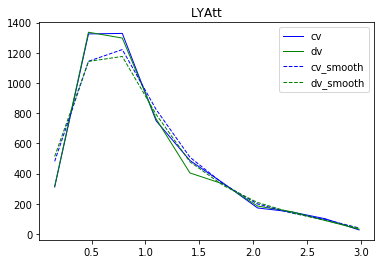

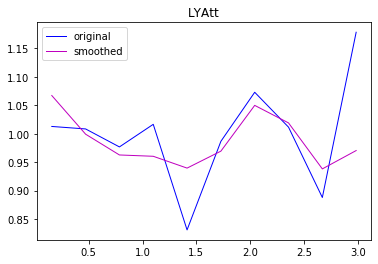

Lepton_ThetaReco [4.50027563e-03 7.10571941e-07 1.39544134e-03 1.57363232e-03
 3.65240582e-03 9.39210864e-04 2.47824109e-03 3.59645854e-04
 3.82441403e-03 8.75956837e-04]
Lepton_ThetaReco [10.2795564   8.03582463  6.48220711  7.21822452  5.32558624  6.23567745
  6.42616845  6.76507586  7.65233528  6.82104117]


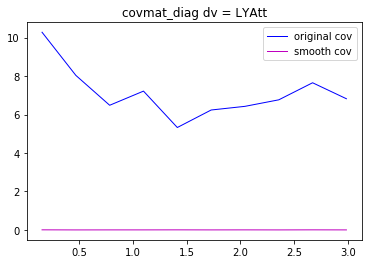

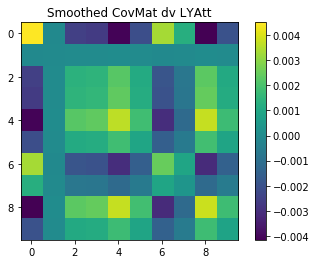

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[ 311.49696545 1324.91540218 1328.27831192  749.77702636  486.61831638
  334.64516104  172.5159859   146.50964231  101.13101165   27.16833171]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  1.491200    cv[1] = 1.392200  rat = 0.517167
bwid = 0.418937
!!!!!!!!!!!!!!!!!!!!
[ 241.73670469 1330.7410348  1368.1247437   720.10553449  419.39535344
  334.42813548  177.54767657  139.90385603   71.6284641    18.43949327]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


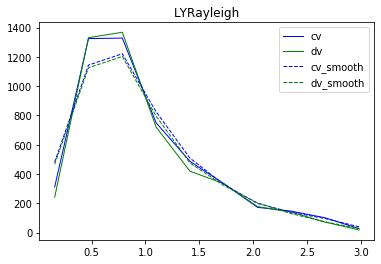

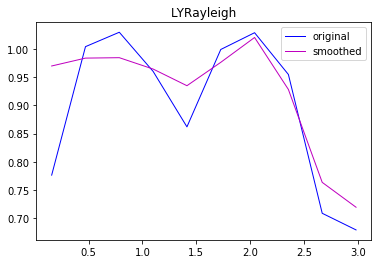

Lepton_ThetaReco [0.00089795 0.00025477 0.00023134 0.00125318 0.00422756 0.00055081
 0.00042827 0.00514007 0.05607008 0.07894835]
Lepton_ThetaReco [0.67743625 0.66358592 0.64957946 0.64728053 0.65302562 0.63943111
 0.633313   0.63707736 0.63823405 0.65587584]


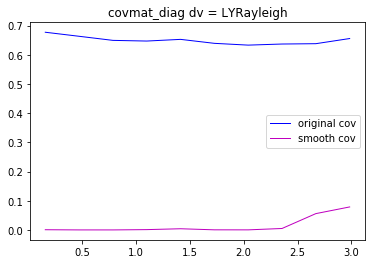

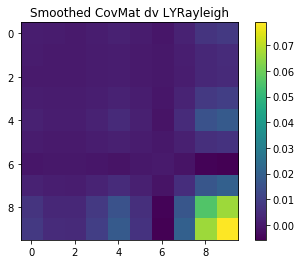

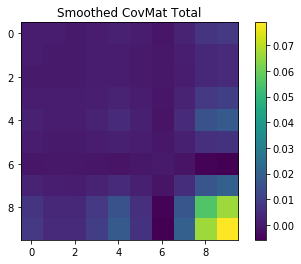

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[598.12293559 461.14665974 234.6141694  514.65712416 687.9090284
 564.25350764 456.52492971 282.78476702 537.76708687 645.27594638]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.250700    cv[1] = -2.371300  rat = -0.118221
bwid = 0.837874
!!!!!!!!!!!!!!!!!!!!
[567.43375262 524.98576154 217.20479683 490.37870131 629.42841799
 623.50675828 493.9420508  256.47869459 563.63780922 599.37150394]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


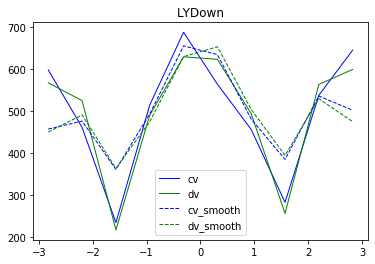

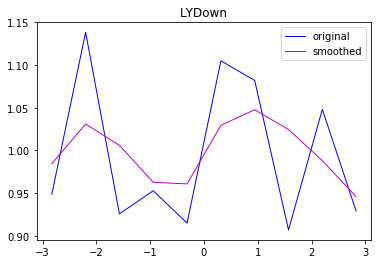

Lepton_PhiReco [2.40251295e-04 9.59768288e-04 3.66000339e-05 1.39046781e-03
 1.53047340e-03 8.65460270e-04 2.27496456e-03 6.00719703e-04
 1.41444465e-04 2.93126500e-03]
Lepton_PhiReco [4.38387607e-04 7.42810603e-04 2.19389297e-04 1.07646392e-05
 2.55706967e-03 1.24166782e-03 5.69350806e-04 1.58676445e-04
 9.88932321e-06 2.34358966e-04]


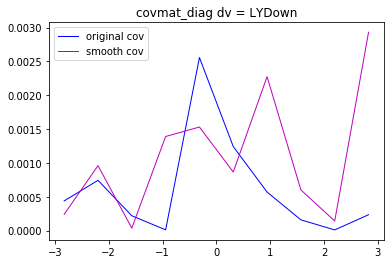

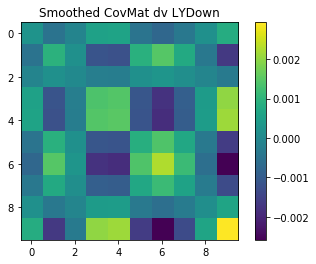

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[598.12293559 461.14665974 234.6141694  514.65712416 687.9090284
 564.25350764 456.52492971 282.78476702 537.76708687 645.27594638]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.250700    cv[1] = -2.371300  rat = -0.118221
bwid = 0.837874
!!!!!!!!!!!!!!!!!!!!
[598.48451095 518.0927786  190.29781753 479.87451277 643.21083406
 565.72096651 458.71397987 216.51119446 579.92259992 649.80170653]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


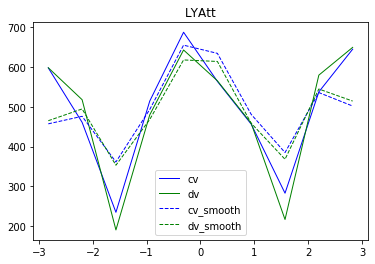

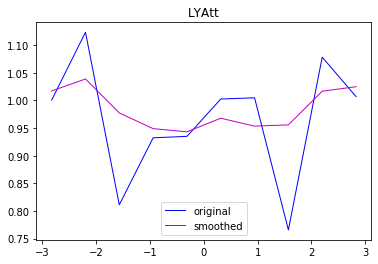

Lepton_PhiReco [0.00029567 0.00151426 0.00050886 0.00260027 0.00322535 0.00103211
 0.00215869 0.0019503  0.00027992 0.00061965]
Lepton_PhiReco [6.56708886 7.62089232 7.48708655 5.6859978  7.31191613 6.3888121
 6.82104117 6.76997147 6.95589218 6.25317281]


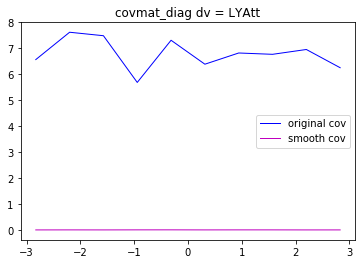

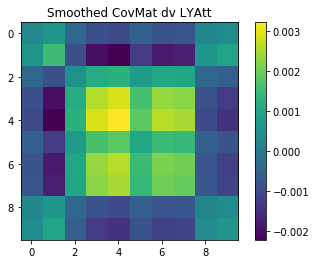

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[598.12293559 461.14665974 234.6141694  514.65712416 687.9090284
 564.25350764 456.52492971 282.78476702 537.76708687 645.27594638]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.250700    cv[1] = -2.371300  rat = -0.118221
bwid = 0.837874
!!!!!!!!!!!!!!!!!!!!
[615.61258929 492.69293338 220.0529033  469.61532625 629.78467376
 610.38609223 449.48304968 218.66731238 547.6032682  568.15284811]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


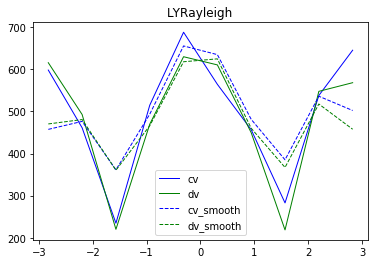

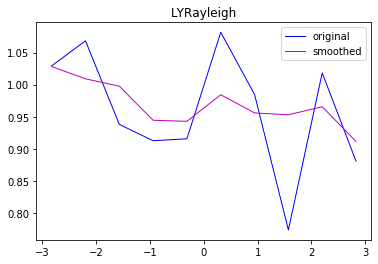

Lepton_PhiReco [7.94951960e-04 8.21336815e-05 5.76744963e-06 3.09453372e-03
 3.27869087e-03 2.48274750e-04 1.94928277e-03 2.21338831e-03
 1.19106249e-03 7.85572752e-03]
Lepton_PhiReco [0.64248348 0.63169757 0.65113017 0.65789218 0.64844221 0.64044942
 0.64853616 0.64644299 0.64614073 0.67061556]


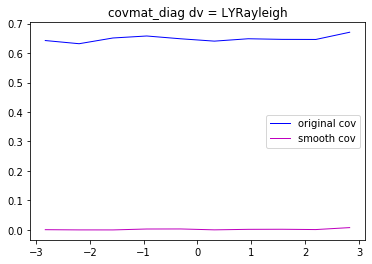

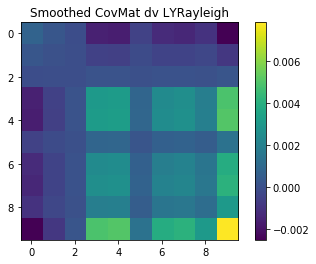

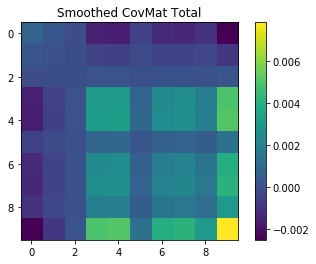

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[3.11732535e-03 2.91379134e+00 9.24642802e+01 5.62204874e+02
 1.38974317e+03 1.48721511e+03 7.73864546e+02 4.32029303e+02
 2.02993120e+02 3.96248402e+01]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  2.103700    cv[1] = 2.277900  rat = 0.480121
bwid = 0.418937
!!!!!!!!!!!!!!!!!!!!
[   2.89038136   10.14132547   70.12031761  503.80443905 1386.68225993
 1522.57509391  788.74153759  437.86075525  211.57404139   31.97809555]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


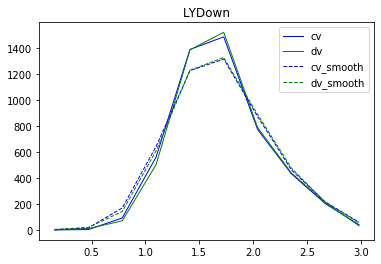

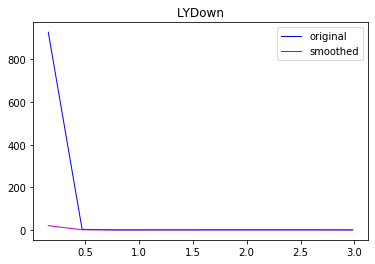

OpenAng [3.92887213e+02 4.37844099e-02 2.61153044e-02 2.66122840e-03
 8.34726957e-06 8.33131091e-05 3.18495301e-04 8.81712597e-04
 1.87192569e-04 6.00386690e-03]
OpenAng [3.14337678e+00 7.27529834e+00 9.53139066e-03 2.47926268e-03
 2.03721577e-03 1.17404498e-03 8.34055121e-04 1.03592758e-04
 7.84484945e-04 4.21932523e-02]


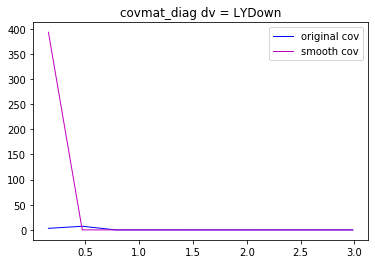

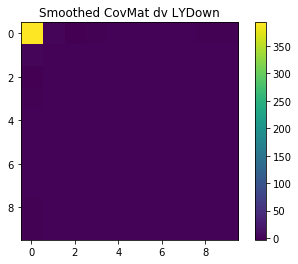

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[3.11732535e-03 2.91379134e+00 9.24642802e+01 5.62204874e+02
 1.38974317e+03 1.48721511e+03 7.73864546e+02 4.32029303e+02
 2.02993120e+02 3.96248402e+01]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  2.103700    cv[1] = 2.277900  rat = 0.480121
bwid = 0.418937
!!!!!!!!!!!!!!!!!!!!
[   3.17403764   20.5230653   102.25079832  526.95111123 1395.88820061
 1419.83221419  773.55049703  430.82469132  196.37178652   31.26449907]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


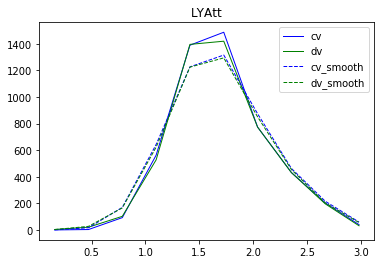

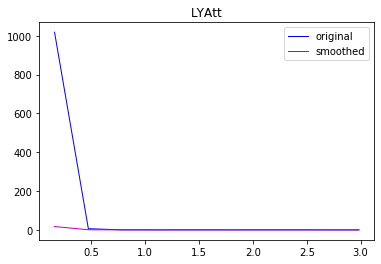

OpenAng [2.94305166e+02 4.15082741e-01 5.15751152e-04 1.00823292e-03
 2.41155940e-06 2.62535007e-04 7.23403044e-04 3.14491563e-04
 3.37551047e-03 4.22908616e-03]
OpenAng [29.98847938 75.93833928  5.4722174   7.01371666  7.46777932  6.68612981
  6.26325029  6.89397203  6.71304957  4.04352869]


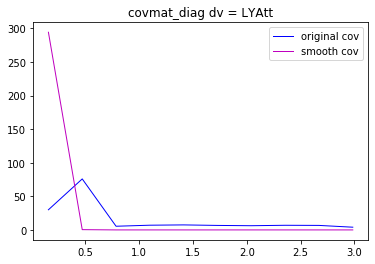

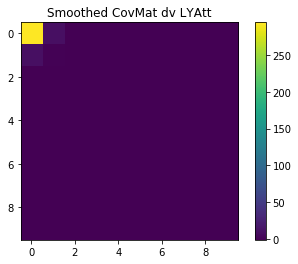

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[3.11732535e-03 2.91379134e+00 9.24642802e+01 5.62204874e+02
 1.38974317e+03 1.48721511e+03 7.73864546e+02 4.32029303e+02
 2.02993120e+02 3.96248402e+01]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  2.103700    cv[1] = 2.277900  rat = 0.480121
bwid = 0.418937
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 6.47662238e+00 9.82133600e+01 4.03656000e+02
 1.44268766e+03 1.42083128e+03 8.33215784e+02 4.03291360e+02
 1.83024229e+02 3.06546966e+01]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


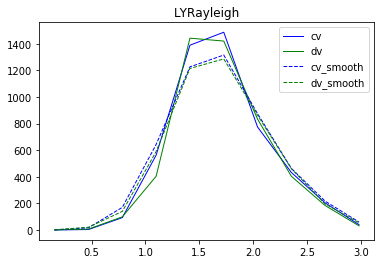

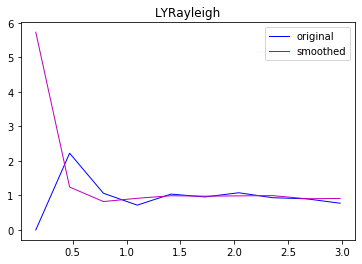

OpenAng [2.23389818e+01 5.81102511e-02 3.17864376e-02 6.96355234e-03
 9.57586988e-05 4.85170364e-04 1.90993494e-04 3.30480158e-05
 9.31640359e-03 7.86148641e-03]
OpenAng [1.         0.39300143 0.65224912 0.69647733 0.6569286  0.65119888
 0.63679231 0.63848708 0.62619702 0.7215656 ]


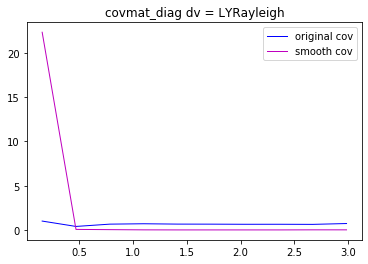

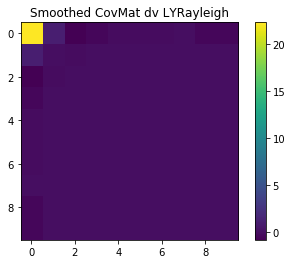

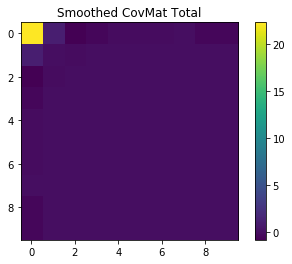

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[102.08891518 378.6272755  699.24416342 625.36674321 679.42747054
 646.54619325 662.24726446 635.32020622 430.51798297 123.66994017]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  172.377000    cv[1] = 173.325200  rat = 0.498629
bwid = 34.138057
!!!!!!!!!!!!!!!!!!!!
[ 98.72157617 402.48628841 676.75556544 641.24904093 660.34242422
 641.15539021 645.84981363 668.33127127 413.80362505 117.67325178]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


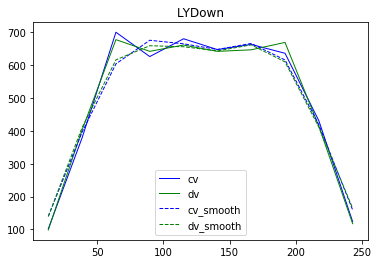

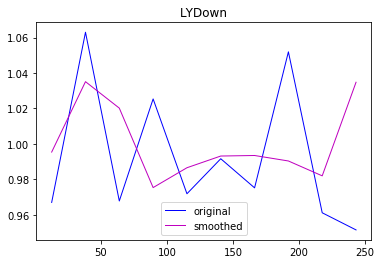

Xreco [2.10191560e-05 1.23472488e-03 4.08251796e-04 6.05624457e-04
 1.80006568e-04 4.63697307e-05 4.23704803e-05 9.22028103e-05
 3.23621764e-04 1.21125603e-03]
Xreco [5.02077201e-03 2.22515539e-03 3.36463815e-07 4.44695101e-04
 1.28516360e-04 3.00252584e-05 1.83971780e-04 1.45698158e-03
 1.25699719e-03 8.09573004e-04]


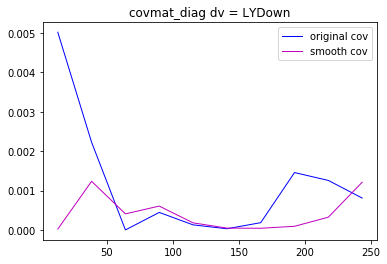

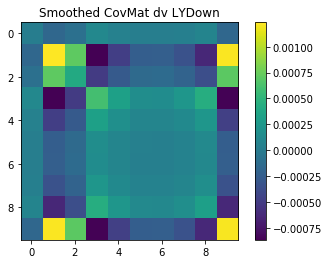

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[102.08891518 378.6272755  699.24416342 625.36674321 679.42747054
 646.54619325 662.24726446 635.32020622 430.51798297 123.66994017]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  172.377000    cv[1] = 173.325200  rat = 0.498629
bwid = 34.138057
!!!!!!!!!!!!!!!!!!!!
[ 91.08147056 391.28784101 658.20352717 612.35162637 613.50177782
 653.18971609 652.11674986 672.60338884 442.72277057 113.57203296]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


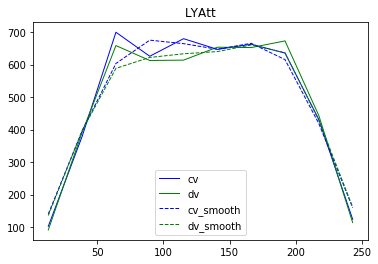

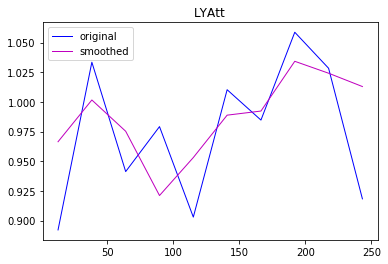

Xreco [1.12560522e-03 2.65483112e-06 6.10961809e-04 6.21884570e-03
 2.19499406e-03 1.24477534e-04 5.92615997e-05 1.17032210e-03
 5.84374582e-04 1.67647173e-04]
Xreco [7.35469054 7.50867031 7.16406887 5.90168537 6.19379587 6.47957131
 6.8915099  7.13281562 7.10435937 6.12287114]


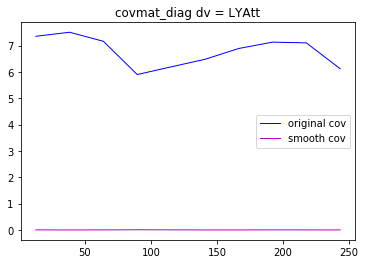

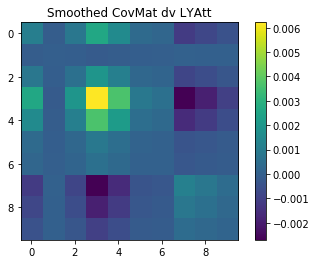

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[102.08891518 378.6272755  699.24416342 625.36674321 679.42747054
 646.54619325 662.24726446 635.32020622 430.51798297 123.66994017]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  172.377000    cv[1] = 173.325200  rat = 0.498629
bwid = 34.138057
!!!!!!!!!!!!!!!!!!!!
[ 85.76798548 378.15251359 614.95518853 569.8680462  697.48961287
 599.28906624 662.93103566 642.98624471 439.31030524 131.30099806]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


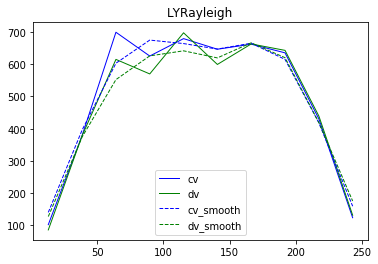

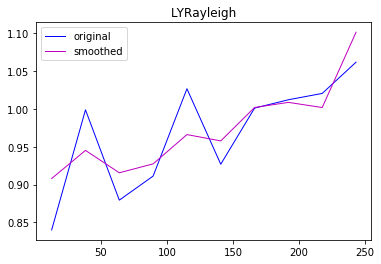

Xreco [8.46158671e-03 3.00556110e-03 7.12346904e-03 5.27313091e-03
 1.15287384e-03 1.78821195e-03 3.42146907e-06 7.42014159e-05
 3.18779882e-06 1.02496341e-02]
Xreco [0.63604462 0.64642166 0.64598664 0.6641743  0.64654877 0.6578633
 0.64299568 0.63846356 0.64226375 0.6484743 ]


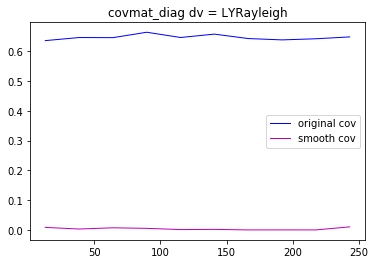

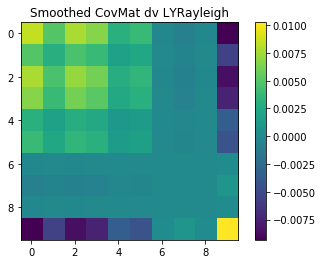

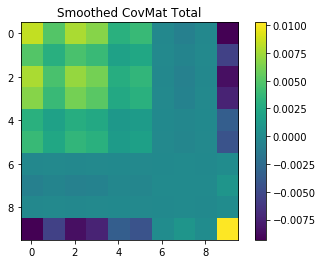

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[154.85443845 534.66595243 586.52164248 816.41744009 591.37790396
 580.57183208 680.13684264 509.35339142 438.6273564   90.52935495]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  -80.263200    cv[1] = -40.012600  rat = 0.667326
bwid = 31.204317
!!!!!!!!!!!!!!!!!!!!
[151.97344123 509.61378687 588.89586593 762.77183316 618.3224397
 559.3141443  672.92797867 568.94481719 420.97080058 112.63313948]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


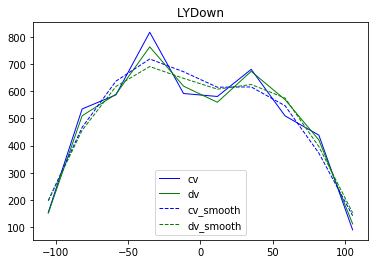

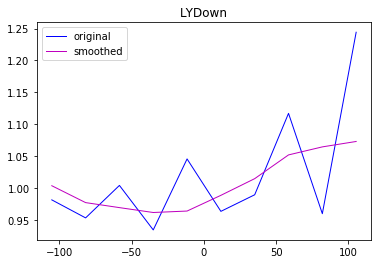

Yreco [1.27042835e-05 5.24764606e-04 9.46024223e-04 1.47544281e-03
 1.30533453e-03 1.32103376e-04 2.14898037e-04 2.69060159e-03
 4.15349055e-03 5.31949936e-03]
Yreco [9.80545463e-04 2.93833723e-06 1.77997043e-04 4.82374970e-04
 9.06908118e-05 1.33647003e-03 1.27463217e-04 9.23838912e-03
 5.22705144e-04 9.66455875e-03]


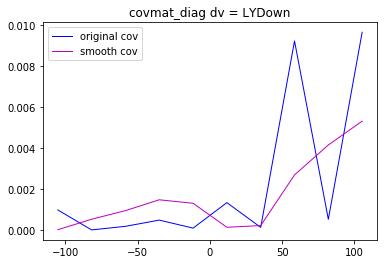

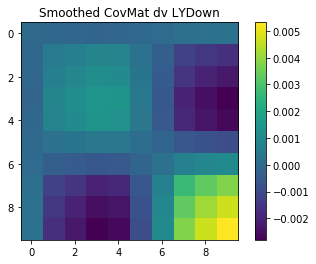

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[154.85443845 534.66595243 586.52164248 816.41744009 591.37790396
 580.57183208 680.13684264 509.35339142 438.6273564   90.52935495]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  -80.263200    cv[1] = -40.012600  rat = 0.667326
bwid = 31.204317
!!!!!!!!!!!!!!!!!!!!
[155.13794191 458.47098987 609.49006463 695.99850998 668.91274153
 566.70336601 655.16141557 546.91142933 440.6656437  103.1787987 ]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


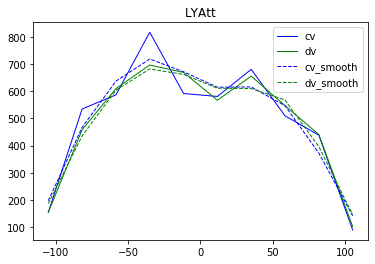

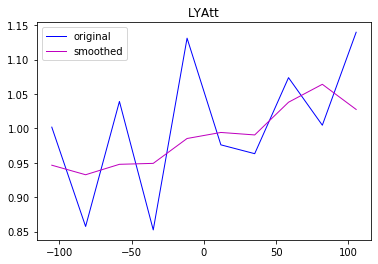

Yreco [2.85864565e-03 4.53285122e-03 2.72197322e-03 2.58048312e-03
 2.15028290e-04 3.45965263e-05 8.99649629e-05 1.44624717e-03
 4.10691932e-03 7.58695292e-04]
Yreco [5.9796117  6.61102587 6.8450574  5.63758108 7.0504255  7.41908605
 6.21587646 7.68463229 6.42186835 9.46288323]


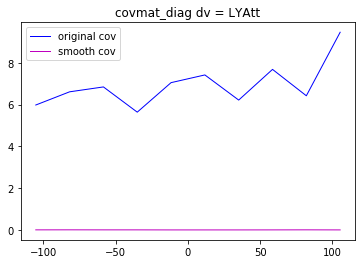

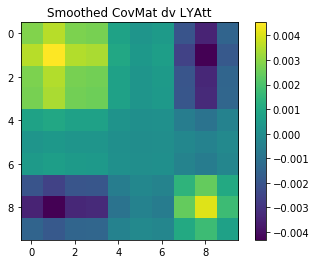

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[154.85443845 534.66595243 586.52164248 816.41744009 591.37790396
 580.57183208 680.13684264 509.35339142 438.6273564   90.52935495]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  -80.263200    cv[1] = -40.012600  rat = 0.667326
bwid = 31.204317
!!!!!!!!!!!!!!!!!!!!
[144.60167773 477.27451428 673.99535537 702.56604347 633.38902023
 544.61117181 597.54478697 526.37659067 414.21733143 107.47450461]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


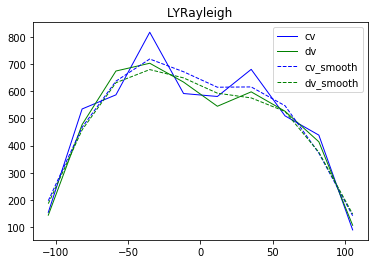

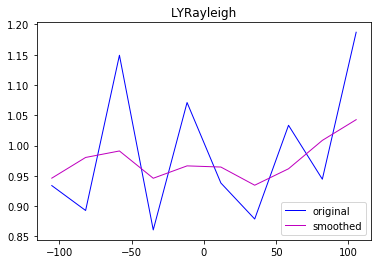

Yreco [2.90776371e-03 3.88860839e-04 8.09829320e-05 2.92605961e-03
 1.13141754e-03 1.26433763e-03 4.30207258e-03 1.47539837e-03
 7.18929399e-05 1.82404268e-03]
Yreco [0.64481267 0.64582225 0.63888833 0.66291648 0.64750146 0.62817228
 0.67303756 0.64198603 0.65478055 0.60580331]


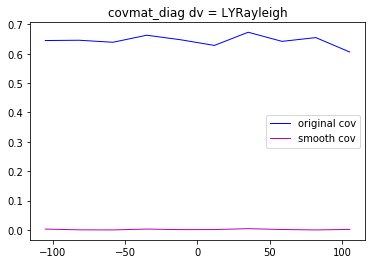

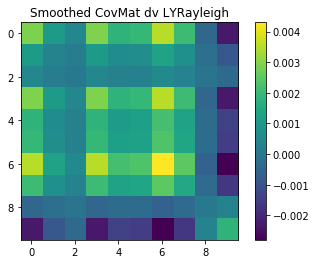

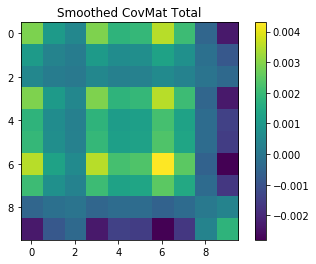

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[301.54981789 512.07552919 620.74494848 546.50324459 690.84309954
 649.52893592 373.49553162 436.79939305 525.55400393 325.9616507 ]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  849.100000    cv[1] = 777.750000  rat = 0.521929
bwid = 138.152448
!!!!!!!!!!!!!!!!!!!!
[303.13617588 472.53455045 589.63386937 600.0637032  626.56199129
 708.06589402 371.84149493 381.27869686 566.39559847 346.85627265]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


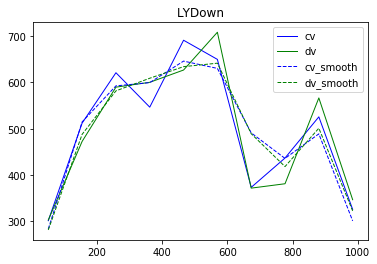

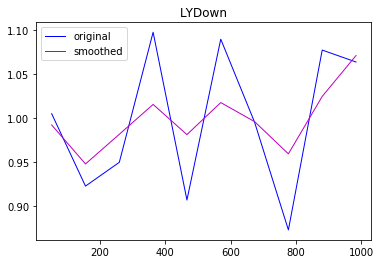

Zreco [5.73680397e-05 2.70152636e-03 3.31482083e-04 2.49529715e-04
 3.44712857e-04 3.21021555e-04 1.41622854e-05 1.63822324e-03
 6.21555989e-04 5.11134627e-03]
Zreco [4.99650358e-04 8.95125142e-05 4.47939000e-03 6.55510275e-05
 3.12741114e-04 1.37521439e-05 8.01168185e-04 8.51143174e-04
 3.68375706e-03 3.80822395e-04]


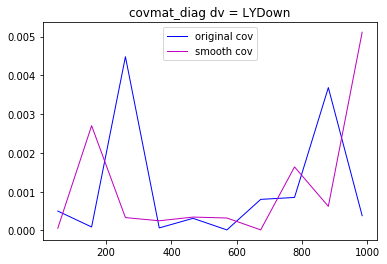

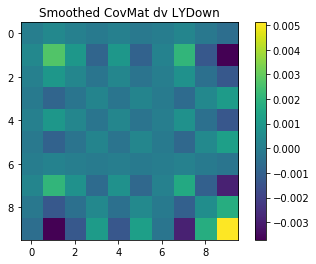

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[301.54981789 512.07552919 620.74494848 546.50324459 690.84309954
 649.52893592 373.49553162 436.79939305 525.55400393 325.9616507 ]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  849.100000    cv[1] = 777.750000  rat = 0.521929
bwid = 138.152448
!!!!!!!!!!!!!!!!!!!!
[231.62652232 497.48537497 497.60428864 547.33432017 702.15682643
 746.29977652 391.90689117 426.96679116 526.02405463 333.22605521]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


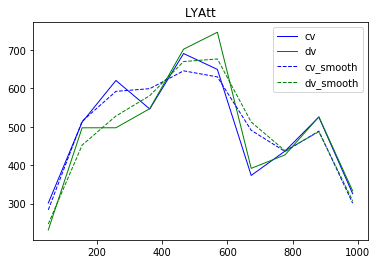

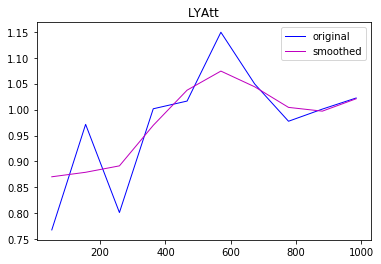

Zreco [1.67689001e-02 1.46021066e-02 1.17634608e-02 9.23920593e-04
 1.39488546e-03 5.49660498e-03 1.92413954e-03 1.76326551e-05
 9.34839012e-06 4.34129717e-04]
Zreco [5.84663024 6.73779525 6.32843052 6.5811612  6.69408168 7.33455616
 6.7197738  7.05208435 6.85001839 6.61301121]


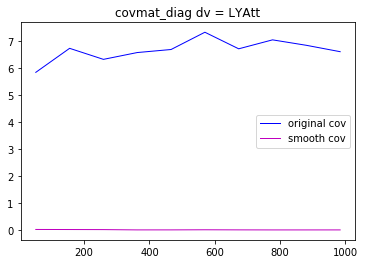

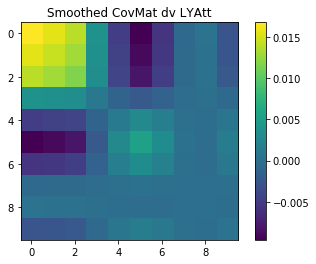

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[301.54981789 512.07552919 620.74494848 546.50324459 690.84309954
 649.52893592 373.49553162 436.79939305 525.55400393 325.9616507 ]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  849.100000    cv[1] = 777.750000  rat = 0.521929
bwid = 138.152448
!!!!!!!!!!!!!!!!!!!!
[298.05549443 490.91978987 531.31167075 597.48305724 599.7979153
 681.5726687  387.3074934  381.4717202  513.65047692 340.48070978]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


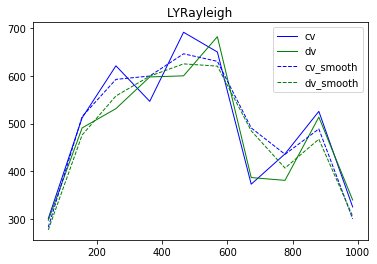

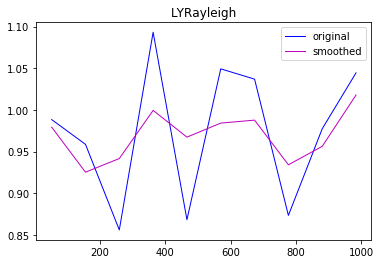

Zreco [4.27984681e-04 5.58849918e-03 3.40791180e-03 3.16362108e-07
 1.06592926e-03 2.49207427e-04 1.50184429e-04 4.33735231e-03
 1.91290017e-03 3.20754934e-04]
Zreco [0.65101321 0.64102627 0.63849379 0.65389043 0.67065604 0.64750146
 0.63726992 0.65313776 0.64334847 0.63376815]


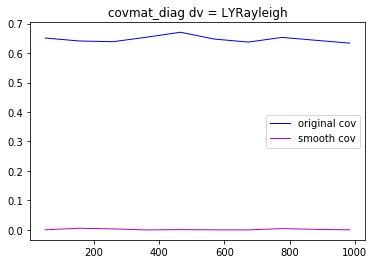

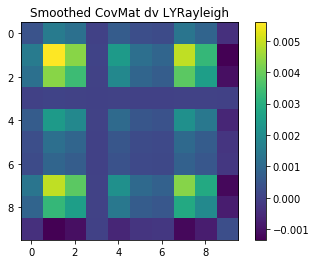

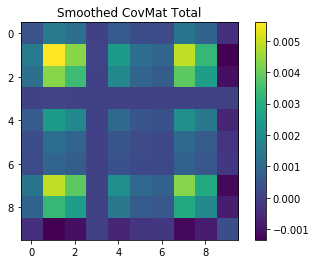

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 3.54346279e+02
 4.63875719e+02 4.16483415e+03]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.995800    cv[1] = 0.997000  rat = 0.499699
bwid = 0.133352
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 2.62912453e+02
 4.64793961e+02 4.23866183e+03]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


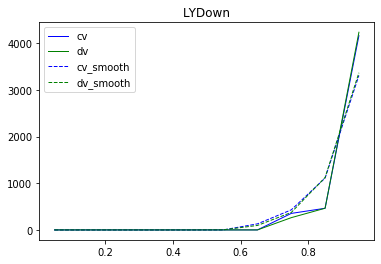

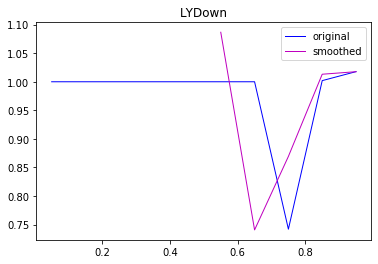

sigProb [0.         0.         0.         0.         0.         0.00751409
 0.06726569 0.01707374 0.00017382 0.00031028]
sigProb [0.         0.         0.         0.         0.         0.
 0.         0.00019768 0.00088351 0.0001483 ]


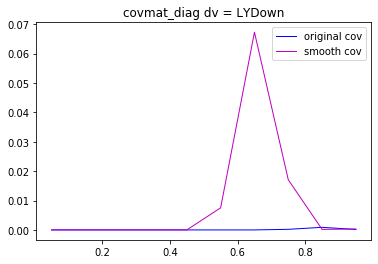

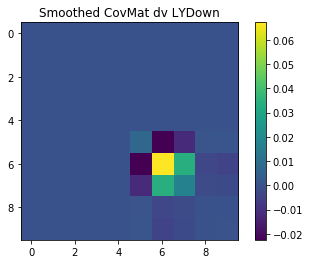

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 3.54346279e+02
 4.63875719e+02 4.16483415e+03]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.995800    cv[1] = 0.997000  rat = 0.499699
bwid = 0.133352
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 3.10112913e+02
 3.85150749e+02 4.20536723e+03]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


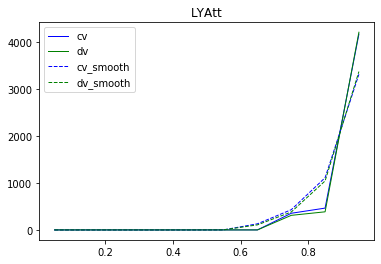

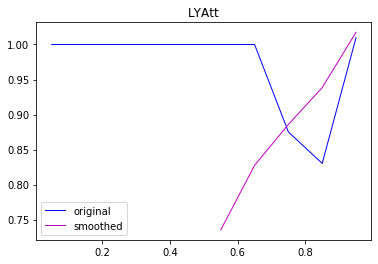

sigProb [0.         0.         0.         0.         0.         0.07004896
 0.02976625 0.01301573 0.00378571 0.00030591]
sigProb [0.         0.         0.         0.         0.         0.
 0.         7.01319929 5.59751174 6.7966801 ]


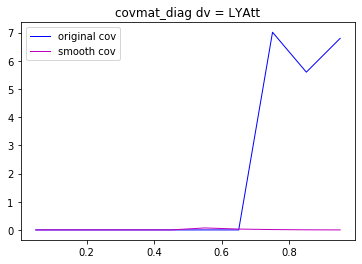

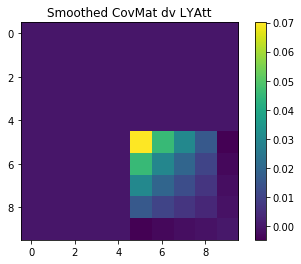

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 3.54346279e+02
 4.63875719e+02 4.16483415e+03]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.995800    cv[1] = 0.997000  rat = 0.499699
bwid = 0.133352
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 2.78314765e+02
 4.49868606e+02 4.09386762e+03]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


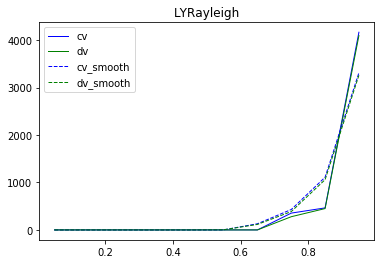

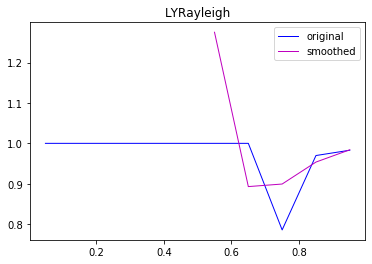

sigProb [0.         0.         0.         0.         0.         0.07583614
 0.01148782 0.01016781 0.00215203 0.00025475]
sigProb [0.         0.         0.         0.         0.         0.
 0.         0.69862054 0.63404084 0.64694893]


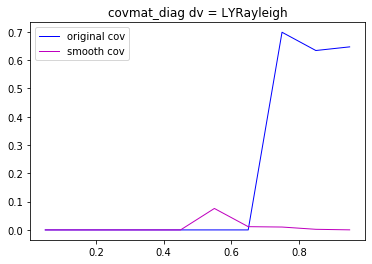

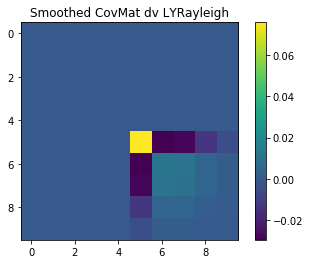

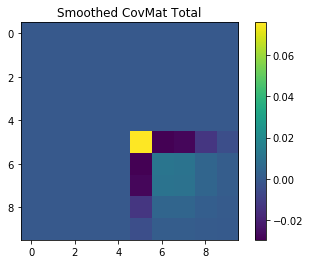

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[4.51157106e+03 4.71485091e+02 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.008500    cv[1] = 0.014300  rat = 0.372807
bwid = 0.133352
!!!!!!!!!!!!!!!!!!!!
[4.51241441e+03 4.53789276e+02 1.64552134e-01 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


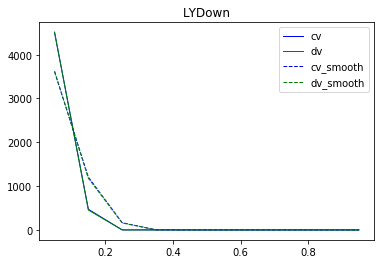

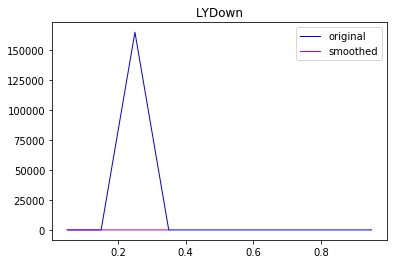

MuonPID_int_yScore [1.70482361e-05 4.56892038e-04 1.41297117e-03 1.87642206e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MuonPID_int_yScore [0.00011698 0.00080117 0.         0.         0.         0.
 0.         0.         0.         0.        ]


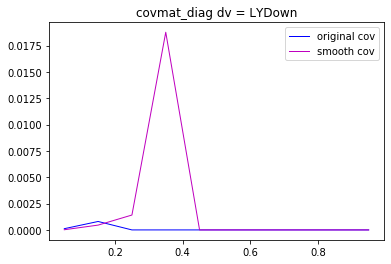

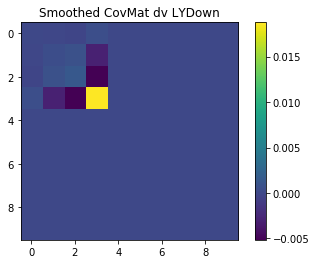

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[4.51157106e+03 4.71485091e+02 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.008500    cv[1] = 0.014300  rat = 0.372807
bwid = 0.133352
!!!!!!!!!!!!!!!!!!!!
[4.45949819e+03 4.40970337e+02 1.62363726e-01 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


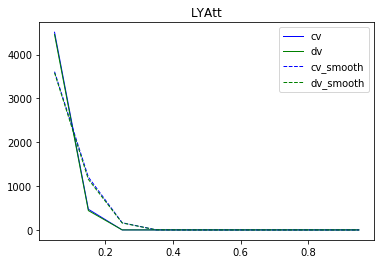

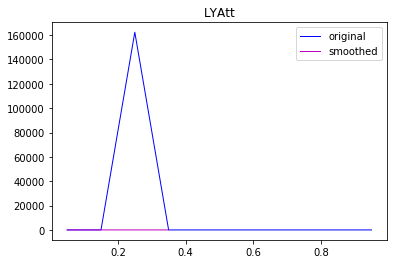

MuonPID_int_yScore [5.05181434e-05 1.78843874e-03 1.34331324e-03 8.37344758e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
MuonPID_int_yScore [6.73980376 6.49436068 0.         0.         0.         0.
 0.         0.         0.         0.        ]


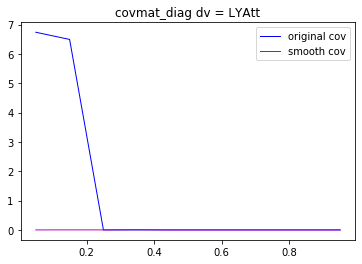

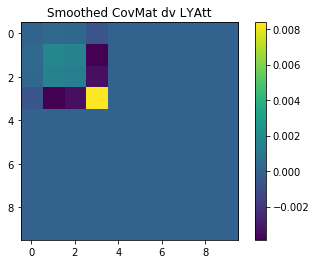

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[4.51157106e+03 4.71485091e+02 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.008500    cv[1] = 0.014300  rat = 0.372807
bwid = 0.133352
!!!!!!!!!!!!!!!!!!!!
[4.3560982e+03 4.6595279e+02 1.0000000e-06 1.0000000e-06 1.0000000e-06
 1.0000000e-06 1.0000000e-06 1.0000000e-06 1.0000000e-06 1.0000000e-06]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


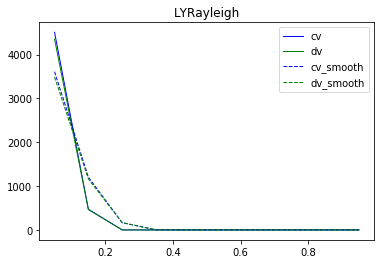

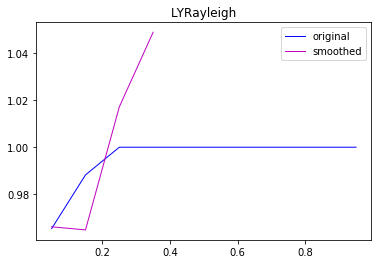

MuonPID_int_yScore [0.00113616 0.00122758 0.00029202 0.00237324 0.         0.
 0.         0.         0.         0.        ]
MuonPID_int_yScore [0.64805066 0.65036721 0.         0.         0.         0.
 0.         0.         0.         0.        ]


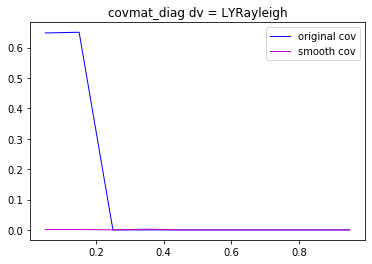

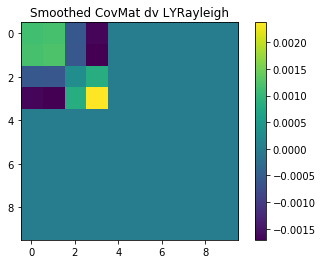

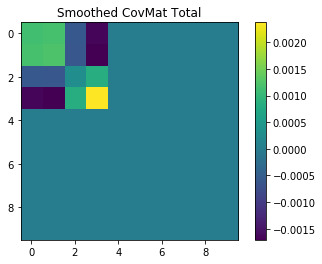

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[ 428.97082562   67.53808538   82.42960752   65.70994168   93.75482034
   91.40645502  105.35200655  170.13320755  328.76771447 3548.99349077]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.989000    cv[1] = 0.932900  rat = 0.514595
bwid = 0.133352
!!!!!!!!!!!!!!!!!!!!
[ 403.67476777   60.2259123    63.06906104   60.64715132   72.30950938
   83.88008828  144.35544663  171.22400527  379.81462128 3527.16768383]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


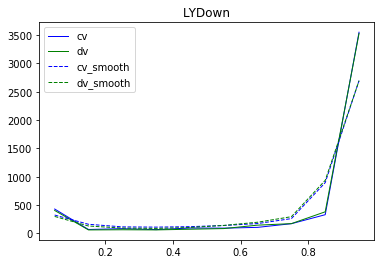

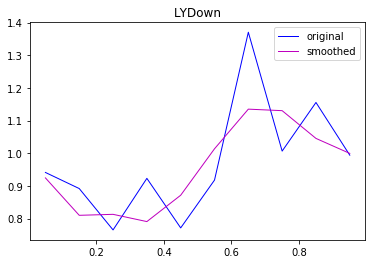

ProtonPID_int_yScore [5.72352538e-03 3.61678958e-02 3.50338547e-02 4.38330404e-02
 1.65667149e-02 1.81041151e-04 1.81763892e-02 1.69447295e-02
 2.04569307e-03 5.04637094e-07]
ProtonPID_int_yScore [1.92444163e-04 1.97675374e-04 1.52499235e-02 2.19563005e-02
 5.72761009e-03 5.57274609e-04 1.14094356e-03 6.14820235e-05
 4.22191529e-03 2.89802520e-04]


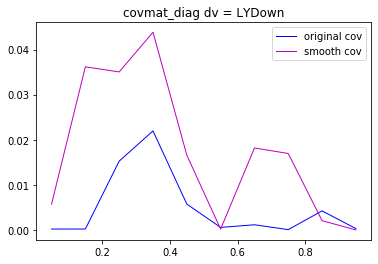

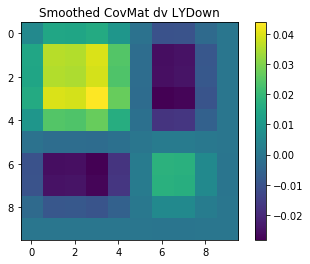

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[ 428.97082562   67.53808538   82.42960752   65.70994168   93.75482034
   91.40645502  105.35200655  170.13320755  328.76771447 3548.99349077]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.989000    cv[1] = 0.932900  rat = 0.514595
bwid = 0.133352
!!!!!!!!!!!!!!!!!!!!
[ 414.92356839   66.4521159    67.36798508   60.58009471   70.91226054
   85.13994526   93.20072429  190.08638114  314.53068303 3537.43714287]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


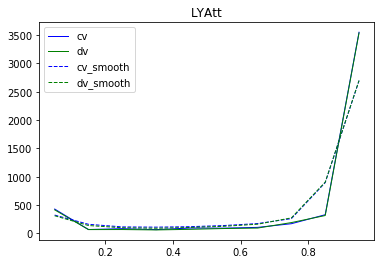

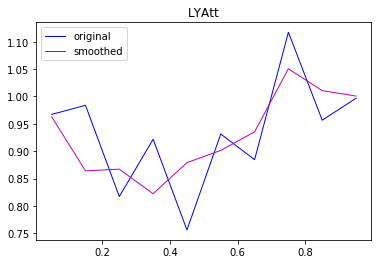

ProtonPID_int_yScore [1.37479126e-03 1.84423665e-02 1.75997536e-02 3.15428454e-02
 1.46003409e-02 9.70444428e-03 4.17569563e-03 2.57036775e-03
 1.14523796e-04 5.32659640e-07]
ProtonPID_int_yScore [5.78957557 6.28970019 6.62064498 5.59355939 5.26654507 4.04031148
 4.45322966 7.85414111 7.457483   6.94682935]


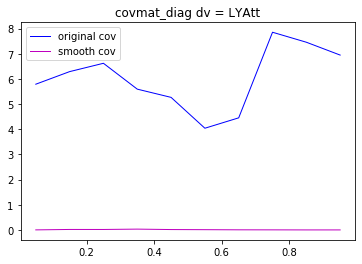

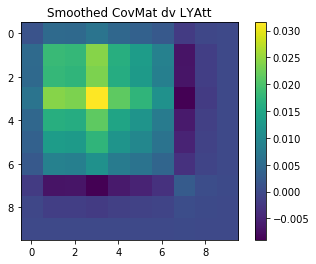

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[ 428.97082562   67.53808538   82.42960752   65.70994168   93.75482034
   91.40645502  105.35200655  170.13320755  328.76771447 3548.99349077]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.989000    cv[1] = 0.932900  rat = 0.514595
bwid = 0.133352
!!!!!!!!!!!!!!!!!!!!
[ 408.61243949   69.08007616   75.10581536   55.46810068   65.52952264
   92.3122876   126.24341937  169.29064025  321.49662066 3438.91207436]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


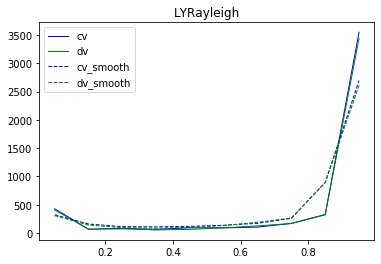

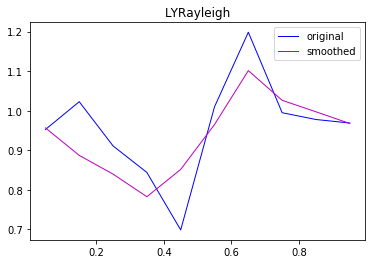

ProtonPID_int_yScore [1.87015144e-03 1.27240953e-02 2.56453260e-02 4.71710770e-02
 2.19882242e-02 1.21337625e-03 1.02654754e-02 6.93796240e-04
 6.86711378e-06 1.03605389e-03]
ProtonPID_int_yScore [0.65750548 0.63169757 0.62557718 0.66169949 0.69949619 0.64893771
 0.6899486  0.65337266 0.65774672 0.6445776 ]


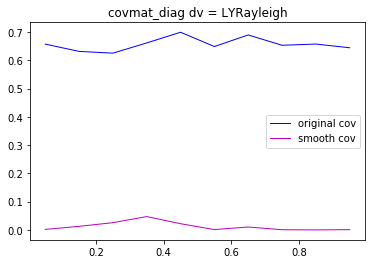

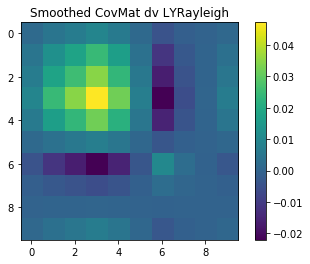

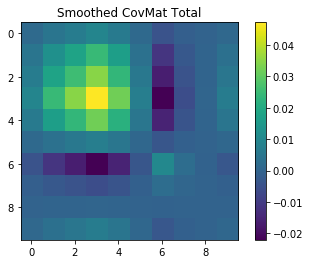

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[ 343.37290351   12.59015557   40.91433128   65.11245659   61.31307795
   79.74016606  111.43555466  225.60893987  468.08663251 3574.88193689]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.971600    cv[1] = 0.976000  rat = 0.498870
bwid = 0.133352
!!!!!!!!!!!!!!!!!!!!
[ 349.74749371   13.63610294   33.93873281   40.50221927   47.39976322
   73.70851003  128.51682219  219.91823437  453.66401451 3605.33635407]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


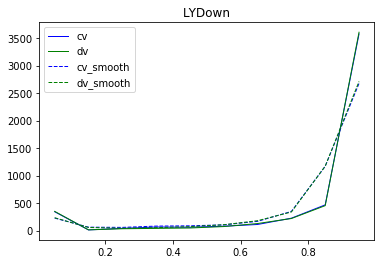

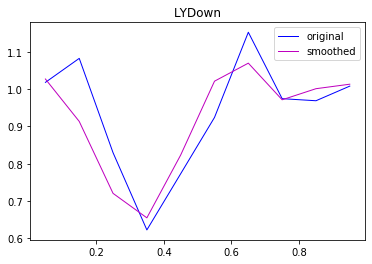

EminusPID_int_yScore [7.61102753e-04 7.46454266e-03 7.82689870e-02 1.19386612e-01
 3.11981586e-02 4.73511301e-04 4.93006002e-03 7.96885013e-04
 2.43595864e-06 1.86049590e-04]
EminusPID_int_yScore [2.36846473e-03 1.68281221e-02 2.10352787e-03 4.65391364e-02
 9.87667529e-03 2.20391902e-05 9.83869399e-03 2.76392034e-03
 5.11817695e-04 3.81168994e-04]


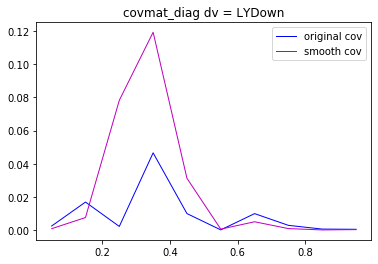

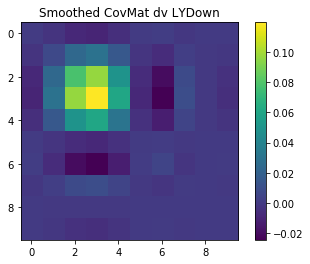

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[ 343.37290351   12.59015557   40.91433128   65.11245659   61.31307795
   79.74016606  111.43555466  225.60893987  468.08663251 3574.88193689]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.971600    cv[1] = 0.976000  rat = 0.498870
bwid = 0.133352
!!!!!!!!!!!!!!!!!!!!
[ 381.19795051    5.93855749   34.5708884    52.71050087   36.040238
   94.32445309  119.232887    183.59222994  457.04992528 3535.97327064]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


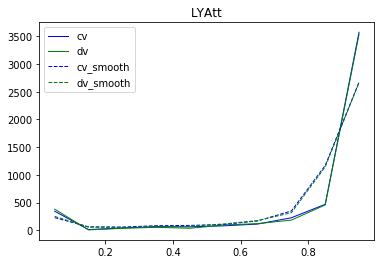

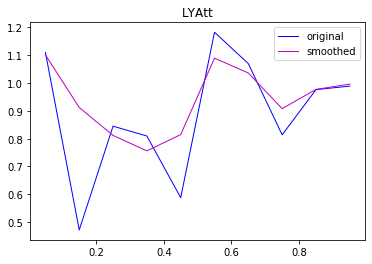

EminusPID_int_yScore [1.03233490e-02 7.72807819e-03 3.54742916e-02 5.95163380e-02
 3.43661033e-02 8.04012146e-03 1.31170239e-03 8.45878679e-03
 5.15705136e-04 1.31416044e-05]
EminusPID_int_yScore [ 6.24728598  5.00903295  5.98778809  4.16910734  3.32313777 10.39154282
  7.39526763  5.19184926  6.26110929  6.95452204]


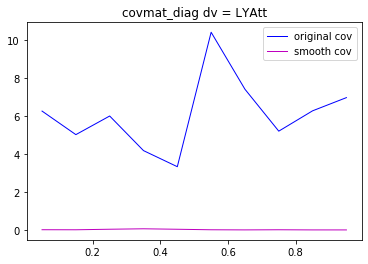

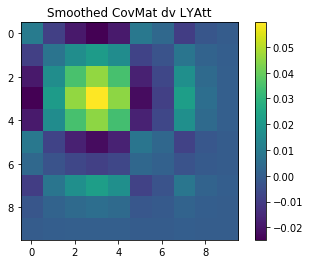

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[ 343.37290351   12.59015557   40.91433128   65.11245659   61.31307795
   79.74016606  111.43555466  225.60893987  468.08663251 3574.88193689]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.971600    cv[1] = 0.976000  rat = 0.498870
bwid = 0.133352
!!!!!!!!!!!!!!!!!!!!
[ 362.77876196    8.93545503   45.17953483   43.65685541   33.76910968
   78.75218971  102.87268969  207.24879937  463.49745334 3475.36014757]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


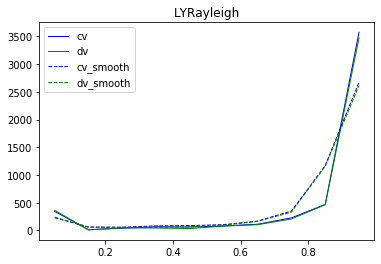

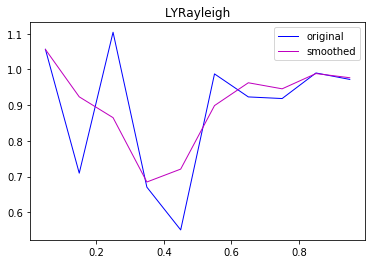

EminusPID_int_yScore [0.00315337 0.00587124 0.0181975  0.09925635 0.07781696 0.01022064
 0.00138594 0.0029344  0.00013051 0.00053527]
EminusPID_int_yScore [0.64278289 0.69585128 0.671526   0.72764402 0.68525151 0.60365138
 0.67406071 0.65224912 0.64892492 0.64654105]


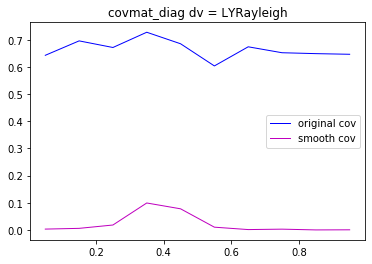

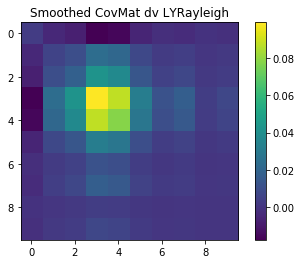

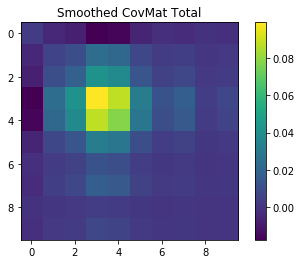

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[1.00000000e-06 2.77361277e+01 5.60125610e+02 3.22803634e+03
 9.07226013e+02 2.04431973e+02 4.21979062e+01 6.36508865e+00
 2.01994879e+00 1.84130603e-01]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  1.058500    cv[1] = 1.073000  rat = 0.496599
bwid = 0.400110
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 4.69520591e+01 6.55164391e+02 3.15997552e+03
 8.21938709e+02 2.13399278e+02 3.86558654e+01 1.92512963e+01
 4.29650621e+00 2.61172045e+00]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


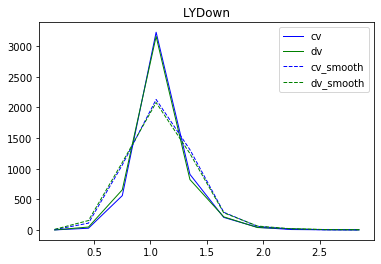

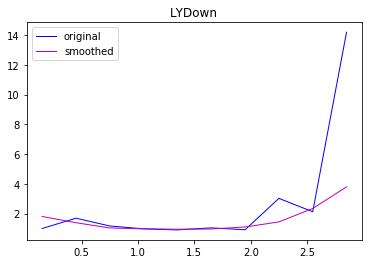

showerFraction [6.53206437e-01 1.51323482e-01 1.50460529e-03 5.41111330e-04
 2.32085533e-03 1.02819885e-03 1.05963100e-02 1.98087691e-01
 1.80499677e+00 7.82123001e+00]
showerFraction [0.00000000e+00 3.62588206e-01 6.58096457e-03 5.12267664e-04
 1.16466305e-03 7.30761789e-04 7.30761789e-04 8.05290580e-02
 3.17696804e-03 7.20186537e-01]


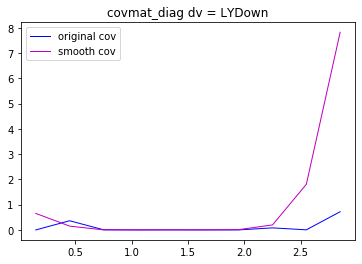

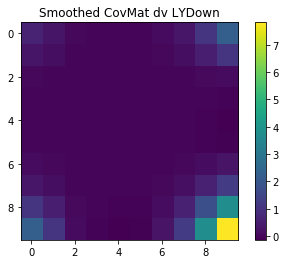

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[1.00000000e-06 2.77361277e+01 5.60125610e+02 3.22803634e+03
 9.07226013e+02 2.04431973e+02 4.21979062e+01 6.36508865e+00
 2.01994879e+00 1.84130603e-01]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  1.058500    cv[1] = 1.073000  rat = 0.496599
bwid = 0.400110
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 6.25144295e+01 6.25668732e+02 3.12598125e+03
 8.27535465e+02 2.10523046e+02 2.96962029e+01 8.67273977e+00
 3.28102297e+00 2.57081157e+00]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


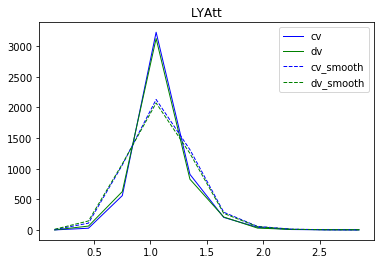

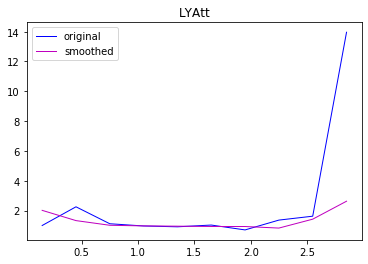

showerFraction [1.03181298e+00 1.07755175e-01 2.32664057e-04 7.12811860e-04
 2.11525451e-03 4.26101508e-03 4.70100698e-03 2.97059210e-02
 1.80069265e-01 2.65261104e+00]
showerFraction [ 0.         40.19133492  8.93881816  6.69166935  6.13044064  6.36113774
  5.5305116   7.71599531  7.29362243 29.98847938]


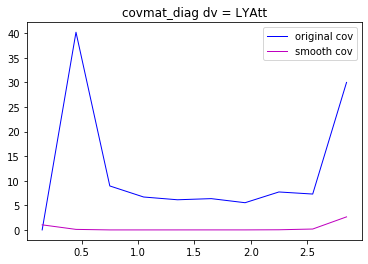

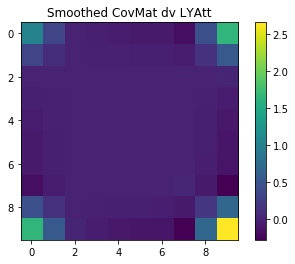

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[1.00000000e-06 2.77361277e+01 5.60125610e+02 3.22803634e+03
 9.07226013e+02 2.04431973e+02 4.21979062e+01 6.36508865e+00
 2.01994879e+00 1.84130603e-01]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  1.058500    cv[1] = 1.073000  rat = 0.496599
bwid = 0.400110
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 6.60543863e+01 5.46501000e+02 3.07951214e+03
 8.81103024e+02 1.98674154e+02 3.91068701e+01 5.79208727e+00
 2.64425422e+00 1.65413468e-01]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


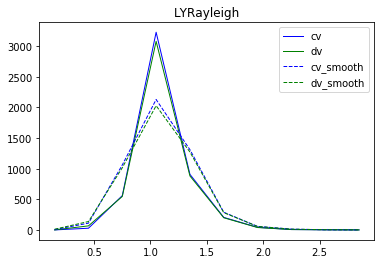

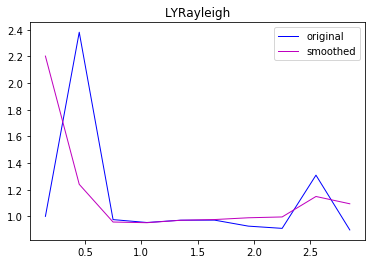

showerFraction [1.44598513e+00 5.78319316e-02 1.80017402e-03 2.25739552e-03
 8.53150462e-04 5.70488916e-04 1.10848175e-04 1.88150855e-05
 2.22619800e-02 8.92560854e-03]
showerFraction [0.         0.42480637 0.66849137 0.65120607 0.63534453 0.65903989
 0.67239143 0.67866797 0.61905268 0.66169949]


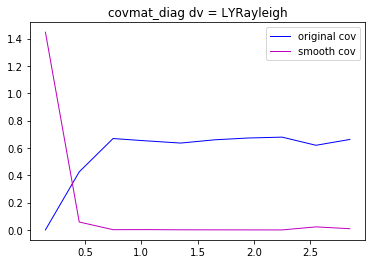

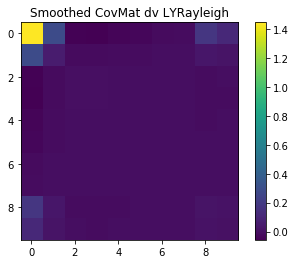

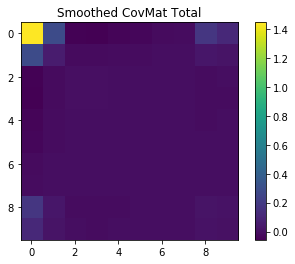

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[2.71578038e+03 1.43036496e+03 6.89149589e+02 1.47761211e+02
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.704700    cv[1] = 0.368100  rat = 0.656879
bwid = 0.666759
!!!!!!!!!!!!!!!!!!!!
[2.68799107e+03 1.47053773e+03 6.62043589e+02 1.45795860e+02
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


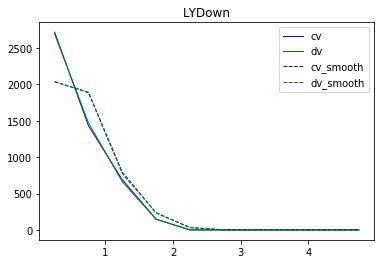

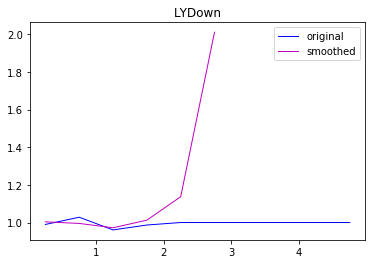

showerConsistency [1.25373951e-05 2.36179205e-05 7.78466631e-04 1.57723151e-04
 1.87949233e-02 1.02251748e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
showerConsistency [0.00014612 0.00016865 0.00352281 0.00292119 0.         0.
 0.         0.         0.         0.        ]


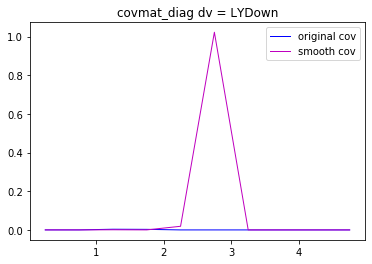

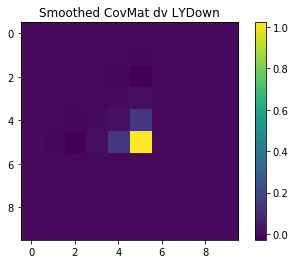

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[2.71578038e+03 1.43036496e+03 6.89149589e+02 1.47761211e+02
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.704700    cv[1] = 0.368100  rat = 0.656879
bwid = 0.666759
!!!!!!!!!!!!!!!!!!!!
[2.68733657e+03 1.46772618e+03 6.07400498e+02 1.38167645e+02
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


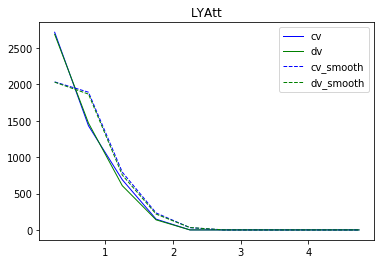

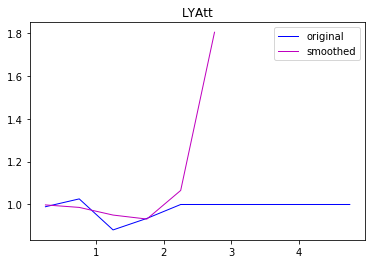

showerConsistency [3.83228817e-06 1.85125941e-04 2.43177527e-03 4.61426182e-03
 4.29617119e-03 6.45699856e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
showerConsistency [6.70188322 6.63803678 7.17075793 6.21866604 0.         0.
 0.         0.         0.         0.        ]


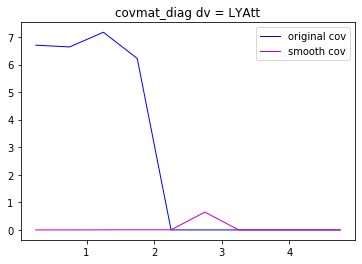

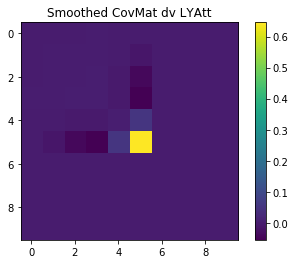

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[2.71578038e+03 1.43036496e+03 6.89149589e+02 1.47761211e+02
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  0.704700    cv[1] = 0.368100  rat = 0.656879
bwid = 0.666759
!!!!!!!!!!!!!!!!!!!!
[2.63780920e+03 1.47452960e+03 5.72768042e+02 1.36944148e+02
 1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000000e-06]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in double_scalars


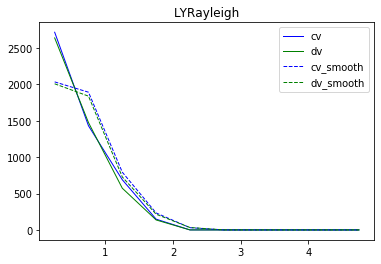

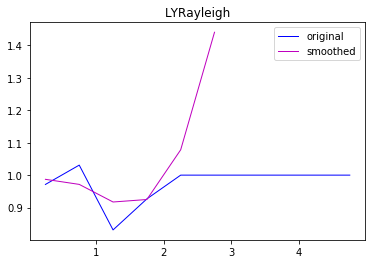

showerConsistency [1.67157842e-04 8.15733984e-04 6.85772115e-03 5.64903587e-03
 6.09954102e-03 1.93976397e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
showerConsistency [0.64722002 0.64786336 0.64926874 0.66436444 0.         0.
 0.         0.         0.         0.        ]


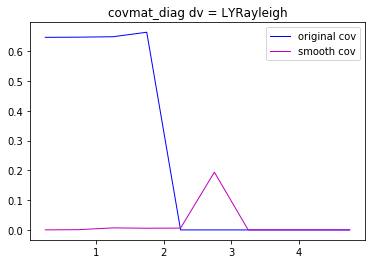

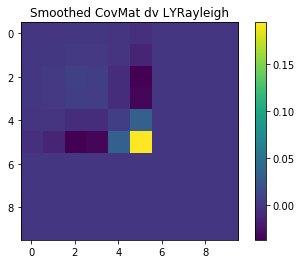

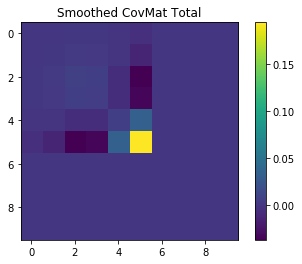

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[1.52126523e-01 9.37313642e+01 3.40085986e+02 4.68290194e+02
 5.85741880e+02 5.82282498e+02 5.33617030e+02 4.99823425e+02
 3.31910126e+02 3.21007999e+02]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  861.578500    cv[1] = 854.220800  rat = 0.502144
bwid = 166.612685
!!!!!!!!!!!!!!!!!!!!
[1.47337372e-01 8.78945260e+01 3.38522307e+02 4.79425062e+02
 5.22532335e+02 5.60060970e+02 6.07110193e+02 4.29349637e+02
 3.65731322e+02 3.45362811e+02]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


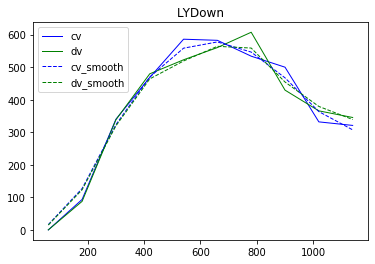

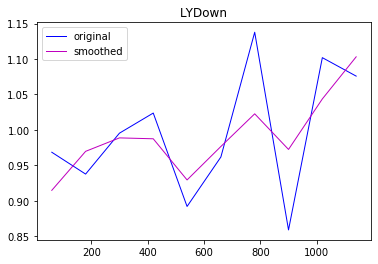

EeCCQE [0.00725662 0.00091262 0.0001263  0.00015609 0.00497457 0.00054577
 0.00051535 0.00075723 0.00190899 0.01061903]
EeCCQE [0.00572761 0.00572761 0.0009657  0.00043938 0.00117075 0.00154137
 0.00605717 0.00565929 0.02152429 0.00040961]


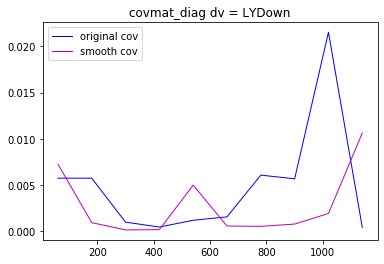

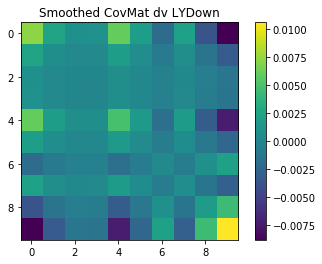

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[1.52126523e-01 9.37313642e+01 3.40085986e+02 4.68290194e+02
 5.85741880e+02 5.82282498e+02 5.33617030e+02 4.99823425e+02
 3.31910126e+02 3.21007999e+02]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  861.578500    cv[1] = 854.220800  rat = 0.502144
bwid = 166.612685
!!!!!!!!!!!!!!!!!!!!
[1.45377907e-01 8.74754337e+01 3.37867026e+02 4.56801952e+02
 5.68297846e+02 5.04471908e+02 4.93750831e+02 4.56892691e+02
 3.62539372e+02 3.98250290e+02]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


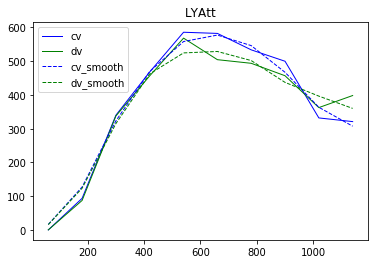

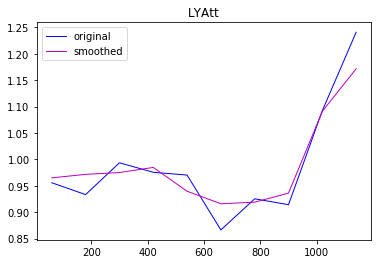

EeCCQE [0.00122854 0.00081032 0.00062624 0.00023497 0.00364285 0.00707463
 0.0065788  0.00408888 0.008268   0.02940769]
EeCCQE [5.00903295 5.63307469 6.13463653 6.47072663 6.06158854 6.07418021
 6.14231271 7.65492849 9.85274382 8.82825908]


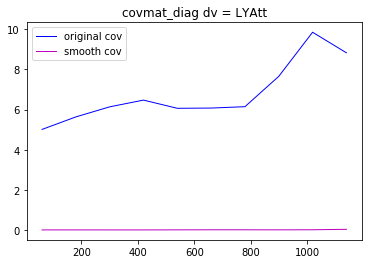

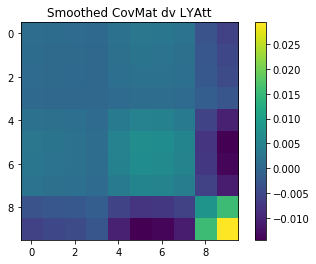

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[1.52126523e-01 9.37313642e+01 3.40085986e+02 4.68290194e+02
 5.85741880e+02 5.82282498e+02 5.33617030e+02 4.99823425e+02
 3.31910126e+02 3.21007999e+02]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  861.578500    cv[1] = 854.220800  rat = 0.502144
bwid = 166.612685
!!!!!!!!!!!!!!!!!!!!
[1.36662666e-01 8.51408207e+01 3.28839697e+02 5.00517195e+02
 5.67028511e+02 4.90075839e+02 5.51709321e+02 4.15926951e+02
 3.62968854e+02 3.50214280e+02]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


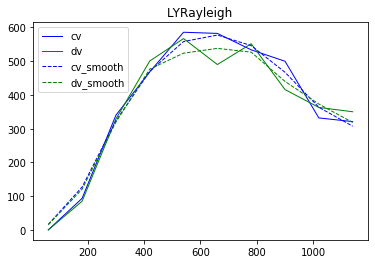

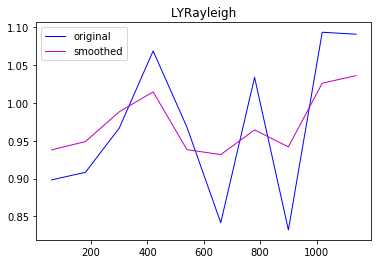

EeCCQE [0.00384119 0.00259652 0.00013322 0.00021569 0.00380588 0.00465606
 0.00126738 0.00336898 0.00068789 0.00130725]
EeCCQE [0.66169949 0.64281092 0.63791388 0.63003805 0.64759327 0.6640604
 0.66492071 0.66169949 0.63907673 0.67031697]


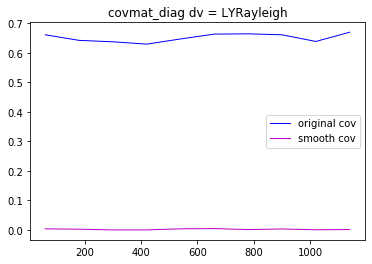

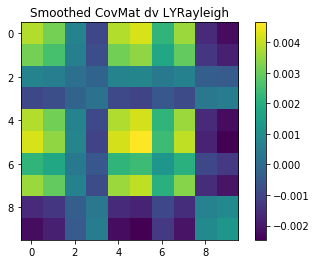

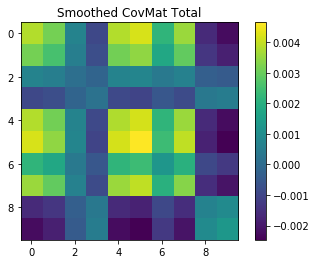

3
0
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4066
cv POT = 94647324259700000686080.000000 dv POT = 102396815141500006432768.000000
$$$$$$$$$$$$$$$$$$$$
[1.00000000e-06 3.23871000e+00 2.95006512e+02 6.20606226e+02
 6.42216483e+02 5.70819280e+02 4.84302402e+02 3.02485734e+02
 2.47927185e+02 1.83499561e+02]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  753.685800    cv[1] = 2569.049500  rat = 0.226827
bwid = 169.361246
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 5.23359339e+00 3.22528406e+02 6.66664070e+02
 6.03746285e+02 5.53483177e+02 4.59518944e+02 3.02398237e+02
 2.25653778e+02 2.02450618e+02]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


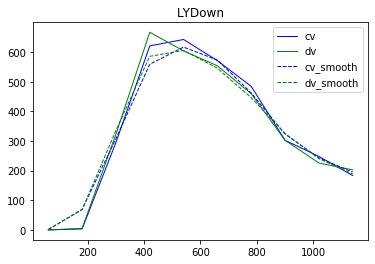

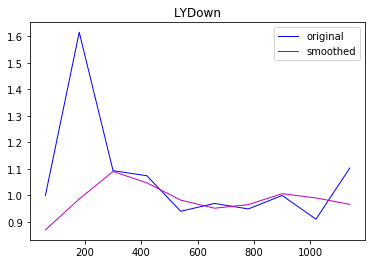

EpCCQE [1.69818505e-02 1.85156756e-04 8.14782258e-03 2.24627203e-03
 3.15333697e-04 2.33466208e-03 1.21261621e-03 4.14860806e-05
 9.26362520e-05 1.13928987e-03]
EpCCQE [0.00000000e+00 2.15450844e-02 1.25976668e-03 1.04405971e-05
 5.19743040e-04 5.51504677e-04 2.63422398e-03 4.60319140e-03
 1.73829529e-03 1.19208902e-02]


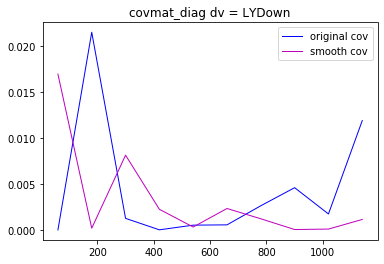

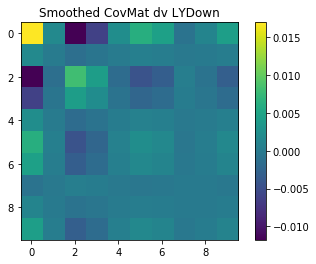

1
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 4121
cv POT = 94647324259700000686080.000000 dv POT = 29229396038299999535104.000000
$$$$$$$$$$$$$$$$$$$$
[1.00000000e-06 3.23871000e+00 2.95006512e+02 6.20606226e+02
 6.42216483e+02 5.70819280e+02 4.84302402e+02 3.02485734e+02
 2.47927185e+02 1.83499561e+02]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  753.685800    cv[1] = 2569.049500  rat = 0.226827
bwid = 169.361246
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 5.63075578e+00 2.80068868e+02 6.86280151e+02
 6.09550380e+02 5.24927620e+02 4.23212016e+02 3.21168661e+02
 2.75396906e+02 1.83715456e+02]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


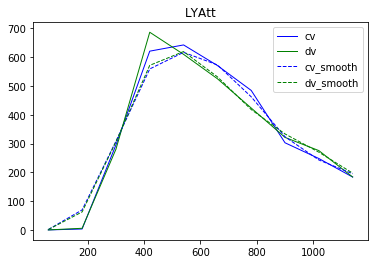

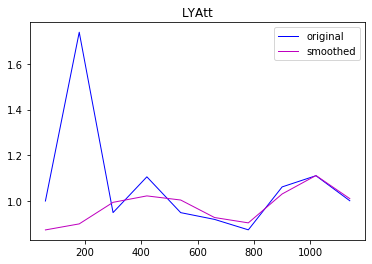

EpCCQE [1.59951279e-02 1.00174837e-02 3.34723031e-05 5.02198539e-04
 1.90536462e-05 5.21546612e-03 9.14533849e-03 9.51108892e-04
 1.24441682e-02 1.09524566e-04]
EpCCQE [ 0.          7.48708655  5.53567597  6.60322212  7.77776404  5.6417147
  6.74181793  6.55300789 10.00617953  5.6739329 ]


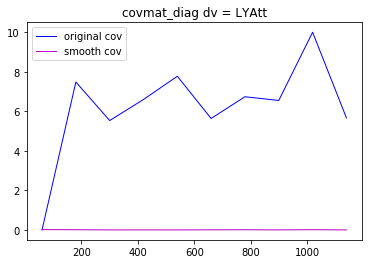

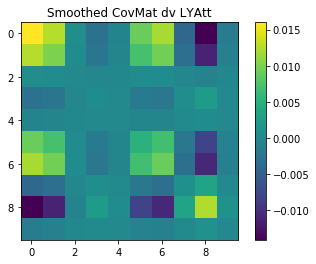

2
               POT      Etrue
0     9.464732e+22   627.0219
1     2.402369e+22   934.9267
2     2.402369e+22  1724.5284
3     2.402369e+22  1333.1600
4     2.402369e+22  1081.5496
...            ...        ...
3708  9.464732e+22   481.0020
3709  9.464732e+22   682.0999
3710  9.464732e+22   746.6949
3711  9.464732e+22   716.7778
3712  9.464732e+22   737.0035

[3713 rows x 2 columns]
cv = 3713  and dv = 3879
cv POT = 94647324259700000686080.000000 dv POT = 507353974244600014962688.000000
$$$$$$$$$$$$$$$$$$$$
[1.00000000e-06 3.23871000e+00 2.95006512e+02 6.20606226e+02
 6.42216483e+02 5.70819280e+02 4.84302402e+02 3.02485734e+02
 2.47927185e+02 1.83499561e+02]
!!!!!!!!!!!!!!!!!!!!
cv[0] =  753.685800    cv[1] = 2569.049500  rat = 0.226827
bwid = 169.361246
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 3.54308529e+00 3.02894220e+02 6.99886423e+02
 5.75454547e+02 5.49336310e+02 3.81699367e+02 2.88888464e+02
 2.00727277e+02 2.01911175e+02]
!!!!!!!!!!!!!!!!!!!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


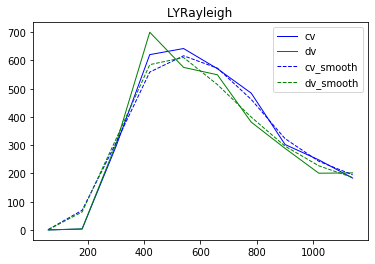

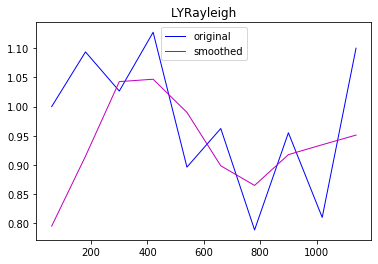

EpCCQE [4.21601019e-02 7.27326191e-03 1.84310095e-03 2.21155599e-03
 9.77375775e-05 1.03263919e-02 1.83485343e-02 6.81087076e-03
 4.29373409e-03 2.39502263e-03]
EpCCQE [0.         0.61583099 0.64037023 0.63361097 0.64367077 0.65528805
 0.66750414 0.65793468 0.69091984 0.665076  ]


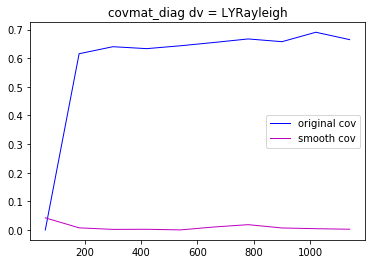

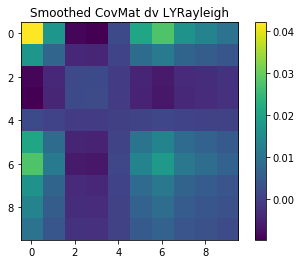

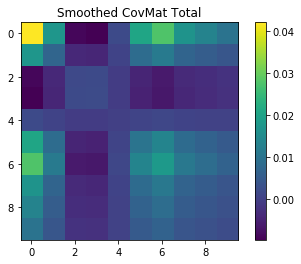

In [51]:
POT_SCALE = 7e22



if not os.path.exists(plotfolder):
    os.makedirs(plotfolder)
if not os.path.exists(covfolder):
    os.makedirs(covfolder)

    
#for dist in varListSel: #[9:10]
#for _,dist in varListSel.items(): # loop over all variables 
for i in range(len(var_names)):
    varname = var_names[i]
    dist = varListSel[varname]
    if varname=='Eta': continue
    nbins = 12 if varname == 'Enu_1e1p' else 10
#    dist = varListSel['MPID_muon']

    cov = np.zeros((nbins,nbins))
    cov_smooth = np.zeros((nbins,nbins))

    
    print(len(a_df_sys))
    for sysi in range(len(a_df_sys)): # loop over all detvars
#    for sysi in range(1):
#        sysi = 3
#        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0 and Enu_1m1p_cv > 0')
        print(sysi)
        myvardf = a_df_sys[sysi].query('Enu_1e1p > 0')
        print(a_df_sys[sysi].query("isCV==True")[['POT','Etrue']])
        
        var_sys = myvardf.query(s_cuts)[dist.myname]
        var_cv = myvardf.query(s_cuts_cv)[dist.myname]
        print('cv = %d  and dv = %d'%(var_cv.shape[0],var_sys.shape[0]))

        pot_cv=myvardf.query("isCV==True").iloc[0]["POT"]
        pot_dv=myvardf.query("isCV==False").iloc[0]["POT"]
        print("cv POT = %f dv POT = %f"%(pot_cv,pot_dv))

        
        # get cv and detvar lists and apply weights
        var_cv_list = np.array(var_cv.astype(float).values.tolist())
        var_sys_list = np.array(var_sys.astype(float).values.tolist())
        cv_weights = POT_SCALE * np.array(myvardf.query(s_cuts_cv)['xsec_corr_weight'].astype(float).values.tolist()) / \
                     np.array(myvardf.query(s_cuts_cv)['POT'].astype(float).values.tolist())
        sys_weights = POT_SCALE * np.array(myvardf.query(s_cuts)['xsec_corr_weight'].astype(float).values.tolist()) / \
                      np.array(myvardf.query(s_cuts)['POT'].astype(float).values.tolist())
        ratio = pot_cv / pot_dv
        cv_weights = np.where(np.logical_or(np.isnan(cv_weights),np.isinf(cv_weights)),1.0,cv_weights)
        sys_weights = np.where(np.logical_or(np.isnan(sys_weights),np.isinf(sys_weights)),1.0,sys_weights)
        
        vcl = var_cv_list[np.logical_not(np.logical_or(np.isnan(var_cv_list),np.isinf(var_cv_list)))]
        cw = cv_weights[np.logical_not(np.logical_or(np.isnan(var_cv_list),np.isinf(var_cv_list)))]
        
        vsl = var_sys_list[np.logical_not(np.logical_or(np.isnan(var_sys_list),np.isinf(var_sys_list)))]
        sw = sys_weights[np.logical_not(np.logical_or(np.isnan(var_sys_list),np.isinf(var_sys_list)))]

        #var_cv_list = var_cv_list * cv_weights 

        #var_sys_list = var_sys_list * sys_weights 
        
        
        
        CV_smooth,DV_smooth = smooth(vcl,vsl,cw,sw,dist.myrange[0],dist.myrange[1],names[sysi],nbin=nbins)


        
#        print(cv_weights)
        hCV,binedges = np.histogram(var_cv_list,bins=nbins,range=dist.myrange)#,weights= cv_weights)#cv_scale)
        h0,_ = np.histogram(var_sys_list,bins=nbins,range=dist.myrange)#,weights=sys_weights)#cv_scale)
        bincenters = np.diff(binedges)/2 + binedges[:-1] 
        h0 = h0 *ratio
        
#        hCV_smooth,binedges = np.histogram(CV_smooth,bins=nbins,range=dist.myrange)#,weights= cv_weights)#cv_scale)
#        hDV_smooth,_ = np.histogram(DV_smooth,bins=nbins,range=dist.myrange)#,weights=sys_weights)#cv_scale)
#        bincenters = np.diff(binedges)/2 + binedges[:-1] 

        
        
#        print(h0)
#        print(hCV)
#        print(bincenters)
        # polyfit
        #polyterms = 4
        #polyCV = np.polyfit(bincenters, hCV, polyterms)
        #fCV = np.poly1d(polyCV)    
        #poly0 = np.polyfit(bincenters, h0, polyterms)
        #f0 = np.poly1d(poly0)    
        #hCV = fCV(bincenters)
        #h0 = f0(bincenters)    
                
        #for i in range(nbins):
        #    for j in range(nbins):
        #        if hCV[i] > 0 and hCV[j] > 0:
        #            cov[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
        #        elif h0[i] > 0 and h0[j] > 0:
        #            cov[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(h0[i]*h0[j])
        cov_tmp = np.zeros((nbins,nbins))
        cov_smooth_tmp = np.zeros((nbins,nbins))            
        for i in range(nbins):
            for j in range(nbins):
                if (hCV[i]*hCV[j])<1e-8:
                    cov_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_tmp[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
    #    print(dist.myname,cov.diagonal())
        
        for i in range(nbins):
            for j in range(nbins):
                if (CV_smooth[i]*CV_smooth[j])<1e-8:
                    cov_smooth_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_smooth_tmp[i][j] += (DV_smooth[i]-CV_smooth[i])*(DV_smooth[j]-CV_smooth[j])/(CV_smooth[i]*CV_smooth[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
        print(dist.myname,cov_smooth_tmp.diagonal())
        print(dist.myname,cov_tmp.diagonal())
        
        offset = (dist.myrange[1] - dist.myrange[0] )/(2*nbins)
        x= np.linspace(dist.myrange[0]+offset,dist.myrange[1]-offset,nbins)
        
        plt.plot(x,cov_tmp.diagonal(),linewidth=1, linestyle="-", c="b",label='original cov')
        plt.plot(x,cov_smooth_tmp.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth cov')
        plt.legend()
        plt.title('covmat_diag dv = %s'%names[sysi])
        plt.savefig(plotfolder+'/detsys_%s_%s_%s_cov_diag.png'%(dist.myname, run,names[sysi]),dpi=120,bbox_inches='tight')
        
        plt.show()
        
        plt.imshow(cov_smooth_tmp, interpolation='none')
        plt.colorbar(orientation='vertical')
        plt.title('Smoothed CovMat dv %s'%names[sysi])

        plt.savefig(plotfolder+'/detsys_%s_%s_%s_cov.png'%(dist.myname, run,names[sysi]),dpi=120,bbox_inches='tight')
        plt.show()

        cov = cov+ cov_tmp
        cov_smooth += cov_smooth_tmp
    plt.imshow(cov_smooth, interpolation='none')
    plt.colorbar(orientation='vertical')
    plt.title('Smoothed CovMat Total')

    plt.savefig(plotfolder+'/detsys_%s_%s_cov.png'%(dist.myname, run),dpi=120,bbox_inches='tight')

    plt.show()
    np.savetxt(covfolder+'/detsys_%s_%s_cov.csv'%(dist.myname, run),cov_smooth, delimiter=',')

In [26]:
from numpy import genfromtxt
run3 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-01-21/detsys_Enu_1m1p_run3_cov.csv', delimiter=',')
run1 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-01-21/detsys_Enu_1m1p_run1_cov.csv', delimiter=',')
print(np.average(run3))
print(run3.diagonal())
bla = run3-run1
print(100*bla.diagonal()/run3.diagonal())

0.0043446622312646645
[5.46506435e-02 1.72166618e-05 6.83600845e-03 1.30686198e-02
 1.73929890e-02 2.27120711e-02 2.04373627e-02 1.32361757e-02
 1.08926558e-02 8.94018520e-03 8.46037345e-03 7.99196862e-03
 5.97819631e-03 4.07551500e-03 3.82327353e-03 3.36969219e-03
 3.74869741e-03 2.80899761e-03 1.16597289e-03 4.24400257e-04]
[ 18.94792926  -0.41665849  -9.01323112 -12.90734963 -15.19177751
 -17.74475177 -16.68057365 -13.00055316 -11.65298625 -10.44263285
 -10.1297678   -9.81743863  -8.37979535  -6.81931977  -6.59078825
  -6.1626404   -6.52197937  -5.5966184   -3.53535394  -2.10343043]


In [31]:
dvar = varListSel['Xreco']
nbins = 14
cov = np.zeros((nbins,nbins))
flatsys = 0.0

for sysi in range(len(a_df_sys)):
    myvardf = a_overlap_sys[sysi].query(s_cuts)
    myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
    var_sys = myvardf[dvar.myname]
    var_cv = myvarcv[dvar.myname+'_cv']
          
    hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
    h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
    bincenters = np.diff(binedges)/2 + binedges[:-1]
        
    # polyfit
    polyterms = 4
    polyCV = np.polyfit(bincenters, hCV, polyterms)
    fCV = np.poly1d(polyCV)    
    poly0 = np.polyfit(bincenters, h0, polyterms)
    f0 = np.poly1d(poly0)    
    
    hCV_fit = fCV(bincenters)
    h0_fit = f0(bincenters)
    
    #Savitsky Golay
    window_length = 7
    little_poly_t = 3
    hCV_sgfit = signal.savgol_filter(hCV, window_length, little_poly_t)
    h0_sgfit = signal.savgol_filter(h0, window_length, little_poly_t)
        
    
    fig,ax = plt.subplots(figsize=(16,11))
        
    dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
    #plt.plot(dvarLinspace,fCV(dvarLinspace),label='CV Fit (%f)'%chi2_cv)
    #plt.plot(dvarLinspace,f0(dvarLinspace),label='Variation Fit (%f)'%chi2_h0)
    #plt.scatter(bincenters,hCV_sgfit,label='CV SG Fit (%f)'%chi2_cv_sgfit,marker='o',s=120)
    #plt.scatter(bincenters,h0_sgfit,label='Variation SG Fit (%f)'%chi2_h0_sgfit,marker='o')
    ax.set_title(s_detsyslist[sysi],fontsize=30)
    ax.set_xlabel(dvar.mylabel,fontsize=20)
    ax.legend(fontsize=15)
    
    
    for i in range(nbins):
        for j in range(nbins):
            cov[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
            #cov[i][j] += (h0_fit[i]-hCV_fit[i])*(h0_fit[j]-hCV_fit[j])/(hCV_fit[i]*hCV_fit[j])
            #cov[i][j] += (h0_sgfit[i]-hCV_sgfit[i])*(h0_sgfit[j]-hCV_sgfit[j])/(hCV_sgfit[i]*hCV_sgfit[j])
    flatsys += np.power(h0.sum()-hCV.sum(),2)/float(h0.sum()*hCV.sum())
            
            
print('flat sys:',np.sqrt(flatsys),flatsys)
print(dvar.myname,cov[0][0],cov[7][7])
X, Y = np.meshgrid(binedges,binedges)

fig,ax = plt.subplots(figsize=(10,10))
crat = ax.pcolormesh(X, Y,cov.T,cmap='cool')#,vmin=-2,vmax=3)
cbar = fig.colorbar(crat)
ax.set_title('Fractional Covariance Matrix',fontsize=30)
ax.set_ylabel(dvar.mylabel,fontsize=20)
ax.set_xlabel(dvar.mylabel,fontsize=20)
#np.savetxt('/home/dcianci/Downloads/detsys_enu_sgfit_cov.csv',cov,delimiter=',')

#cov = np.zeros((nbins,nbins))
#for i in range(nbins):
#    cov[i][i] = flatsys
#np.savetxt('/home/dcianci/Downloads/detsys_enu_flat_cov.csv',cov,delimiter=',')



NameError: name 'a_overlap_sys' is not defined

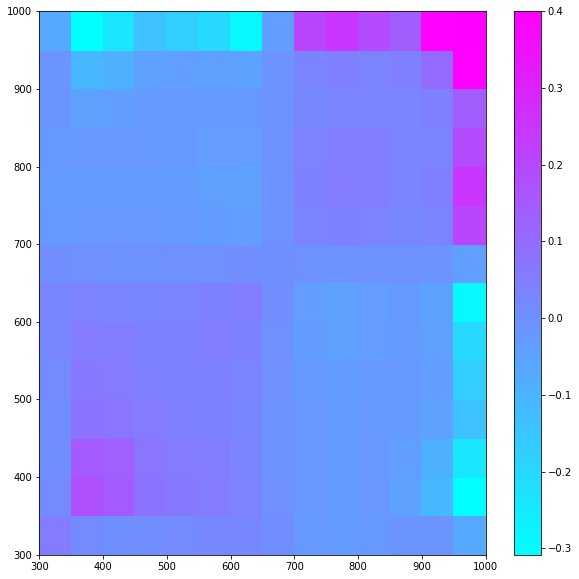

In [138]:
X, Y = np.meshgrid(binedges,binedges)

fig,ax = plt.subplots(figsize=(10,10))
crat = ax.pcolormesh(X, Y,cov,cmap='cool',vmax=.4)
cbar = fig.colorbar(crat)


In [59]:
list(df_sys)

['Proton_CosTheta_cv',
 'Lepton_CosTheta_cv',
 'Proton_CosTheta',
 'Lepton_CosTheta',
 'bkgBDT_run3_cv',
 'bkgBDT_run3',
 'run',
 'subrun',
 'event',
 'vtxid',
 'Xreco',
 'Yreco',
 'Zreco',
 'InFiducial',
 'AnyReco',
 'NTracks',
 'N5cmTracks',
 'PassSimpleCuts',
 'PassShowerReco',
 'PassSecondShower',
 'FailedBoost',
 'FailedBoost_1m1p',
 'FailedBoost_1e1p',
 'Good3DReco',
 'Eta',
 'OpenAng',
 'Thetas',
 'Phis',
 'QCorrectionFactorVertex',
 'ChargeNearTrunk',
 'LongTrackLen',
 'ShortTrackLen',
 'MaxShrFrac',
 'MinShrFrac',
 'CCQEEnergyShift_1m1p',
 'Enu_1m1p',
 'PhiT_1m1p',
 'AlphaT_1m1p',
 'PT_1m1p',
 'PTRat_1m1p',
 'BjX_1m1p',
 'BjY_1m1p',
 'Q2_1m1p',
 'Sph_1m1p',
 'PzEnu_1m1p',
 'Q0_1m1p',
 'Q3_1m1p',
 'OpenAngB_1m1p',
 'ThetasB_1m1p',
 'PhisB_1m1p',
 'PhiTB_1m1p',
 'AlphaTB_1m1p',
 'PTB_1m1p',
 'BjXB_1m1p',
 'BjYB_1m1p',
 'Q2B_1m1p',
 'SphB_1m1p',
 'CCQEEnergyShift_1e1p',
 'Enu_1e1p',
 'PhiT_1e1p',
 'AlphaT_1e1p',
 'PT_1e1p',
 'PTRat_1e1p',
 'BjX_1e1p',
 'BjY_1e1p',
 'Q2_1e1p',
 'S

wiremodX
polyfit degrees: 0 7.19169553120931
sg window_length 7 degrees: 10 7.116065343221028
wiremodYZ
polyfit degrees: 0 14.652654012044271
sg window_length 7 degrees: 10 14.726931889851889
wiremoddEdx
polyfit degrees: 0 8.301823933919271
sg window_length 1 degrees: 10 8.199064095815023
LYdown
polyfit degrees: 0 5.715118010838826
sg window_length 9 degrees: 10 5.694827159245809
SCE
polyfit degrees: 0 14.362505276997885
sg window_length 9 degrees: 10 14.273023923238119
wiremodThetaYZ
polyfit degrees: 0 6.244710286458333
sg window_length 11 degrees: 10 6.2069681485493975
wiremodThetaXZ
polyfit degrees: 0 10.961923917134603
sg window_length 3 degrees: 10 10.499676068623861
flat sys: 0.08959695735944827 0.008027614768070792


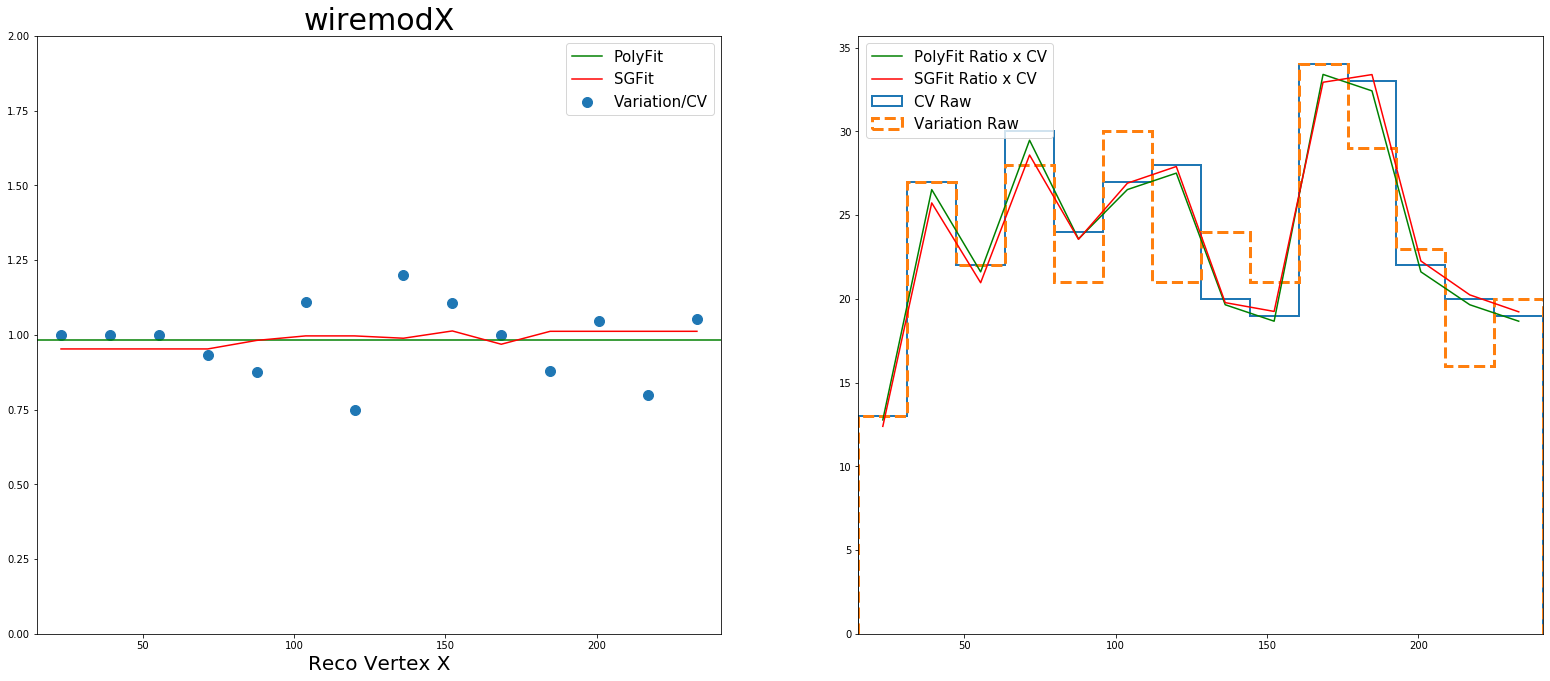

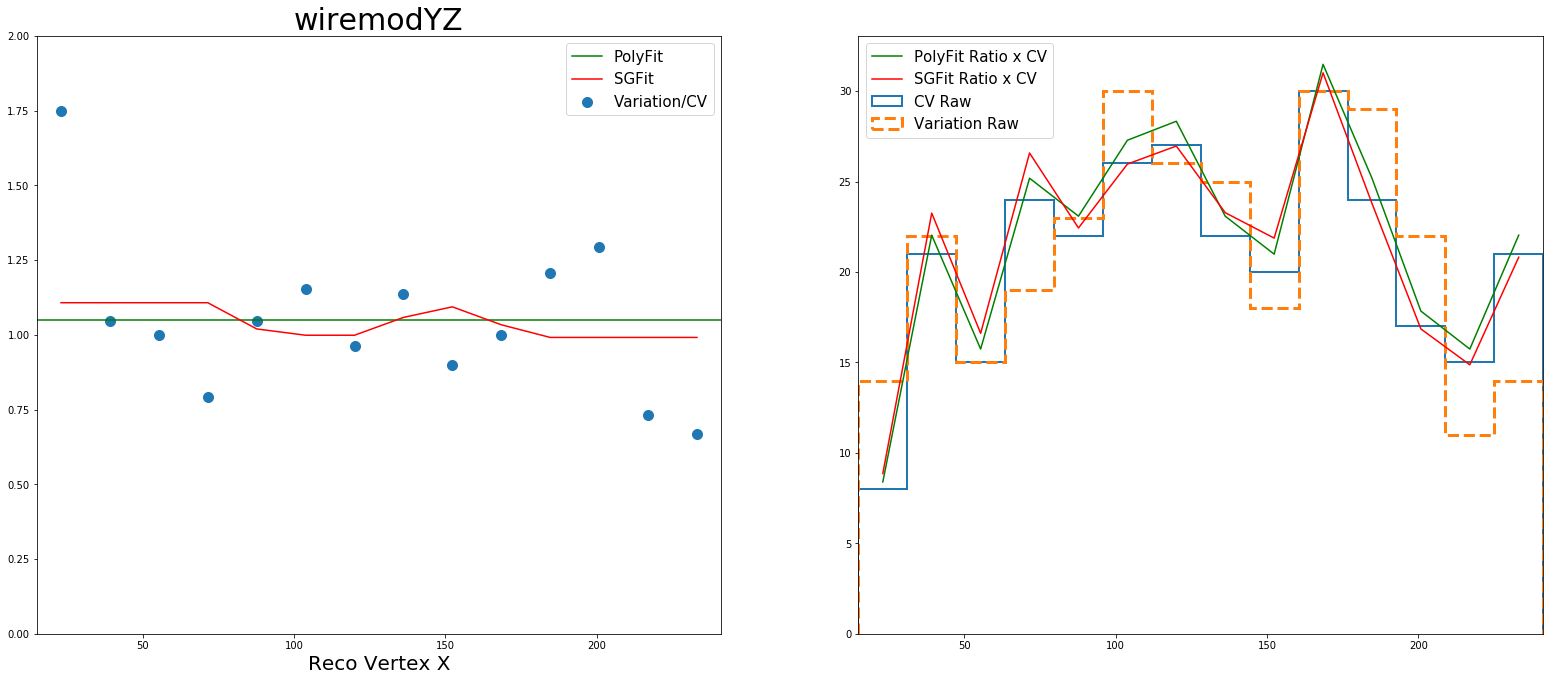

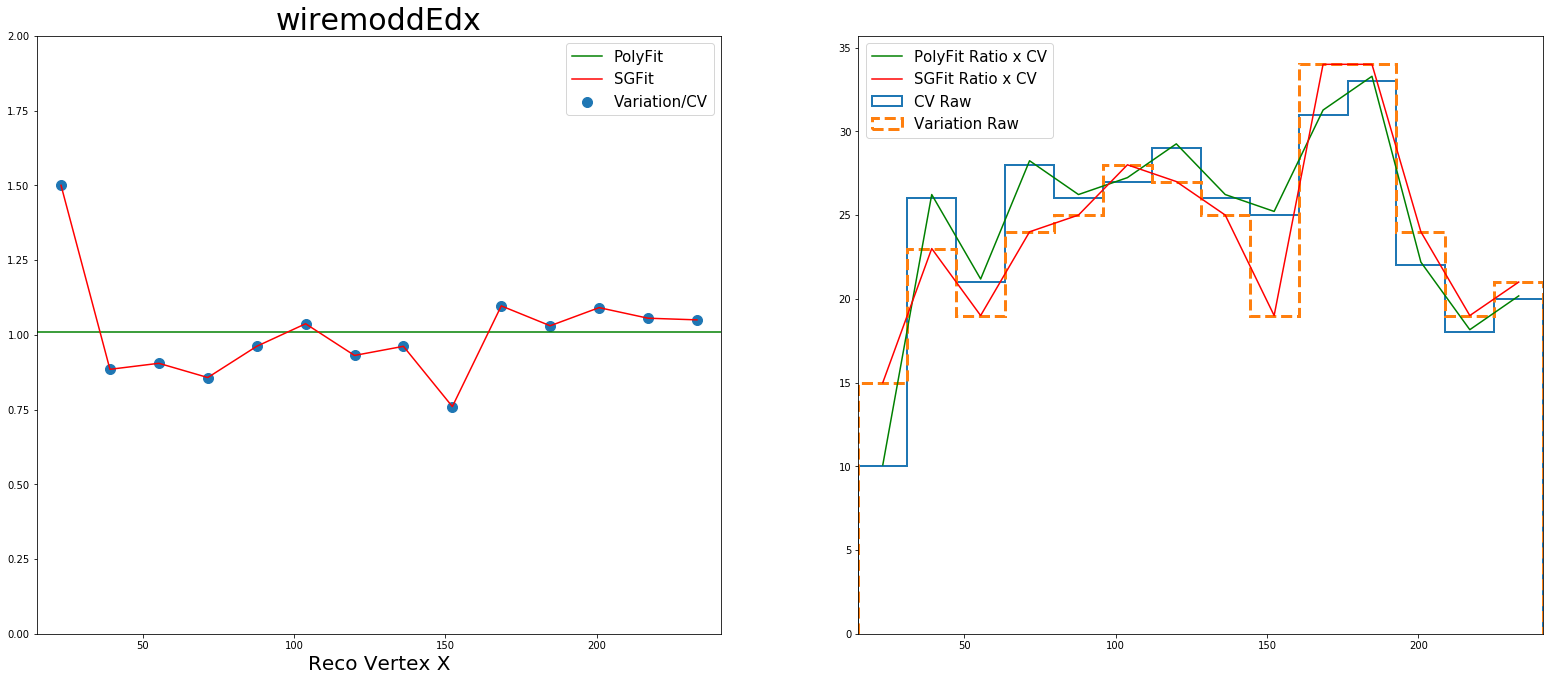

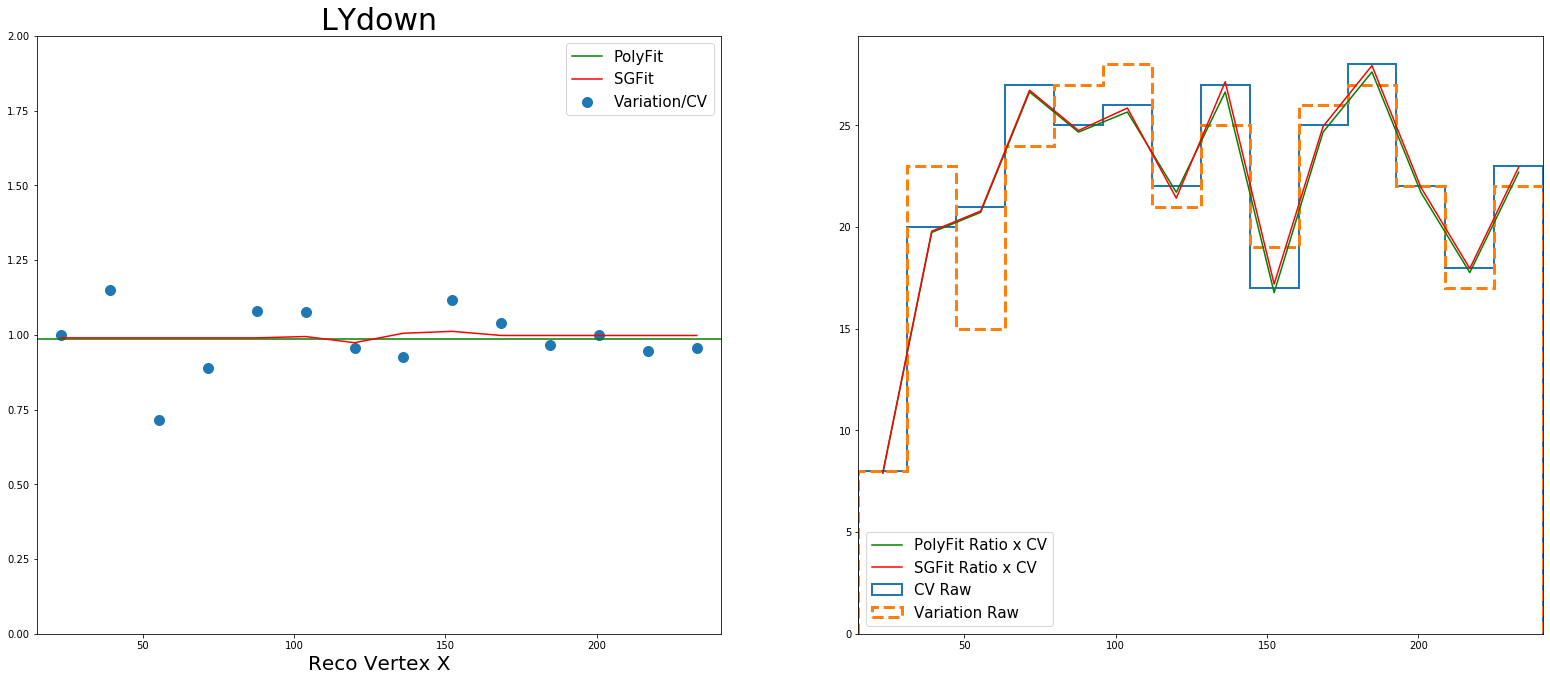

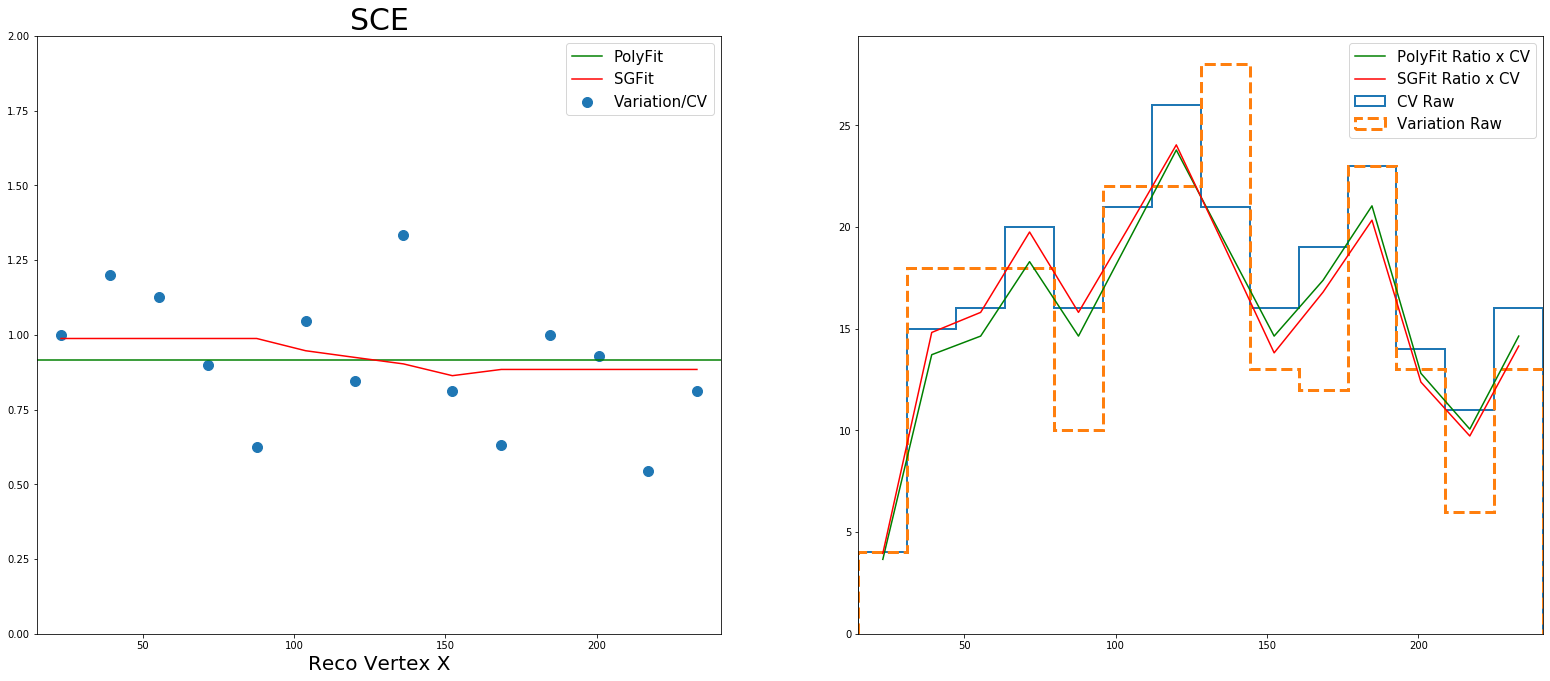

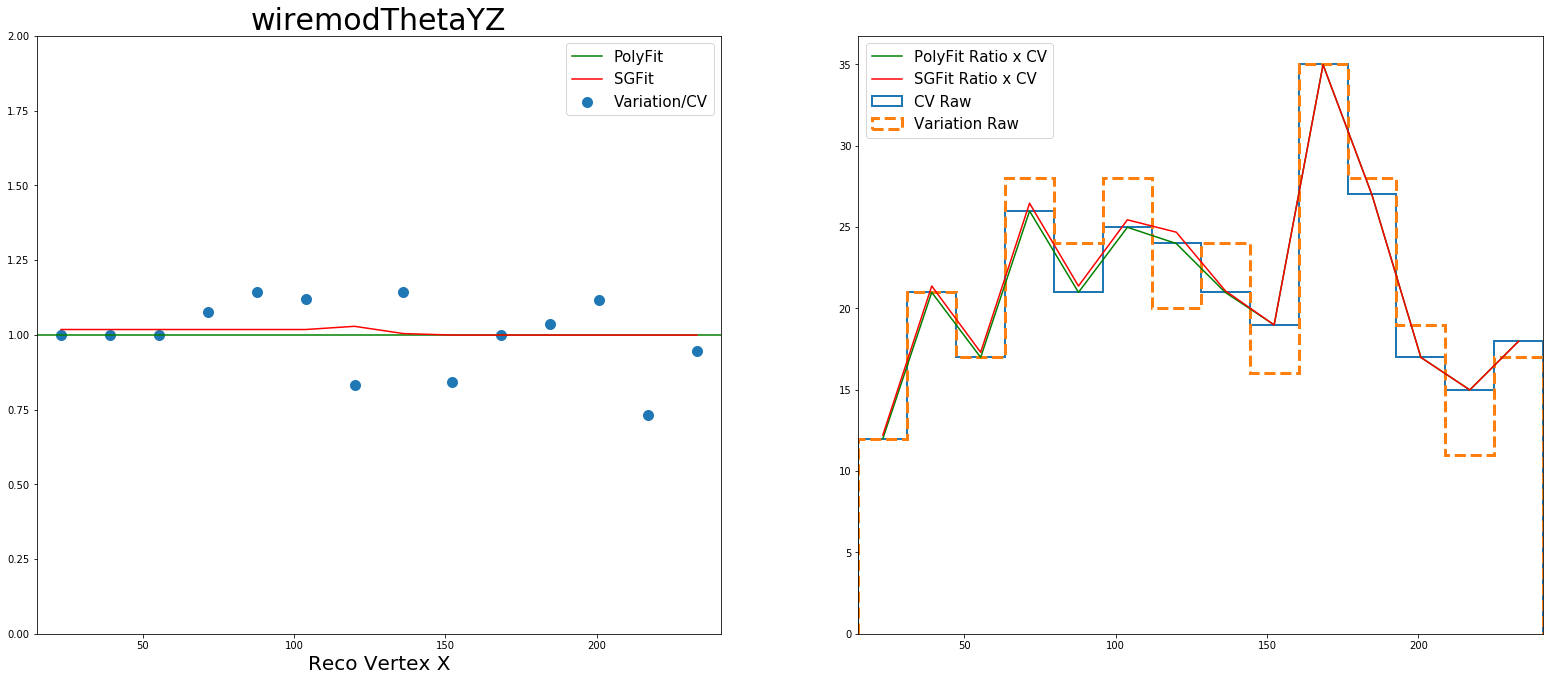

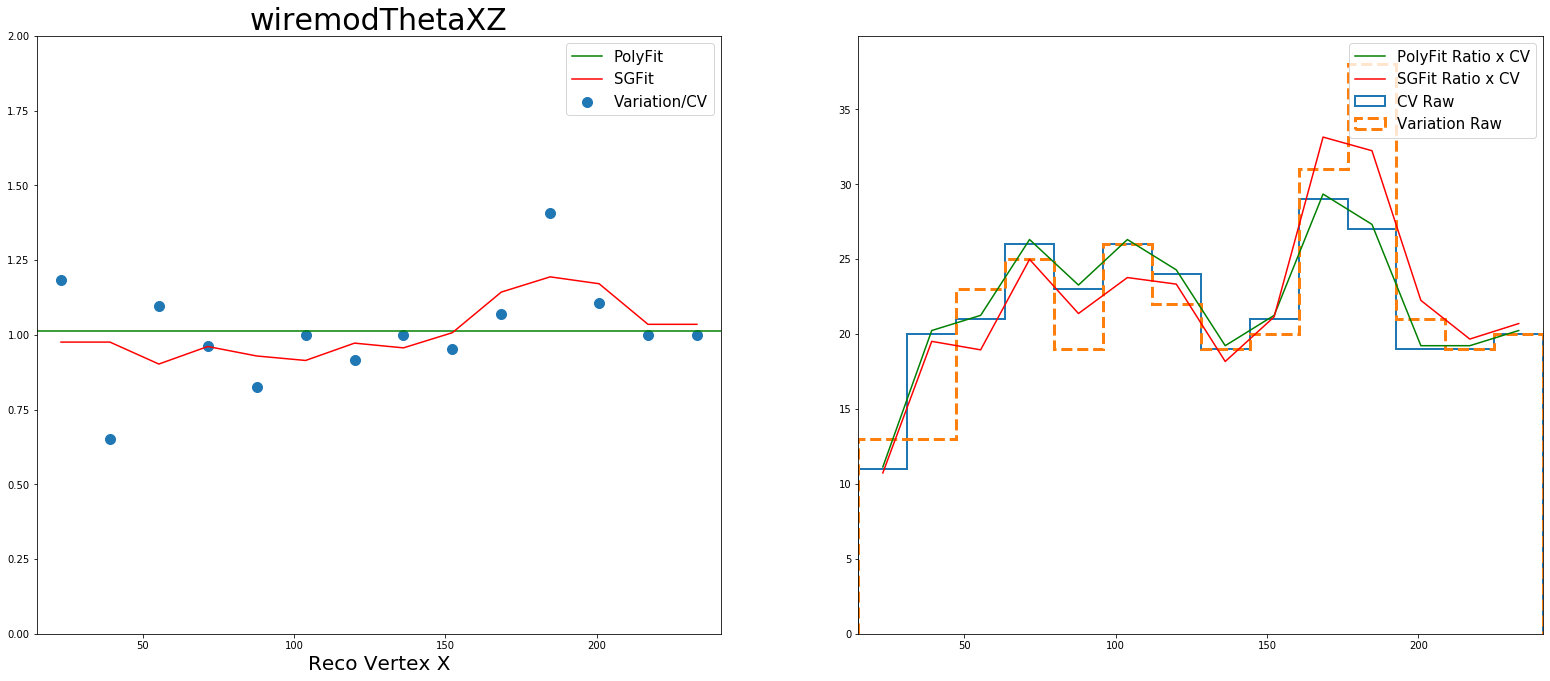

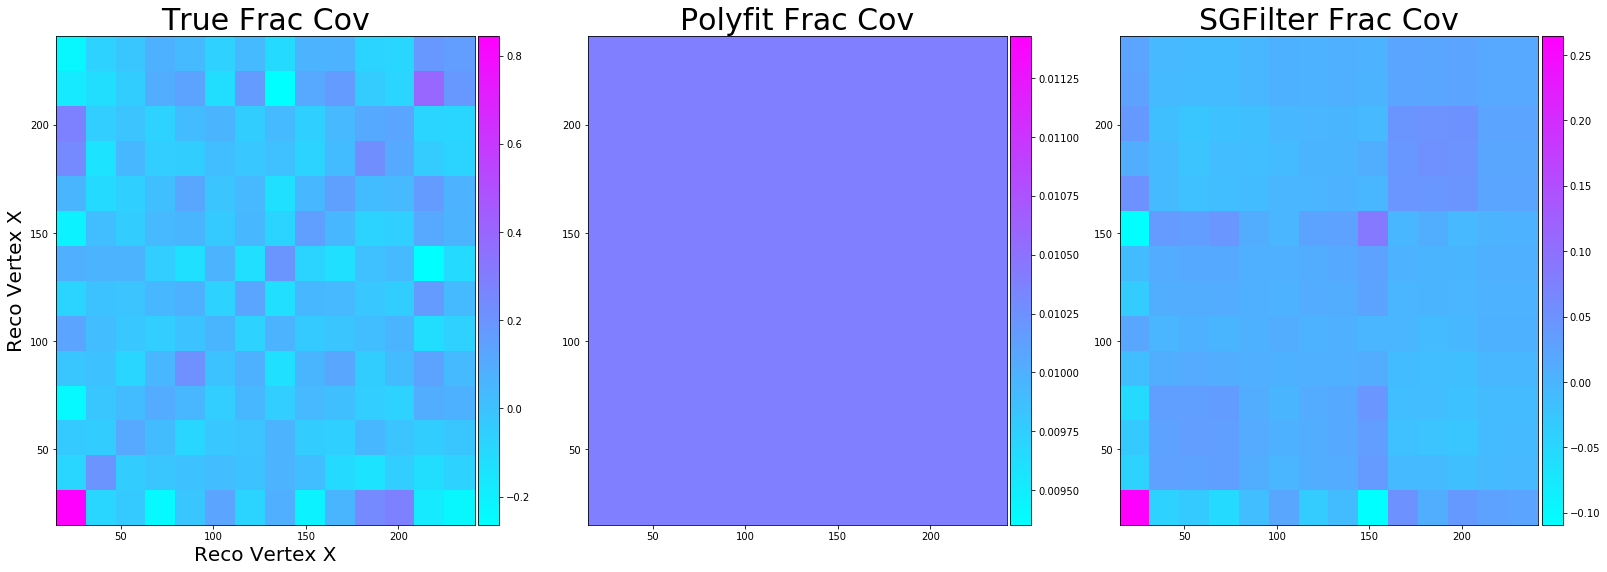

In [153]:
# The same thing with ratios

dvar = varListSel['Xreco']
nbins = 14
cov_tru = np.zeros((nbins,nbins))
cov_poly = np.zeros((nbins,nbins))
cov_sg = np.zeros((nbins,nbins))
flatsys = 0.0

for sysi in range(len(a_df_sys)):
    print(s_detsyslist[sysi])
    myvardf = a_overlap_sys[sysi].query(s_cuts)
    myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
    var_sys = myvardf[dvar.myname]
    var_cv = myvarcv[dvar.myname+'_cv']
          
    hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
    h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
    bincenters = np.diff(binedges)/2 + binedges[:-1]

    truRat = np.true_divide(h0,hCV,out=np.ones_like(bincenters),where=hCV!=0)
      
    # get polyfit degs
    aics = []
    degs = []
    for deg in range(min(nbins-2,int(nbins/2))):
        params = deg + 1
        polyRat = np.polyfit(bincenters, truRat, deg)
        fRat = np.poly1d(polyRat)
    
        # now calculate chi2 for fit
        yerr_rat = np.true_divide(np.sqrt(fRat(bincenters)*hCV),hCV,out=np.zeros_like(bincenters),where=hCV!=0)
        chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat),2).sum()
        aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
        aics.append(aic)
        degs.append(deg)
      
    polyterms = degs[np.argmin(aics)]
    print('polyfit degrees:',polyterms,aics[np.argmin(aics)])  
    polyRat = np.polyfit(bincenters, np.true_divide(h0,hCV,where=hCV!=0), polyterms)
    fRat = np.poly1d(polyRat) 
    h0_fit = fRat(bincenters)*hCV
    
    # get sg degs
    aics = []
    degs = []
    wls = []
    for window_length in range(1,nbins-1,2):
        for deg in range(window_length):   
            params = deg + 1
            sgRat = signal.savgol_filter(np.true_divide(h0,hCV,where=hCV!=0), window_length, deg)
            
            # now calculate chi2 for fit
            yerr_rat = np.true_divide(np.sqrt(sgRat*hCV),hCV,out=np.zeros_like(bincenters),where=hCV!=0)
             
            chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat,out=np.zeros_like(bincenters),where=yerr_rat!=0),2).sum()
            aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
            aics.append(aic)
            degs.append(deg)
            wls.append(window_length)
           
    #Savitsky Golay
    window_length = wls[np.argmin(aics)]
    little_poly_t = degs[np.argmin(aics)]
    print('sg window_length',window_length,'degrees:',deg,aics[np.argmin(aics)])
    sgRat = signal.savgol_filter(np.true_divide(h0,hCV,where=hCV!=0), window_length, little_poly_t)
    h0_sgfit = sgRat*hCV
        
    fig,ax = plt.subplots(figsize=(27,11))    
    gs = gridspec.GridSpec(1, 2)
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    
    dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
    ax0.scatter(bincenters,np.true_divide(h0,hCV,where=hCV!=0),label='Variation/CV',s=100)
    ax0.plot(dvarLinspace,fRat(dvarLinspace),label='PolyFit',color='green')
    ax0.plot(bincenters,sgRat,label='SGFit',color='red')
    
    ax0.set_title(s_detsyslist[sysi],fontsize=30)
    ax0.set_xlabel(dvar.mylabel,fontsize=20)
    ax0.legend(fontsize=15)
    
    ax1.hist(var_cv,nbins,range=dvar.myrange,histtype='step',linewidth=2,label='CV Raw')
    ax1.hist(var_sys,nbins,range=dvar.myrange,histtype='step',linewidth=3,linestyle='--',label='Variation Raw')
    ax1.plot(bincenters,h0_fit,label='PolyFit Ratio x CV',c='green')
    ax1.plot(bincenters,h0_sgfit,label='SGFit Ratio x CV',c='red')
    ax1.legend(fontsize=15)
    ax1.set_xlim(dvar.myrange)
    
    for i in range(nbins):
        for j in range(nbins):
            cov_tru[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
            cov_poly[i][j] += (h0_fit[i]-hCV[i])*(h0_fit[j]-hCV[j])/(hCV[i]*hCV[j])
            cov_sg[i][j] += (h0_sgfit[i]-hCV[i])*(h0_sgfit[j]-hCV[j])/(hCV[i]*hCV[j])
    flatsys += np.power(h0.sum()-hCV.sum(),2)/float(h0.sum()*hCV.sum())
    
    ax0.set_xlim(dvar.myrange)
    ax0.set_ylim(0,2)
    
fig,ax = plt.subplots(figsize=(27,9))
gs = gridspec.GridSpec(1, 3)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])

X, Y = np.meshgrid(binedges,binedges)

crat_tru = ax0.pcolormesh(X, Y,cov_tru,cmap='cool')#,vmin=-2,vmax=3)
crat_poly = ax1.pcolormesh(X, Y,cov_poly,cmap='cool')#,vmin=-2,vmax=3)
crat_sg = ax2.pcolormesh(X, Y,cov_sg,cmap='cool')#,vmin=-2,vmax=3)

divider0 = make_axes_locatable(ax0)
divider1 = make_axes_locatable(ax1)
divider2 = make_axes_locatable(ax2)

cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)

cbar = fig.colorbar(crat_tru,cax0)
cbar = fig.colorbar(crat_poly,cax1)
cbar = fig.colorbar(crat_sg,cax2)

ax0.set_title('True Frac Cov',fontsize=30)
ax1.set_title('Polyfit Frac Cov',fontsize=30)
ax2.set_title('SGFilter Frac Cov',fontsize=30)

ax0.set_ylabel(dvar.mylabel,fontsize=20)
ax0.set_xlabel(dvar.mylabel,fontsize=20)

print('flat sys:',np.sqrt(flatsys),flatsys)
np.savetxt('/home/dcianci/Downloads/detsys_%s_nom_cov.csv'%dvar.myname,cov_tru,delimiter=',')
np.savetxt('/home/dcianci/Downloads/detsys_%s_polyfit_cov.csv'%dvar.myname,cov_poly,delimiter=',')
np.savetxt('/home/dcianci/Downloads/detsys_%s_sg_cov.csv'%dvar.myname,cov_sg,delimiter=',')

cov_flat = np.zeros((nbins,nbins))
for i in range(nbins):
    cov_flat[i][i] = flatsys
np.savetxt('/home/dcianci/Downloads/detsys_%s_flat_cov.csv'%dvar.myname,cov_flat,delimiter=',')


## Let's find a good fit

testneg,testzero: [3.57341932 5.14984534 4.6486157  5.42841363 4.85532075 5.14984534
 5.2443458  4.43228117 4.3200533  5.77898761 5.69336824 4.6486157
 4.43228117 4.3200533 ] [13 27 22 30 24 27 28 20 19 34 33 22 20 19]
degree: 0 chi2: 4.858361287099476 AIC: 7.191694620432809
testneg,testzero: [3.58460323 5.16348664 4.65869297 5.43756843 4.86117103 5.1535693
 5.24561031 4.43121234 4.31692725 5.77201615 5.68375055 4.63851669
 4.42050956 4.30649029] [13 27 22 30 24 27 28 20 19 34 33 22 20 19]
degree: 1 chi2: 4.85521127016807 AIC: 9.94612036107716
testneg,testzero: [3.5606019  5.14488139 4.6538984  5.44316405 4.87367964 5.17214315
 5.2672318  4.44949474 4.33253077 5.7869404  5.6896391  4.63370125
 4.40441123 4.27729037] [13 27 22 30 24 27 28 20 19 34 33 22 20 19]
degree: 2 chi2: 4.8453018282503555 AIC: 13.245301828250357
testneg,testzero: [3.59961408 5.14921655 4.6303984  5.4024315  4.83840441 5.14579844
 5.25763767 4.45759211 4.35454975 5.82872384 5.7321843  4.6571843
 4.40065667 4.229296

/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(0, 2)

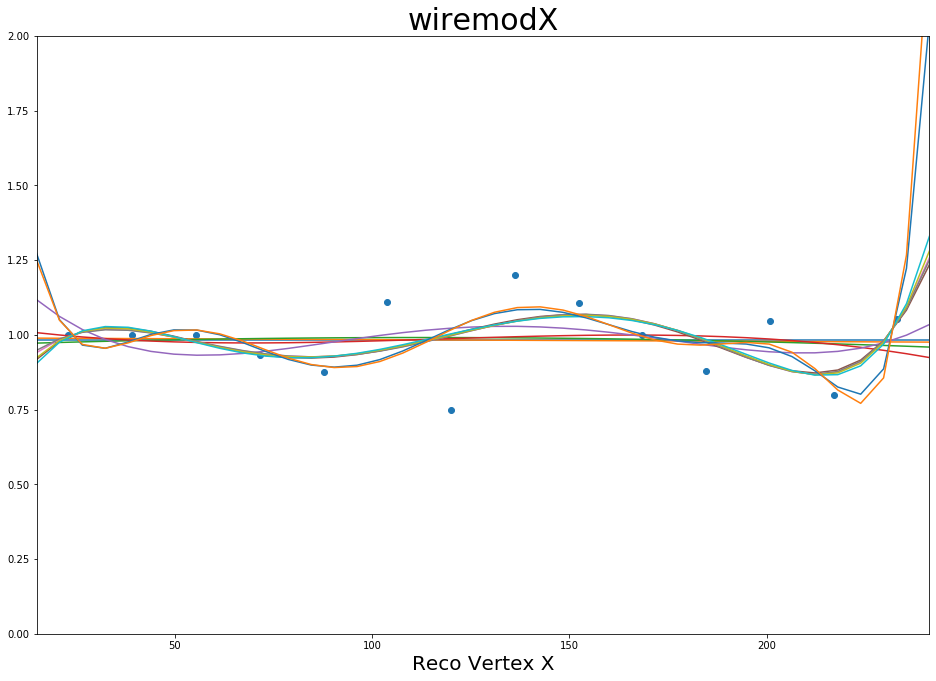

In [117]:
# The same thing with ratios

dvar = varListSel['Xreco']
nbins = 14
cov = np.zeros((nbins,nbins))
flatsys = 0.0

sysi = 0

myvardf = a_overlap_sys[sysi].query(s_cuts)
myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
var_sys = myvardf[dvar.myname]
var_cv = myvarcv[dvar.myname+'_cv']
          
hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
bincenters = np.diff(binedges)/2 + binedges[:-1]
truRat = np.true_divide(h0,hCV)

fig,ax = plt.subplots(figsize=(16,11))    
dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
plt.scatter(bincenters,np.true_divide(h0,hCV),label='Variation/CV')

# polyfit
aics = []
degs = []
for deg in range(nbins-2):
        
    params = deg + 1
    polyRat = np.polyfit(bincenters, truRat, deg)
    fRat = np.poly1d(polyRat)
    h0_fit = fRat(bincenters)*hCV
    
    # now calculate chi2 for fit
    print('testneg,testzero:',np.sqrt(h0_fit),hCV)
    yerr_rat = np.true_divide(np.sqrt(h0_fit),hCV)
    chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat),2).sum()
    aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
    print('degree:',deg,'chi2:',chi2_fit,'AIC:',aic)
    plt.plot(dvarLinspace,fRat(dvarLinspace),label='PolyFit (%i)'%polyterms)
    aics.append(aic)
    degs.append(deg)
    

print(degs[np.argmin(aics)])

ax.set_title(s_detsyslist[sysi],fontsize=30)
ax.set_xlabel(dvar.mylabel,fontsize=20)
#ax.legend(fontsize=15)
      
ax.set_xlim(dvar.myrange)
ax.set_ylim(0,2)


window_length 1 degree: 0 chi2: 9.263592560412054 AIC: 11.596925893745388
window_length 3 degree: 0 chi2: 8.873041047947478 AIC: 11.206374381280812
window_length 3 degree: 1 chi2: 8.625229458693235 AIC: 13.716138549602327
window_length 3 degree: 2 chi2: 9.26359256041205 AIC: 17.66359256041205
window_length 5 degree: 0 chi2: 8.878586485910798 AIC: 11.211919819244132
window_length 5 degree: 1 chi2: 8.618203262808063 AIC: 13.709112353717153
window_length 5 degree: 2 chi2: 8.762149528124052 AIC: 17.16214952812405
window_length 5 degree: 3 chi2: 8.827626905939193 AIC: 21.272071350383634
window_length 5 degree: 4 chi2: 9.26359256041205 AIC: 26.76359256041205
window_length 7 degree: 0 chi2: 8.958226898628284 AIC: 11.291560231961618
window_length 7 degree: 1 chi2: 8.568924482314452 AIC: 13.659833573223544
window_length 7 degree: 2 chi2: 8.704847251526996 AIC: 17.104847251526994
window_length 7 degree: 3 chi2: 8.82672819886712 AIC: 21.271172643311566
window_length 7 degree: 4 chi2: 8.8252614464

(0, 2)

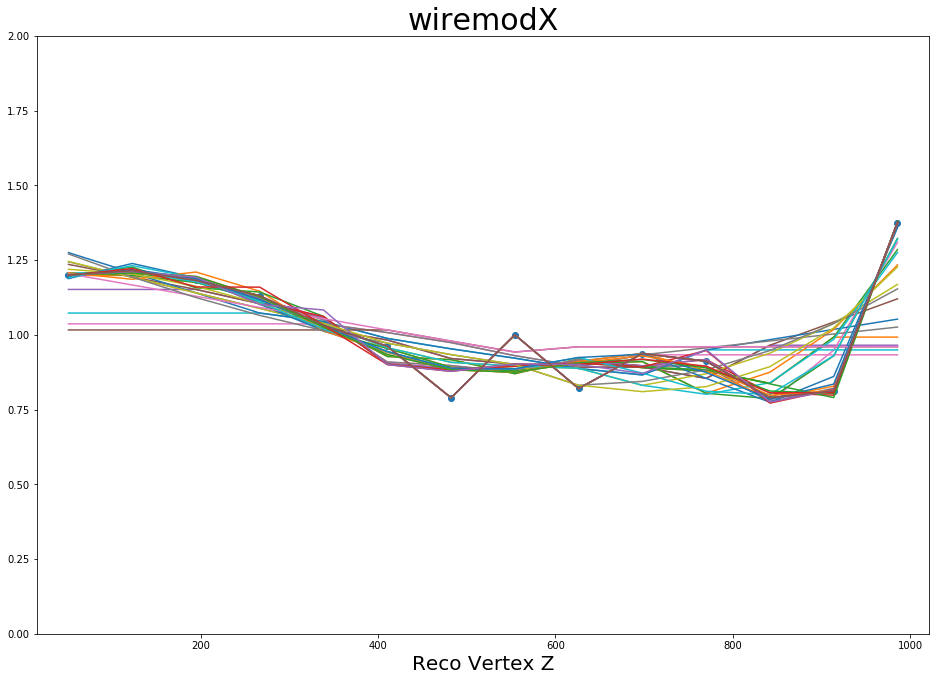

In [77]:
# The same thing with ratios

dvar = varListSel['Zreco']
nbins = 14
cov = np.zeros((nbins,nbins))
flatsys = 0.0

sysi = 0

myvardf = a_overlap_sys[sysi].query(s_cuts)
myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
var_sys = myvardf[dvar.myname]
var_cv = myvarcv[dvar.myname+'_cv']
          
hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
bincenters = np.diff(binedges)/2 + binedges[:-1]
truRat = np.true_divide(h0,hCV)

fig,ax = plt.subplots(figsize=(16,11))    
dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
plt.scatter(bincenters,np.true_divide(h0,hCV),label='Variation/CV')

# polyfit
for window_length in range(1,nbins-1,2):
    for deg in range(window_length):
        
        params = deg + 1
        sgRat = signal.savgol_filter(np.true_divide(h0,hCV), window_length, deg)
        h0_fit = sgRat*hCV
     
         # now calculate chi2 for fit
        yerr_rat = np.true_divide(np.sqrt(h0_fit),hCV)
        chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat),2).sum()
        aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
        print('window_length',window_length,'degree:',deg,'chi2:',chi2_fit,'AIC:',aic)
        plt.plot(bincenters,sgRat,label='Sigfit (%i)'%polyterms)
    
ax.set_title(s_detsyslist[sysi],fontsize=30)
ax.set_xlabel(dvar.mylabel,fontsize=20)
#ax.legend(fontsize=15)
      
ax.set_xlim(dvar.myrange)
ax.set_ylim(0,2)

In [ ]:


if not os.path.exists(dumphole):
    os.makedirs(dumphole)

for dist in varlistSel:
    
    fig,ax = plt.subplots(figsize=(16,11))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, .75])
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    hSys =  []
    
    for i in range(len(s_detsyslist)):
        var_sys = a_df_sys[i].query(s_cuts)[dist.myname]
        sys_scale = np.ones(len(var_sys))*totalscale/f_scaleslist[i]
        h0,_ = np.histogram(var_sys,range=dist.myrange,bins=dumpbins,weights=sys_scale)
        h1,_,_ = ax0.hist(var_sys,range=dist.myrange,bins=dumpbins,histtype='step',label=s_detsyslist[i]+' (%i)'%h0.sum(),linewidth=2,weights=sys_scale)
        hSys.append(h1)
    
    var_cv = df_cv.query(s_cuts)[dist.myname]
    cv_scale = np.ones(len(var_cv))*totalscale/scaleCV
    h0,_ = np.histogram(var_cv,range=dist.myrange,bins=dumpbins,weights=cv_scale)
    hCV,binedges,_ = ax0.hist(var_cv,range=dist.myrange,bins=dumpbins,histtype='step',label='CV (%i)'%h0.sum(),linewidth=3,color='black',linestyle='--',weights=cv_scale)       
    
    ax0.set_ylabel('Events in 5e19 POT',fontsize=20)
    ax0.set_xlabel(dist.mylabel,fontsize=25)
    ax0.set_title('BNB Overlay w/ Detsys',fontsize=15)
    ax0.set_xlim(dist.myrange)
    ax1.set_xlim(dist.myrange)
    ax1.set_ylim(0,2.5)
    ax0.legend(fontsize=15)
    
    for i in range(len(hSys)):
        ydots = np.true_divide(hSys[i],hCV,where=hCV!=0)
        xdots = binedges[:-1] + (binedges[1]-binedges[0])/float(len(hSys)) * i
        ax1.scatter(xdots,ydots)
    
    ax1.axhline(1,linestyle=':',color='maroon')
    
    for j in range(len(hCV)):
        ax1.axvline(binedges[j+1],linestyle=':',color='gray') 
    
    plt.savefig(dumphole+'/'+dist.myname+'.png')
    plt.close(fig)

## Smearing

In [51]:
dumphole = 'DetSysSmear'
dumpfolder = '../PlotDumps'

dumphole = '%s/%s'%(dumpfolder,dumphole)
if not os.path.exists(dumphole):
    os.makedirs(dumphole)
if not os.path.exists(dumphole):
    os.makedirs(dumphole)

for dist in varlistSel:

    fig,ax = plt.subplots(figsize=(16,11))
    binwidth = (dvar.myrange[1]-dvar.myrange[0])/float(14)
    myrange = (-3*binwidth,3*binwidth)
    nbins = 15

    for sysi in range(len(a_df_sys)):
        myvardf = a_overlap_sys[sysi].query(s_cuts)
        myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
        var_sys = myvardf[dvar.myname]
        var_cv = myvarcv[dvar.myname+'_cv']
        
        h0,binedges,_ = plt.hist((var_cv-var_sys),bins=nbins,range=myrange,histtype='step',label=s_detsyslist[sysi],linewidth=3) 
    
    ax.axvline(binwidth,label='+1 Binwidth',linestyle=':')
    ax.axvline(-binwidth,label='-1 Binwidth',linestyle=':')
    ax.set_title('(CV - Detsys)',fontsize=30)
    ax.set_xlabel(r'$\Delta$'+dvar.mylabel,fontsize=20)
    ax.legend(fontsize=25)
    plt.savefig(dumphole+'/'+dvar.myname+'.png')
    plt.close(fig)
    

NameError: name 'varlistSel' is not defined

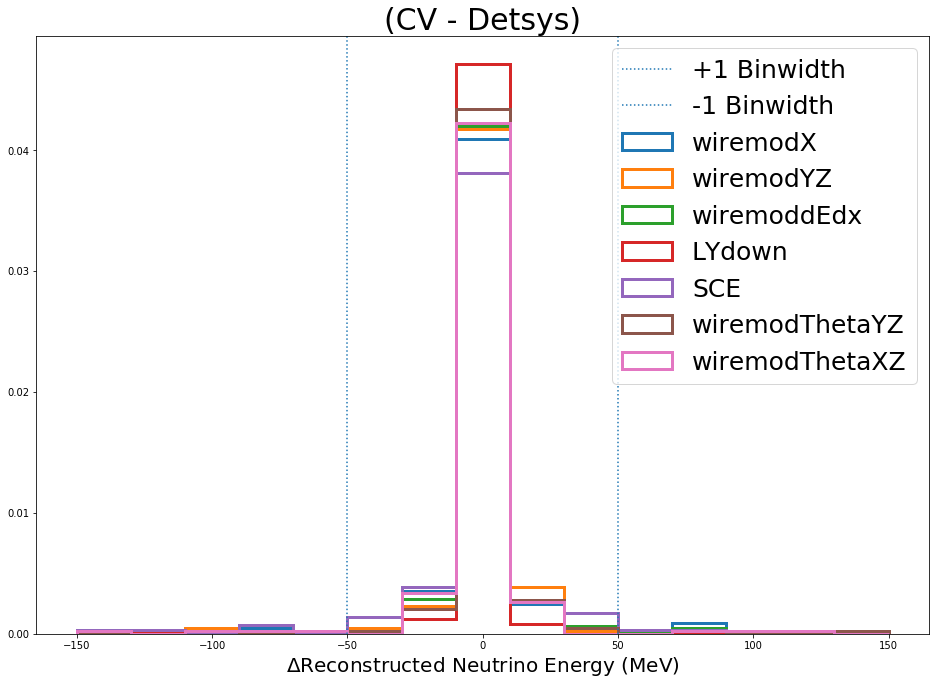

In [150]:
dvar = varListSel['Enu_1m1p']

fig,ax = plt.subplots(figsize=(16,11))
binwidth = (dvar.myrange[1]-dvar.myrange[0])/float(14)
myrange = (-3*binwidth,3*binwidth)
nbins = 15

for sysi in range(len(a_df_sys)):
    myvardf = a_overlap_sys[sysi].query(s_cuts)
    myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
    var_sys = myvardf[dvar.myname]
    var_cv = myvarcv[dvar.myname+'_cv']
        
    h0,binedges,_ = plt.hist((var_cv-var_sys),bins=nbins,range=myrange,histtype='step',label=s_detsyslist[sysi],linewidth=3,density=1) 
    
ax.axvline(binwidth,label='+1 Binwidth',linestyle=':')
ax.axvline(-binwidth,label='-1 Binwidth',linestyle=':')
ax.set_title('(CV - Detsys)',fontsize=30)
ax.set_xlabel(r'$\Delta$'+dvar.mylabel,fontsize=20)
ax.legend(fontsize=25)

## Extras

In [83]:
dumpbins = 18
dumphole = '/home/dcianci/Downloads/detsys_may18_presel' # where are we dumping these?

if not os.path.exists(dumphole):
    os.makedirs(dumphole)

for dist in varlistSel:
    
    fig,ax = plt.subplots(figsize=(16,11))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, .75])
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    hSys =  []
    
    for i in range(len(s_detsyslist)):
        var_sys = a_df_sys[i][dist.myname]
        sys_scale = np.ones(len(var_sys))*totalscale/f_scaleslist[i]
        h0,_ = np.histogram(var_sys,range=dist.myrange,bins=dumpbins,weights=sys_scale)
        h1,_,_ = ax0.hist(var_sys,range=dist.myrange,bins=dumpbins,histtype='step',label=s_detsyslist[i]+' (%.4f)'%h0.sum(),linewidth=2,weights=sys_scale)
        hSys.append(h1)
    
    var_cv = df_cv[dist.myname]
    cv_scale = np.ones(len(var_cv))*totalscale/scaleCV
    h0,_ = np.histogram(var_cv,range=dist.myrange,bins=dumpbins,weights=cv_scale)
    hCV,binedges,_ = ax0.hist(var_cv,range=dist.myrange,bins=dumpbins,histtype='step',label='CV (%.4f)'%h0.sum(),linewidth=3,color='black',linestyle='--',weights=cv_scale)
    
    ax0.set_ylabel('Events in 5e19 POT',fontsize=20)
    ax0.set_xlabel(dist.mylabel,fontsize=25)
    ax0.set_title('BNB Overlay w/ Detsys',fontsize=15)
    ax0.set_xlim(dist.myrange)
    ax1.set_xlim(dist.myrange)
    ax0.legend(fontsize=15)
    ax1.set_ylim(0,2.5)
    
    for i in range(len(hSys)):
        ydots = np.true_divide(hSys[i],hCV,where=hCV!=0)
        xdots = binedges[:-1] + (binedges[1]-binedges[0])/float(len(hSys)) * i
        ax1.scatter(xdots,ydots)
    
    ax1.axhline(1,linestyle=':',color='maroon')
    
    for j in range(len(hCV)):
        ax1.axvline(binedges[j+1],linestyle=':',color='gray') 
    
    plt.savefig(dumphole+'/'+dist.myname+'.png')
    plt.close(fig)

/home/dcianci/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dcianci/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
